In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [225]:
# Импорт первого набора данных
df = pd.read_excel(r'CVI_DATA.xlsx')
code = np.unique(df['CODE'].to_numpy())

print(code)
for CODE in code:
    treadmill = pd.read_csv(
        f"CVD_{CODE}_1_KD_BB_CALLIBRATION.csv",
        
        delimiter=";",
        skiprows=[0,1,3],
        header = 0,
        usecols=[1, 3, 5, 7],
        decimal=",",
        thousands=".",
        encoding="UTF-8"
    )
    
    treadmill = treadmill[['0', '1', '2', '3']]
    
    data = pd.read_csv(
    f"CVD_{CODE}_1_KD_30_BB.csv",
    delimiter=";",
    skiprows=[0,1,3],
    header = 0,
    usecols=[1, 3, 5, 7],
    decimal=",",
    thousands=".",
    encoding="UTF-8"
    )

    data = data[['0', '1', '2', '3']]
    
    step_time_data = pd.read_csv(
    f"CVD_{CODE}_1_KD_30_BB.csv",
    delimiter=";",
    skiprows=[0,1,3],
    header = 0,
    usecols=[9,10,11],
    decimal=",",
    thousands=".",
    encoding="UTF-8"
    )
        # Настройки отображения графиков (опционально)
    plt.rcParams['figure.figsize'] = [10, 6]
    
    #calibration
    Pressure = treadmill.values
    #measure
    Pressure_data = data.values
    #time
    TIME_60 = step_time_data.values
    
    
    # Построение сырых графиков
    plt.figure()
    for i in range(4):
        plt.subplot(4, 1, i+1)
        plt.plot(Pressure[:, i])
        plt.title(f"V{i+1}")
    plt.tight_layout()
    plt.show()
    
    # Калибровочные расчеты
    P = np.array([0, 50, 100, 150, 200, 250])

# Поиск интервалов и их отображение
def median_filter_pandas(signal_data, window_size):
    """
    Медианный фильтр
    """
    if window_size % 2 == 0:
        window_size += 1  # делаем нечетным
    
    series = pd.Series(signal_data)
    return series.rolling(window=window_size, center=True, min_periods=1).median().values
    
    for k in range(4):
        Pressure_new = median_filter_pandas(Pressure[:, k],201)
        stable_intervals = find_stable_intervals(Pressure_new, threshold=0.012, min_length=50000)
        plt.figure(figsize=(12, 6))
        plt.plot(Pressure[:, k], label="Измерения")
        plt.plot(Pressure_new, label="После фильтра")
        for i, (start, end) in enumerate(stable_intervals):
            plt.axvspan(start, end, alpha=0.3, color='green', label="Стабильный" if i == 0 else "")
            mean_val = np.mean(Pressure_new[start:end+1])
            plt.hlines(mean_val, start, end, colors='red', linestyles='dashed')
        plt.xlabel("Время (отсчёты)")
        plt.ylabel("Напряжение (V)")
        plt.legend()
        plt.title("Стабильные интервалы в данных")
        plt.show()
        
        # Вывод результатов
        print("Найдены стабильные интервалы:")
        for start, end in stable_intervals:
            print(f"Интервал [{start}, {end}]: среднее = {np.mean(Pressure_new[start:end+1]):.3f} V")
        
        V = [np.mean(Pressure_new[start:end+1]) for start, end in stable_intervals]  
        a = np.polyfit(V, P, 1)
        if k==0:
            IV = Pressure_data[:,k]*a[0] + a[1]
        if k==1:
            GSV1 = Pressure_data[:,k]*a[0] + a[1]
        if k==2:
            GSV2 = Pressure_data[:,k]*a[0] + a[1]
        if k==3:
            GSV3 = Pressure_data[:,k]*a[0] + a[1]
        
    
        
        # Построение калибровочных графиков
        plt.figure()
        plt.plot(V, np.polyval(a, V), label=f"{a[0]} * V{k} + {a[1]}")
        plt.xlabel("V")
        plt.ylabel("a * V + b")
        plt.legend()
        plt.title(f"Calibration V{k}")
        plt.show()
    
    data_array = [IV, GSV1,GSV2, GSV3]



    
    
    
    

[ 1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59]


0         1         2         3
0       1.208601  1.220602  1.186944  1.210860
1       1.213692  1.218056  1.186944  1.203223
2       1.218783  1.218056  1.189490  1.213406
3       1.211146  1.220602  1.181853  1.218498
4       1.206055  1.223148  1.179307  1.213406
...          ...       ...       ...       ...
618909  1.246784  1.253700  1.225132  1.243957
618910  1.246784  1.253700  1.217495  1.249049
618911  1.254421  1.253700  1.209857  1.238865
618912  1.246784  1.253700  1.217495  1.243957
618913  1.246784  1.248608  1.217495  1.249049

[618914 rows x 4 columns]

In [3]:
data = pd.read_csv(
    "CVD_47_1_KD_30_BB.csv",
    delimiter=";",
    skiprows=[0,1,3],
    header = 0,
    usecols=[1, 3, 5, 7],
    decimal=",",
    thousands=".",
    encoding="UTF-8"
)

data = data[['0', '1', '2', '3']]
data

0         1         2         3
0       1.468247  1.528669  1.433892  1.394166
1       1.460610  1.518485  1.428801  1.401804
2       1.460610  1.528669  1.421163  1.394166
3       1.468247  1.533761  1.426255  1.396712
4       1.463156  1.528669  1.433892  1.399258
...          ...       ...       ...       ...
606929  1.384244  1.437013  1.332058  1.366161
606930  1.391880  1.429375  1.339696  1.373799
606931  1.386789  1.424283  1.329512  1.378890
606932  1.381698  1.429375  1.329512  1.373799
606933  1.386789  1.429375  1.334604  1.366161

[606934 rows x 4 columns]

In [4]:
step_time_data = pd.read_csv(
    f"CVD_{CODE}_1_KD_30_BB.csv",
    delimiter=";",
    skiprows=[0,1,3],
    header = 0,
    usecols=[9,10,11],
    decimal=",",
    thousands=".",
    encoding="UTF-8"
)

step_time_data

HEEL  Channel name.5      TOES
0       0.657935         0.00000  0.740497
1       0.660481         0.00025  0.743042
2       0.668119         0.00050  0.748133
3       0.663027         0.00075  0.743042
4       0.657935         0.00100  0.740497
...          ...             ...       ...
606929  1.607572       151.73225  0.582673
606930  1.635578       151.73250  0.569945
606931  1.620302       151.73275  0.569945
606932  1.625394       151.73300  0.580128
606933  1.602481       151.73325  0.575036

[606934 rows x 3 columns]

In [5]:
def find_stable_intervals(data, threshold, min_length):
    """
    Находит интервалы, где данные стабильны (колебания меньше порога).

    Параметры:
    - data: список или numpy.array с данными.
    - threshold: максимальное допустимое изменение между соседними точками.
    - min_length: минимальная длина интервала для признания стабильности.

    Возвращает:
    - Список кортежей (start, end) для каждого стабильного интервала.
    """
    length = len(data)
    if length == 0:
        return []
    intervals = []
    
    i = 0
    y = 0
    k = 0
    end = 0
    start = 0
    while i <= length-4:
        while (i+y+4<length) and (abs(data[i+y+1] - data[i]) <= threshold) and (abs(data[i+y+2] - data[i+y+1]) <= threshold) and (abs(data[i+y+3] - data[i+y+2]) <= threshold) and (abs(data[i+y+4] - data[i+y+3]) <= threshold):
            end = i+y+4
            start = i
            y+=1
        if i + y < length:
            i =i+y+4
        else:
            i+=1
        y=0
        
        if end - start + 1 >=min_length:
            intervals.append((start, end))

    
    return intervals

In [6]:
def find_start_index(data, window):
    """
    Находит интервалы, где данные стабильны (колебания меньше порога).

    Параметры:
    - data: список или numpy.array с данными.
    - threshold: максимальное допустимое изменение между соседними точками.
    - min_length: минимальная длина интервала для признания стабильности.

    Возвращает:
    - Список кортежей (start, end) для каждого стабильного интервала.
    """
    # porog = mean(data[0:window])
    start = 0
    i = 1
    A = 0
    max_peak = 0
    while (max_peak>=A):
        max_peak = max(data[0:i])
        i +=1
        A = max_peak
    start = i
    # while (max_peak < A) and (i+window<=len(data)):
    #     max_peak = max(data[i:i+window])
    #     i +=1
    #     start = i
    #     A = max_peak
    # print(A)
                       
    # length = len(data)
    # if length == 0:
    #     return 0
     
    
    # i = 0
    # y = 0
    # k = 0
    # start = 0
    
    # while (i+3<length) and (abs(data[i+3] - data[i]) <= threshold):
    #     start = i
    #     i+=1
            
    return start

In [7]:
t = []
for elem in stable_intervals:
    frac = int((elem[1] - elem[0]) / 5)
    t.append( (elem[0] + frac, elem[1] - frac) )

stable_intervals = t
stable_intervals

NameError: name 'stable_intervals' is not defined

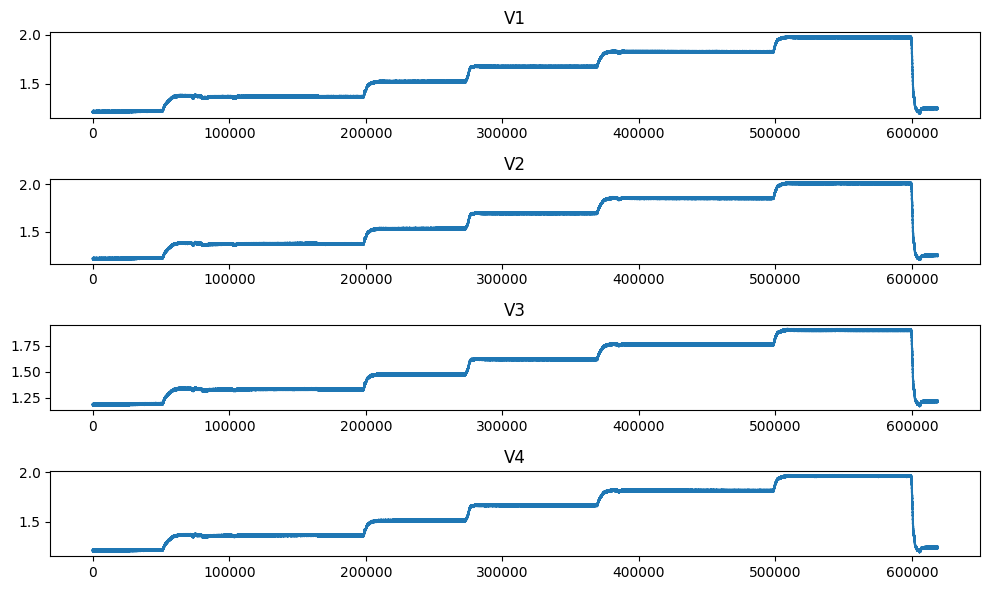

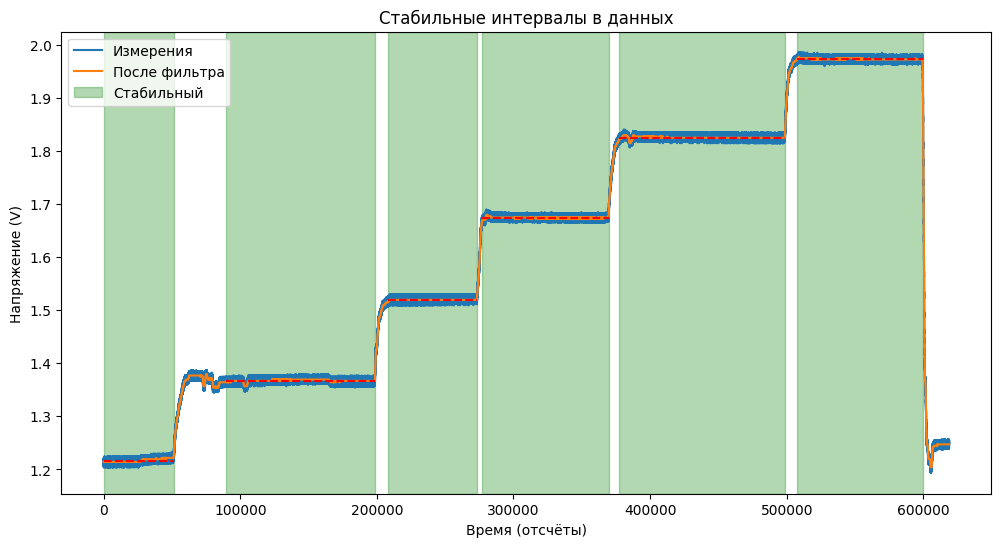

Найдены стабильные интервалы:
Интервал [0, 51304]: среднее = 1.216 V
Интервал [89814, 198631]: среднее = 1.367 V
Интервал [207898, 273414]: среднее = 1.519 V
Интервал [276934, 369649]: среднее = 1.674 V
Интервал [377079, 498805]: среднее = 1.825 V
Интервал [507721, 599542]: среднее = 1.973 V


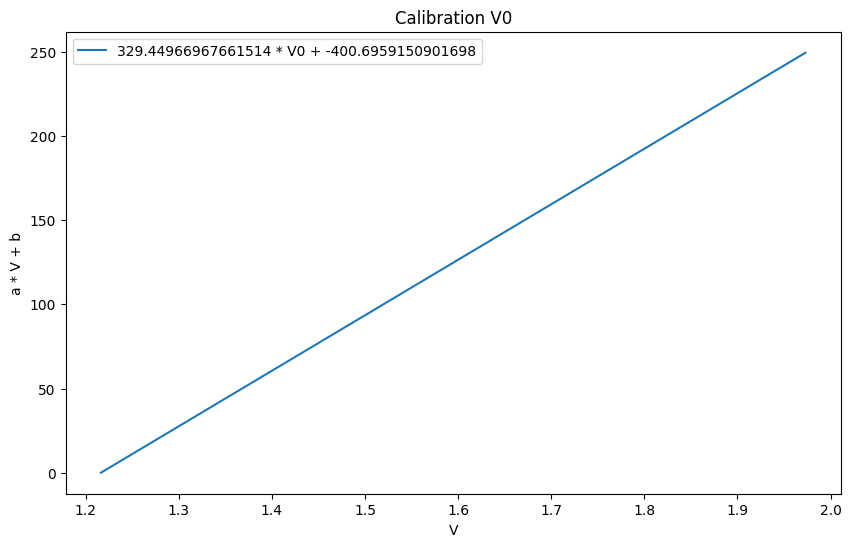

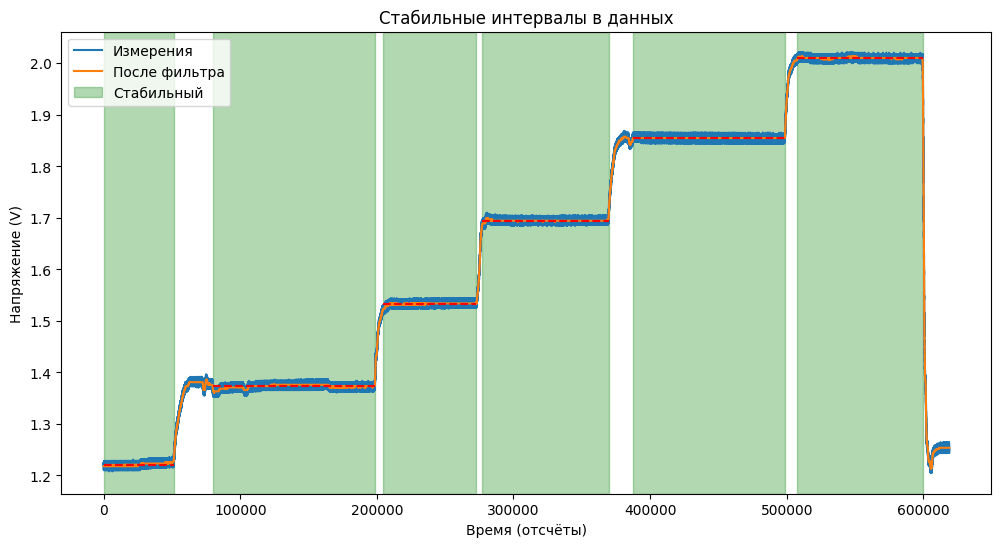

Найдены стабильные интервалы:
Интервал [0, 51283]: среднее = 1.221 V
Интервал [79749, 198617]: среднее = 1.373 V
Интервал [204601, 272649]: среднее = 1.533 V
Интервал [277209, 369615]: среднее = 1.694 V
Интервал [387298, 498864]: среднее = 1.855 V
Интервал [507305, 599577]: среднее = 2.010 V


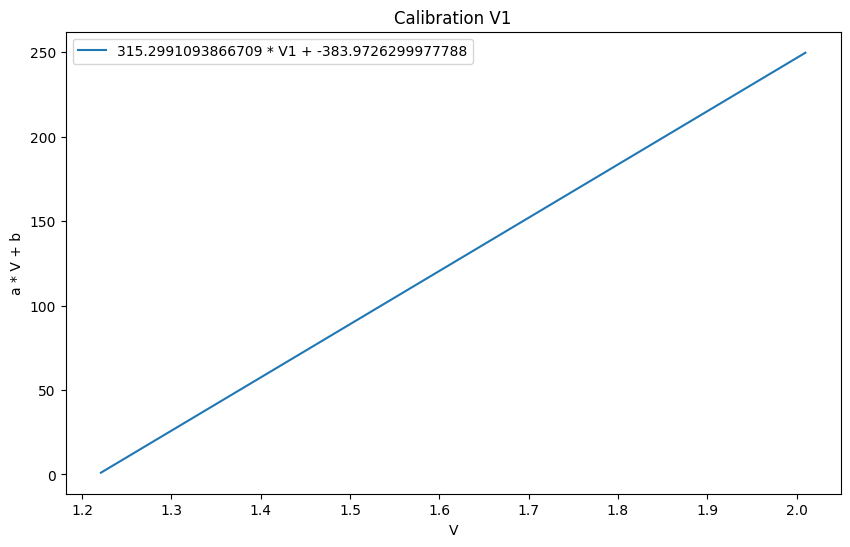

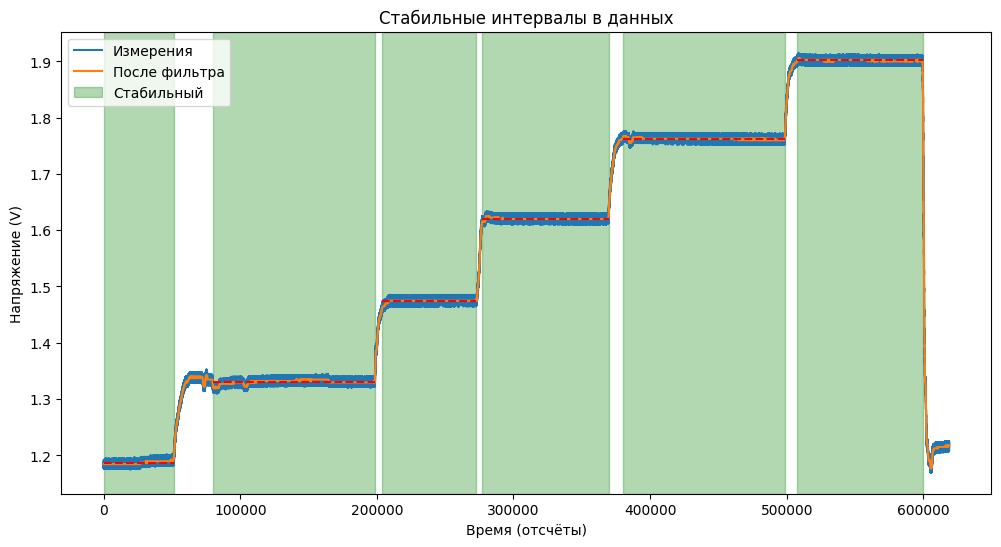

Найдены стабильные интервалы:
Интервал [0, 51315]: среднее = 1.187 V
Интервал [79842, 198565]: среднее = 1.330 V
Интервал [204039, 272761]: среднее = 1.474 V
Интервал [277006, 369639]: среднее = 1.620 V
Интервал [380301, 498931]: среднее = 1.762 V
Интервал [507779, 599592]: среднее = 1.902 V


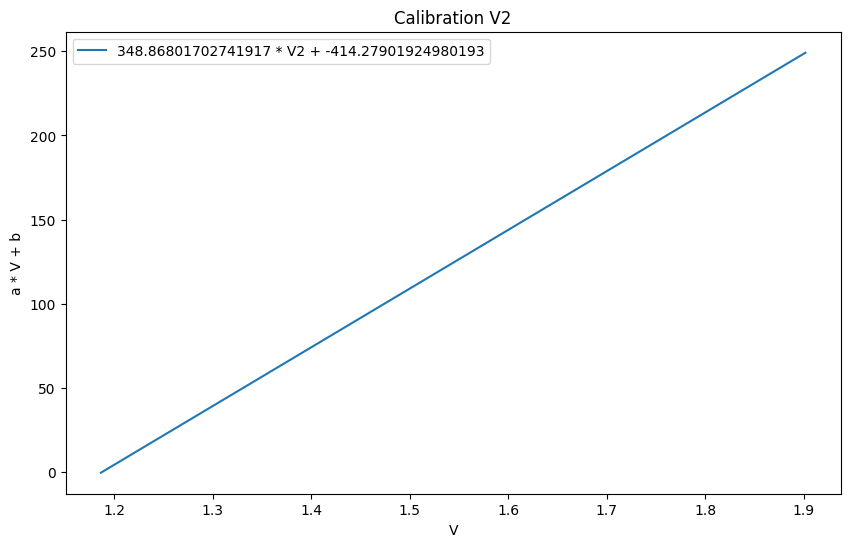

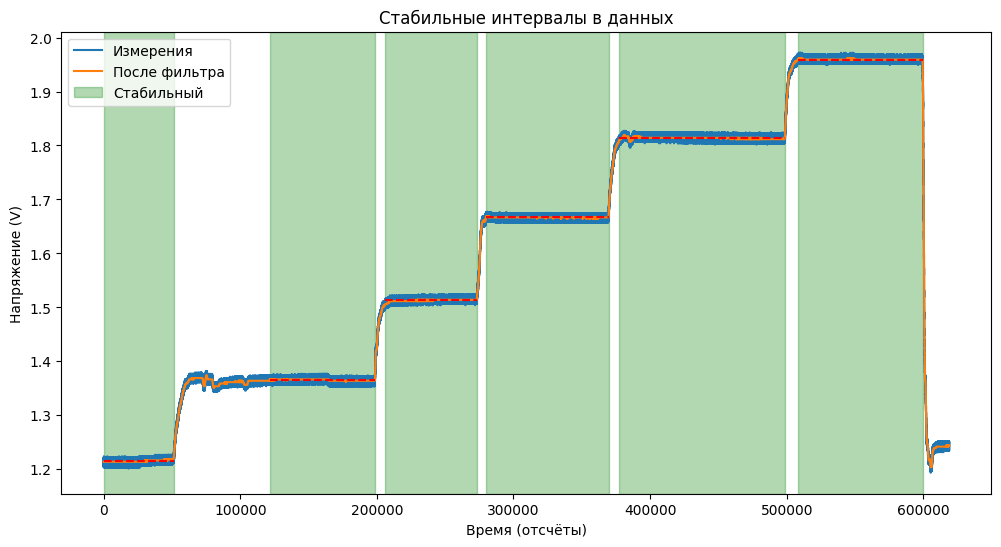

Найдены стабильные интервалы:
Интервал [0, 51478]: среднее = 1.215 V
Интервал [121467, 198726]: среднее = 1.365 V
Интервал [206075, 273055]: среднее = 1.513 V
Интервал [279856, 369831]: среднее = 1.667 V
Интервал [377036, 498815]: среднее = 1.814 V
Интервал [508601, 599567]: среднее = 1.959 V


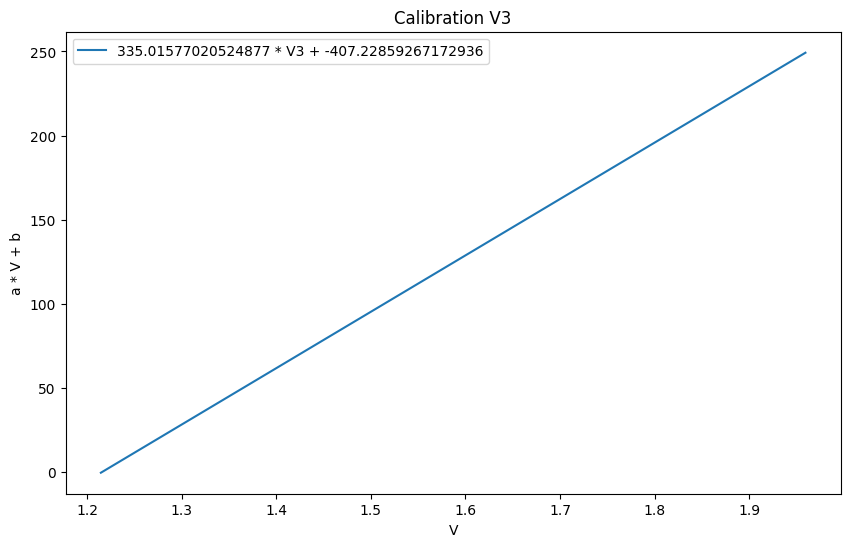

In [7]:
# Настройки отображения графиков (опционально)
plt.rcParams['figure.figsize'] = [10, 6]

#calibration
Pressure = treadmill.values
#measure
Pressure_data = data.values
#time
TIME_60 = step_time_data.values


# Построение сырых графиков
plt.figure()
for i in range(4):
    plt.subplot(4, 1, i+1)
    plt.plot(Pressure[:, i])
    plt.title(f"V{i+1}")
plt.tight_layout()
plt.show()

# Калибровочные расчеты
P = np.array([0, 50, 100, 150, 200, 250])

# Поиск интервалов и их отображение
def median_filter_pandas(signal_data, window_size):
    """
    Медианный фильтр
    """
    if window_size % 2 == 0:
        window_size += 1  # делаем нечетным
    
    series = pd.Series(signal_data)
    return series.rolling(window=window_size, center=True, min_periods=1).median().values
    
for k in range(4):
    Pressure_new = median_filter_pandas(Pressure[:, k],201)
    stable_intervals = find_stable_intervals(Pressure_new, threshold=0.012, min_length=50000)
    plt.figure(figsize=(12, 6))
    plt.plot(Pressure[:, k], label="Измерения")
    plt.plot(Pressure_new, label="После фильтра")
    for i, (start, end) in enumerate(stable_intervals):
        plt.axvspan(start, end, alpha=0.3, color='green', label="Стабильный" if i == 0 else "")
        mean_val = np.mean(Pressure_new[start:end+1])
        plt.hlines(mean_val, start, end, colors='red', linestyles='dashed')
    plt.xlabel("Время (отсчёты)")
    plt.ylabel("Напряжение (V)")
    plt.legend()
    plt.title("Стабильные интервалы в данных")
    plt.show()
    
    # Вывод результатов
    print("Найдены стабильные интервалы:")
    for start, end in stable_intervals:
        print(f"Интервал [{start}, {end}]: среднее = {np.mean(Pressure_new[start:end+1]):.3f} V")
    
    V = [np.mean(Pressure_new[start:end+1]) for start, end in stable_intervals]  
    a = np.polyfit(V, P, 1)
    if k==0:
        IV = Pressure_data[:,k]*a[0] + a[1]
    if k==1:
        GSV1 = Pressure_data[:,k]*a[0] + a[1]
    if k==2:
        GSV2 = Pressure_data[:,k]*a[0] + a[1]
    if k==3:
        GSV3 = Pressure_data[:,k]*a[0] + a[1]
    

    
    # Построение калибровочных графиков
    plt.figure()
    plt.plot(V, np.polyval(a, V), label=f"{a[0]} * V{k} + {a[1]}")
    plt.xlabel("V")
    plt.ylabel("a * V + b")
    plt.legend()
    plt.title(f"Calibration V{k}")
    plt.show()
data_array = [IV, GSV1,GSV2, GSV3]



606934 606934


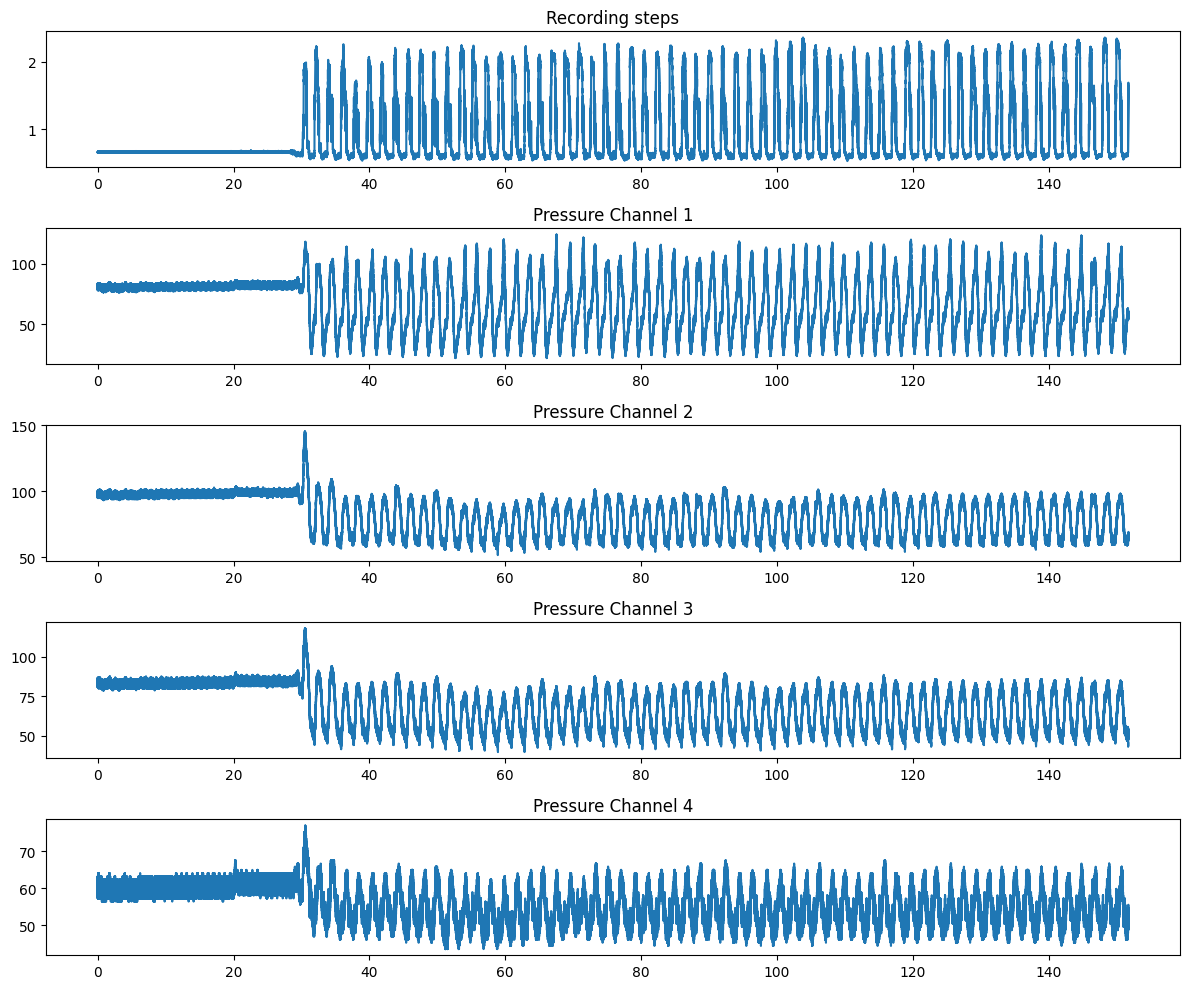

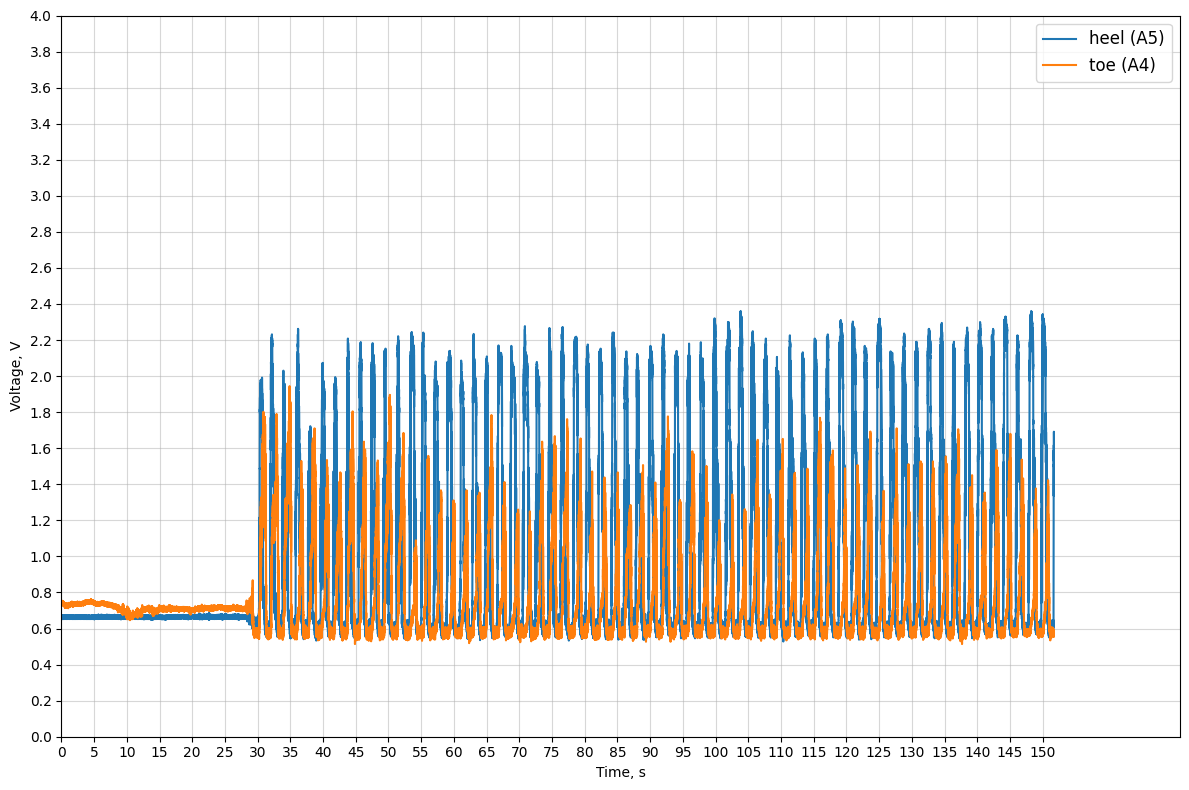

NameError: name 'find_start_peak_derivative' is not defined

In [10]:
#обработка измерений отсчета шагов и вывод измеренный давлений
#0.00025 - шаг по времени в таблице (надо автоматизировать)
TIME_MEASURE = int(len(TIME_60[:, 1])*0.00025)+1
print(len(TIME_60[:, 0]),len(TIME_60[:, 1] ))


plt.figure(figsize=(12, 10))

# Первый subplot
plt.subplot(5, 1, 1)
plt.plot(TIME_60[:, 1], TIME_60[:, 0])
plt.title('Recording steps')


for i in range(4):
    plt.subplot(5, 1, i + 2)
    plt.plot(TIME_60[:, 1], data_array[i])
    plt.title(f'Pressure Channel {i + 1}')

plt.tight_layout()
plt.show()

# %% Второй график - версия для DataFrame
plt.figure(figsize=(12, 8))

# Создаем plot с двумя линиями
line1, = plt.plot(TIME_60[:, 1], TIME_60[:, 0], label='heel (A5)')
line2, = plt.plot(TIME_60[:, 1], TIME_60[:, 2], label='toe (A4)')

# Настройки как в оригинале
plt.grid(True, alpha=0.5)
plt.gcf().set_facecolor('white')
plt.xticks(np.arange(0,TIME_MEASURE, 5))
plt.yticks(np.arange(0, 4.1, 0.2))
plt.ylabel('Voltage, V')
plt.xlabel('Time, s')
plt.legend(fontsize=12)
plt.xlim([0, 171])
plt.ylim([0, 4])

plt.tight_layout()
plt.show()

# %% Movement signal processing - версия для DataFrame
windowSize = 200
b = (1/windowSize) * np.ones(windowSize)
a = 1

# Применяем фильтр
A = lfilter(b, a, TIME_60[:, 0])
B = lfilter(b, a, TIME_60[:, 2])

# Обрезаем данные

# start_index = 115999
# start_index = find_start_index(A,100)

start_index = find_start_peak_derivative(A, 0.00003)
print(start_index)
A = A[start_index:]
B = B[start_index:]
time_trimmed = TIME_60[start_index:, 1] - TIME_60[start_index, 1]

# График обработанных сигналов
plt.figure(figsize=(14, 8))

plt.plot(time_trimmed, A, label='Processed heel (A5)')
plt.plot(time_trimmed, B, label='Processed toe (A4)')

plt.grid(True, alpha=0.5)
plt.gcf().set_facecolor('white')
plt.xticks(np.arange(0, TIME_MEASURE-int(start_index*0.00025), 5))
plt.yticks(np.arange(0, 4.1, 0.2))
plt.ylabel('Voltage, V')
plt.xlabel('Time, s')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Pressure_ = data.values
# IV = Pressure_(:,2)*328.686187453522 - 399.390261292136;
# GSV1 = Pressure_(:,1)*314.809985309243 - 383.127834161048;
# GSV2 = Pressure_(:,3)*348.525792732966 - 413.769142482299;
# GSV3 = Pressure_(:,4)*333.945346791074 - 405.393739327676;
# Pressure(:,1) = IV;
# Pressure(:,3) = GSV1;
# Pressure(:,2) = GSV2;
# Pressure(:,4) = GSV3;

In [9]:
from scipy.signal import lfilter , lfilter_zi
from scipy.signal import find_peaks

In [11]:
# def find_peak(signal, threshold):
#     peaks = []
#     for i in range(1, len(signal)-1):
#         if signal[i] > threshold and signal[i] > signal[i-1] and signal[i] > signal[i+1]:
#             peaks.append(i)
#     return peaks
def find_start_peak_derivative(voltage, prominence_ratio):
    """
    Находит первый пик по резкому изменению производной
    
    Parameters:
    - voltage: массив напряжений
    - time: массив времени  
    - smooth_window: размер окна для сглаживания
    - prominence_ratio: минимальная значимость пика (доля от max-min)
    """
    # Сглаживаем сигнал для уменьшения шума
    # from scipy.signal import savgol_filter
    # voltage_smooth = savgol_filter(voltage, smooth_window, 3)
    
    # Вычисляем производную
    derivative = np.gradient(voltage)
    
    # Находим пики в производной (резкие изменения)
    min_prominence = prominence_ratio * (np.max(voltage) - np.min(voltage))
    
    peaks, properties = find_peaks(
        np.abs(derivative),  # используем модуль производной
        prominence=min_prominence,
        distance=50,
        width=5
    )
    
    if len(peaks) > 0:
        # Берем первый значительный пик
        start_peak_index = peaks[0]
        # start_time = time[start_peak_index]
       
        
        return start_peak_index

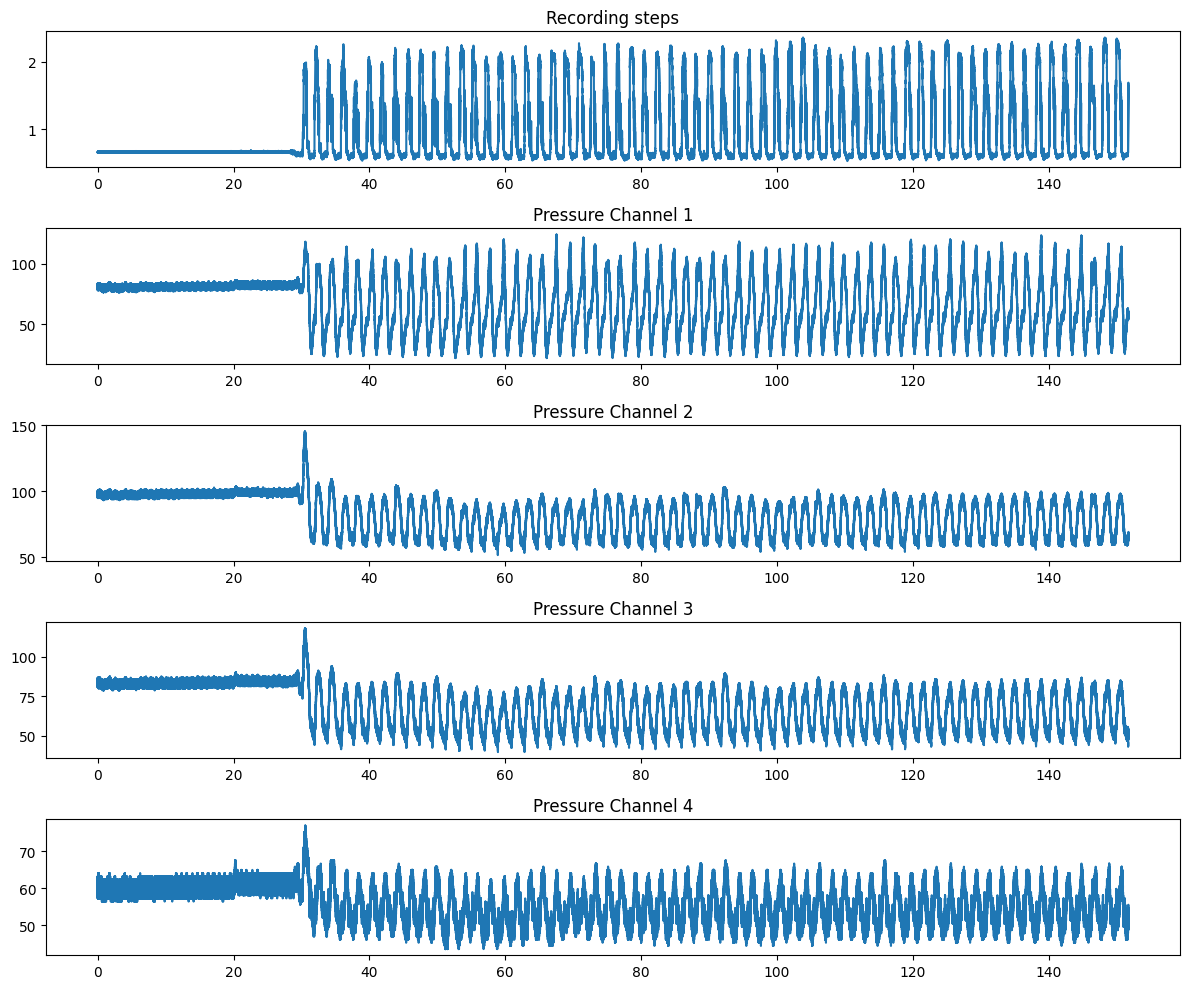

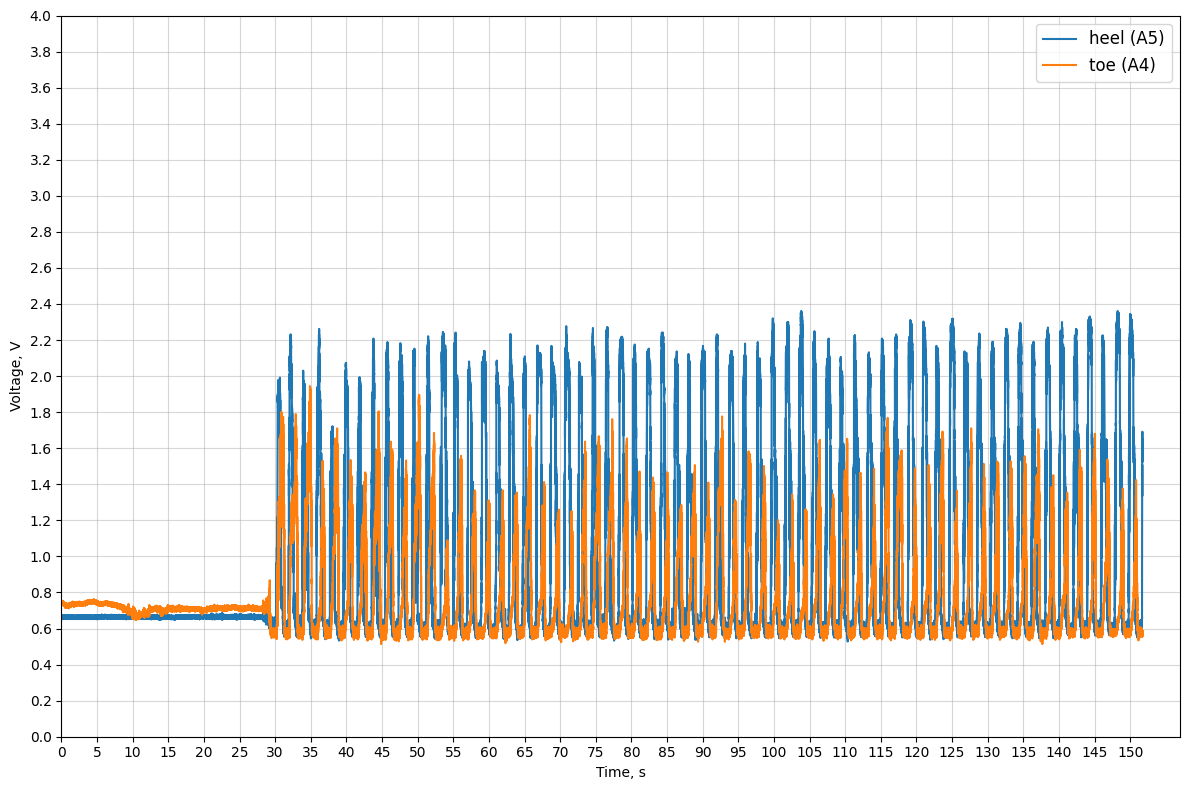

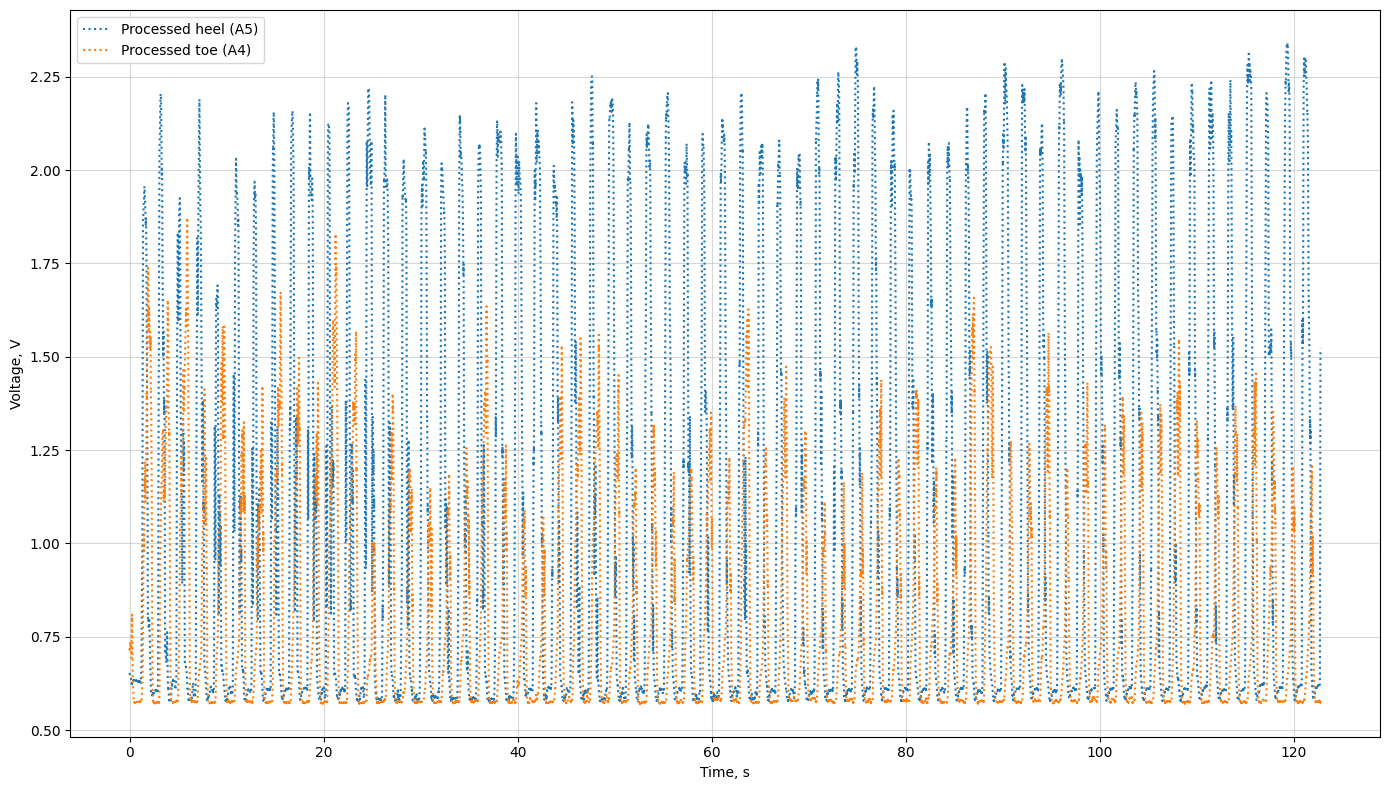

[0.62449406 0.62435403 0.62439222 ... 0.59899642 0.59900915 0.59904734]


In [12]:
#обработка измерений отсчета шагов и вывод измеренный давлений
#0.00025 - шаг по времени в таблице (надо автоматизировать)
TIME_MEASURE = int(len(TIME_60[:, 1])*0.00025)+1



plt.figure(figsize=(12, 10))

# Первый subplot
plt.subplot(5, 1, 1)
plt.plot(TIME_60[:, 1], TIME_60[:, 0])
plt.title('Recording steps')


for i in range(4):
    plt.subplot(5, 1, i + 2)
    plt.plot(TIME_60[:, 1], data_array[i])
    plt.title(f'Pressure Channel {i + 1}')

plt.tight_layout()
plt.show()

# %% Второй график - версия для DataFrame
plt.figure(figsize=(12, 8))

# Создаем plot с двумя линиями
line1, = plt.plot(TIME_60[:, 1], TIME_60[:, 0], label='heel (A5)')
line2, = plt.plot(TIME_60[:, 1], TIME_60[:, 2], label='toe (A4)')

# Настройки как в оригинале
plt.grid(True, alpha=0.5)
plt.gcf().set_facecolor('white')
plt.xticks(np.arange(0,TIME_MEASURE, 5))
plt.yticks(np.arange(0, 4.1, 0.2))
plt.ylabel('Voltage, V')
plt.xlabel('Time, s')
plt.legend(fontsize=12)
plt.xlim([0,TIME_MEASURE+5] )
plt.ylim([0, 4])

plt.tight_layout()
plt.show()

# %% Movement signal processing - версия для DataFrame
windowSize = 200
b = (1/windowSize) * np.ones(windowSize)
a = 1

# Применяем фильтр
A = lfilter(b, a, TIME_60[:, 0])
B = lfilter(b, a, TIME_60[:, 2])

# Обрезаем данные

# start_index = 115999
# start_index = find_start_index(A,100)
start_index = find_start_peak_derivative(A, 0.00003)

# start_index = 115999
A = A[start_index:]
B = B[start_index:]
time_trimmed = TIME_60[start_index:, 1] - TIME_60[start_index, 1]

# График обработанных сигналов
plt.figure(figsize=(14, 8))

plt.plot(time_trimmed, A, label='Processed heel (A5)', linestyle='dotted')
plt.plot(time_trimmed, B, label='Processed toe (A4)', linestyle='dotted' )

plt.grid(True, alpha=0.5)
plt.gcf().set_facecolor('white')
# plt.xticks(np.arange(0, TIME_MEASURE-int(start_index*0.00025), 5))
# plt.yticks(np.arange(0, 4.1, 0.2))
plt.ylabel('Voltage, V')
plt.xlabel('Time, s')
plt.legend()

plt.tight_layout()
plt.show()
print(A[1000:10000:5])

## примеры

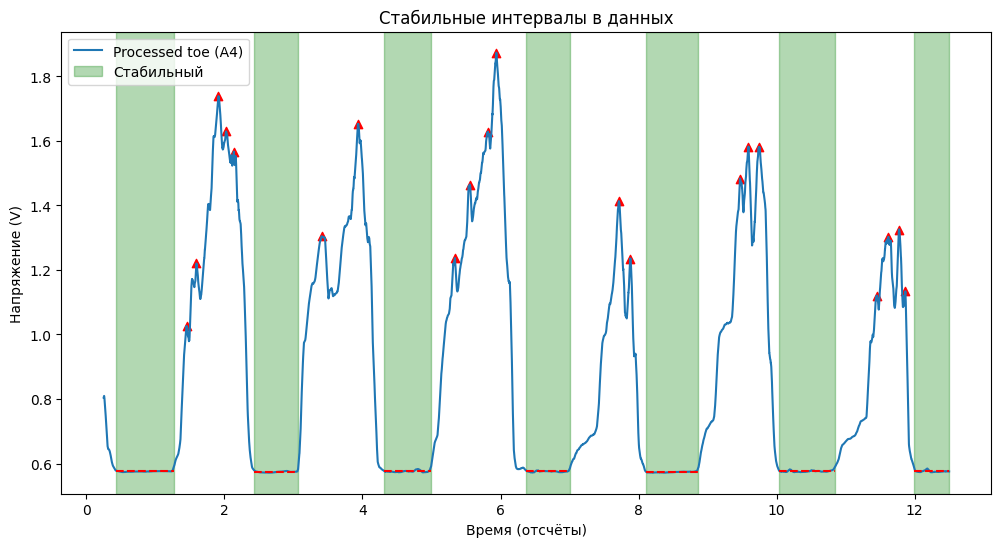

In [12]:


def detect_foot_strike_events(voltage_data, time_data=None, min_peak_height=None, min_peak_distance=10, prominence_ratio=0.3, smoothing_window=5, plot_results=True):
    if min_peak_height is None:
        baseline = np.percentile(voltage_data, 20)  # 20-й перцентиль как базовый уровень
        dynamic_range = np.percentile(voltage_data, 80) - baseline
        # min_peak_height = baseline + dynamic_range * 0.1
        min_peak_height = baseline
        # Находим пики (моменты максимального напряжения - пик удара)
    peaks, peak_properties = find_peaks(voltage_data, height = min_peak_height,distance=min_peak_distance, prominence = dynamic_range*prominence_ratio)
    return peaks, peak_properties

peaks, peak_properties = detect_foot_strike_events(B[1000:50000], min_peak_distance=10, prominence_ratio=0.06)

stable_intervals = find_stable_intervals(B[1000:50000], threshold=0.012, min_length=1000)
plt.figure(figsize=(12, 6))
plt.plot(time_trimmed[1000:50000], B[1000:50000], label='Processed toe (A4)')
plt.scatter(time_trimmed[1000+peaks],B[1000+peaks], marker='^', color = 'red' )

# Преобразуем индексы стабильных интервалов к глобальным индексам
global_intervals = []
for (start, end) in stable_intervals:
    global_start = start + 1000
    global_end = end + 1000
    global_intervals.append((global_start, global_end))

for i, (start, end) in enumerate(global_intervals):
    plt.axvspan(time_trimmed[start], time_trimmed[end], alpha=0.3, color='green', label="Стабильный" if i == 0 else "")
    mean_val = np.mean(B[start:end+1])
    plt.hlines(mean_val, time_trimmed[start], time_trimmed[end], colors='red', linestyles='dashed')

plt.xlabel("Время (отсчёты)")
plt.ylabel("Напряжение (V)")
plt.legend()
plt.title("Стабильные интервалы в данных")
plt.show()
# Вывод результатов
# print("Найдены стабильные интервалы:")
# for start, end in stable_intervals:
#     print(f"Интервал [{start}, {end}]: среднее = {np.mean(B[start:end+1]):.3f} V")

1.5644449607197526
1.566422724408467 

1.4867805132794139
1.6519783480882375 

1.685489240380824
1.8727658226453598 

1.2716568668296249
1.235107871684857 

1.4239272945323438
1.5811232220803109 

1.192514732999934
1.1330825995311762 



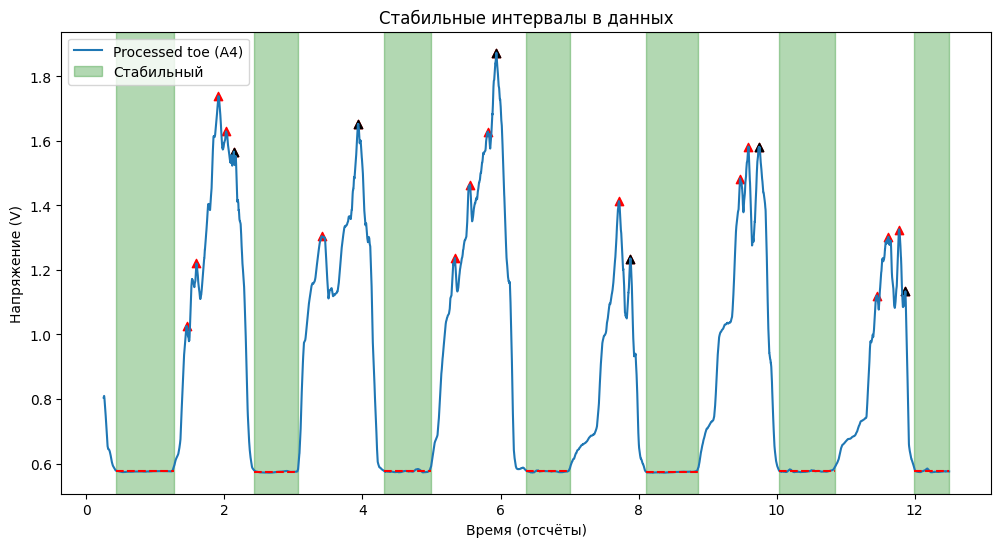

In [17]:
intervals_step_toe = []
intervals_steps = []
for i, (start, end) in enumerate(global_intervals):
        intervals_step_toe.append(start)
        intervals_step_toe.append(end)
for i in range(1,len(intervals_step_toe)-1,2): 
    start = intervals_step_toe[i]
    end = intervals_step_toe[i+1]
    intervals_steps.append((start, end))
    
# print(intervals_step_toe,   intervals_steps, peaks)
# end_peaks = []
# last_max_indices = []
# processed_intervals = set()

# for i, idx in enumerate(peaks):
#     interval =  B[idx]
#     if interval not in processed_intervals:
#         # Находим все максимумы этого интервала
#         mask = ( B[peaks] == interval)
#         interval_maxes = peaks[mask]
#         # Берем последний максимум интервала
#         last_max_indices.append(interval_maxes[-1])
#         processed_intervals.add(interval)
# print(last_max_indices)





# Создаем список для хранения последних максимумов в каждом интервале
last_max_indices = []
toe_landing = []
# Для каждого интервала ищем последний максимум
for start, end in intervals_steps:
    toe_landing.append(start)
    
    # Находим все максимумы, которые попадают в текущий интервал
    mask = (peaks>= start) & (peaks<= end)
    peaks_in_interval = peaks[mask]
    
    if len(peaks_in_interval) > 0:
        print(0.9*np.max(B[1000+peaks_in_interval]))
        for i in peaks_in_interval[::-1]:
        # Берем последний максимум в интервале не меньший чем на 20% от большего иначе предыдущий
            if B[1000+i] >= 0.8*np.max(B[1000+peaks_in_interval]):
                last_max = i
                break
        print(B[1000+last_max], "\n")
        
        
        last_max_indices.append(last_max)
    else:
        # Если в интервале нет максимумов, можно добавить None или пропустить
        last_max_indices.append(None)
        print("В интервале нет максимумов!!!!")

# Преобразуем в numpy array
last_max_indices = np.array(last_max_indices)
toe_off = last_max_indices
plt.figure(figsize=(12, 6))
plt.plot(time_trimmed[1000:50000], B[1000:50000], label='Processed toe (A4)')
plt.scatter(time_trimmed[1000+peaks],B[1000+peaks], marker='^', color = 'red' )
plt.scatter(time_trimmed[1000+last_max_indices],B[1000+last_max_indices], marker='^', color = 'black' )


for i, (start, end) in enumerate(global_intervals):
    plt.axvspan(time_trimmed[start], time_trimmed[end], alpha=0.3, color='green', label="Стабильный" if i == 0 else "")
    mean_val = np.mean(B[start:end+1])
    plt.hlines(mean_val, time_trimmed[start], time_trimmed[end], colors='red', linestyles='dashed')

plt.xlabel("Время (отсчёты)")
plt.ylabel("Напряжение (V)")
plt.legend()
plt.title("Стабильные интервалы в данных")
plt.show()




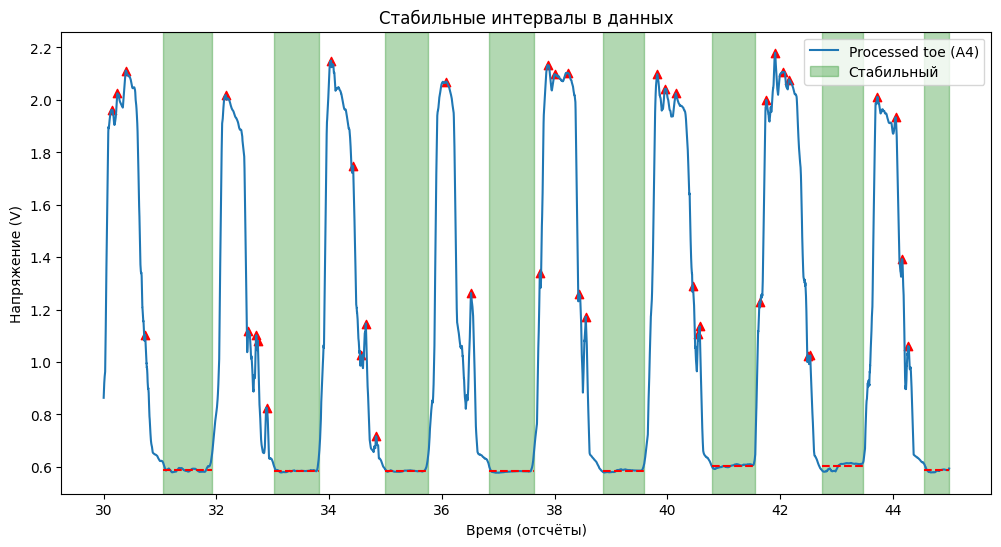

[124244, 127689, 132106, 135270, 139961, 142994, 147334, 150515, 155405, 158379, 163141, 166231, 171002, 173917, 178202, 179999] [(127689, 132106), (135270, 139961), (142994, 147334), (150515, 155405), (158379, 163141), (166231, 171002), (173917, 178202)] [  600   974  1573  2921  8649 10265 10813 10937 11563 16136 17702 18269
 18602 19317 24315 26069 30950 31514 32011 32942 33742 34211 39285 39851
 40597 41814 42177 42294 46549 47023 47655 48227 48623 49980 50145 54912
 56204 56667 57093]


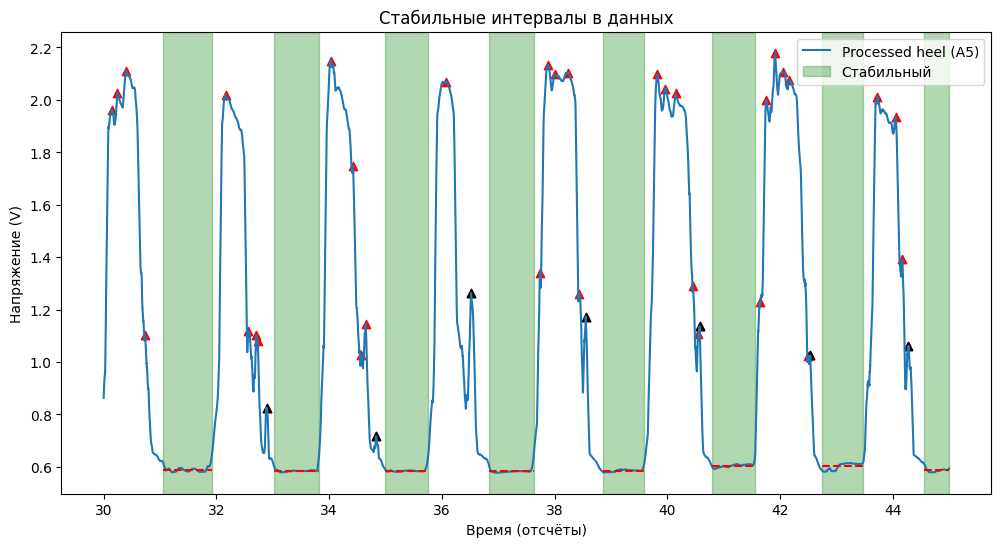

In [64]:


def detect_foot_strike_events(voltage_data, time_data=None, min_peak_height=None, min_peak_distance=10, prominence_ratio=0.3, smoothing_window=5, plot_results=True):
    if min_peak_height is None:
        baseline = np.percentile(voltage_data, 20)  # 20-й перцентиль как базовый уровень
        dynamic_range = np.percentile(voltage_data, 80) - baseline
        # min_peak_height = baseline + dynamic_range * 0.1
        min_peak_height = baseline
        # Находим пики (моменты максимального напряжения - пик удара)
    peaks, peak_properties = find_peaks(voltage_data, height = min_peak_height,distance=min_peak_distance, prominence = dynamic_range*prominence_ratio)
    return peaks, peak_properties

peaks, peak_properties = detect_foot_strike_events(A[120000:180000], min_peak_distance=5, prominence_ratio=0.015)

stable_intervals = find_stable_intervals(A[120000:180000], threshold=0.035, min_length=1200)
plt.figure(figsize=(12, 6))
plt.plot(time_trimmed[120000:180000], A[120000:180000], label='Processed toe (A4)')
plt.scatter(time_trimmed[120000+peaks],A[120000+peaks], marker='^', color = 'red' )

# Преобразуем индексы стабильных интервалов к глобальным индексам
global_intervals = []
for (start, end) in stable_intervals:
    global_start = start + 120000
    global_end = end + 120000
    global_intervals.append((global_start, global_end))

for i, (start, end) in enumerate(global_intervals):
    plt.axvspan(time_trimmed[start], time_trimmed[end], alpha=0.3, color='green', label="Стабильный" if i == 0 else "")
    mean_val = np.mean(A[start:end+1])
    plt.hlines(mean_val, time_trimmed[start], time_trimmed[end], colors='red', linestyles='dashed')

plt.xlabel("Время (отсчёты)")
plt.ylabel("Напряжение (V)")
plt.legend()
plt.title("Стабильные интервалы в данных")
plt.show()
# Вывод результатов
# print("Найдены стабильные интервалы:")
# for start, end in stable_intervals:
#     print(f"Интервал [{start}, {end}]: среднее = {np.mean(B[start:end+1]):.3f} V")
intervals_step_toe = []
intervals_steps = []
for i, (start, end) in enumerate(global_intervals):
        intervals_step_toe.append(start)
        intervals_step_toe.append(end)
for i in range(1,len(intervals_step_toe)-1,2): 
    start = intervals_step_toe[i]
    end = intervals_step_toe[i+1]
    intervals_steps.append((start, end))
    
print(intervals_step_toe,   intervals_steps, peaks)
# end_peaks = []
# last_max_indices = []
# processed_intervals = set()

# for i, idx in enumerate(peaks):
#     interval =  B[idx]
#     if interval not in processed_intervals:
#         # Находим все максимумы этого интервала
#         mask = ( B[peaks] == interval)
#         interval_maxes = peaks[mask]
#         # Берем последний максимум интервала
#         last_max_indices.append(interval_maxes[-1])
#         processed_intervals.add(interval)
# print(last_max_indices)
peaks = 120000+peaks




# Создаем список для хранения последних максимумов в каждом интервале
last_max_indices = []
heel_strike = []
# Для каждого интервала ищем последний максимум
for start, end in intervals_steps:
    heel_strike.append(start)
    # Находим все максимумы, которые попадают в текущий интервал
    mask = (peaks>= start) & (peaks<= end)
    peaks_in_interval = peaks[mask]
    
    if len(peaks_in_interval) > 0:
        # print(0.9*np.max(A[1000+peaks_in_interval]))
        last_max = peaks_in_interval[-1]
        last_max_indices.append(last_max)
        # for i in peaks_in_interval[::-1]:
        # Берем последний максимум в интервале не меньший чем на 20% от большего иначе предыдущий
            # if A[1000+i] >= 0.8*np.max(A[1000+peaks_in_interval]):
            #     last_max = i
            #     break
        # print(A[1000+last_max], "\n")
        
        
        # last_max_indices.append(last_max)
    else:
        # Если в интервале нет максимумов, можно добавить None или пропустить
        last_max_indices.append(None)
        print("В интервале нет максимумов!!!!")

# Преобразуем в numpy array
last_max_indices = np.array(last_max_indices)
heel_rise = last_max_indices
plt.figure(figsize=(12, 6))
plt.plot(time_trimmed[120000:180000], A[120000:180000], label='Processed heel (A5)')
plt.scatter(time_trimmed[peaks],A[peaks], marker='^', color = 'red' )
plt.scatter(time_trimmed[last_max_indices],A[last_max_indices], marker='^', color = 'black' )


for i, (start, end) in enumerate(global_intervals):
    plt.axvspan(time_trimmed[start], time_trimmed[end], alpha=0.3, color='green', label="Стабильный" if i == 0 else "")
    mean_val = np.mean(A[start:end+1])
    plt.hlines(mean_val, time_trimmed[start], time_trimmed[end], colors='red', linestyles='dashed')

plt.xlabel("Время (отсчёты)")
plt.ylabel("Напряжение (V)")
plt.legend()
plt.title("Стабильные интервалы в данных")
plt.show()

## toe

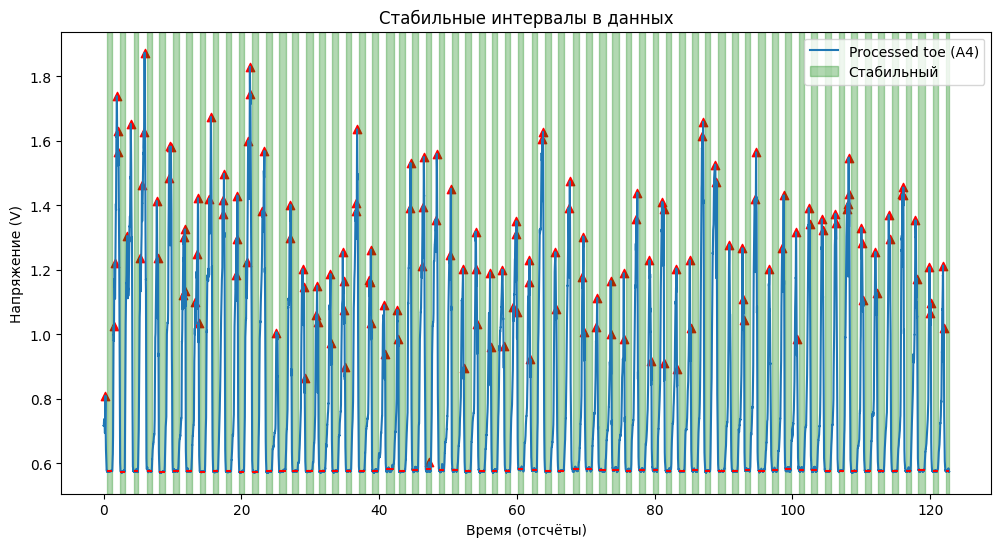

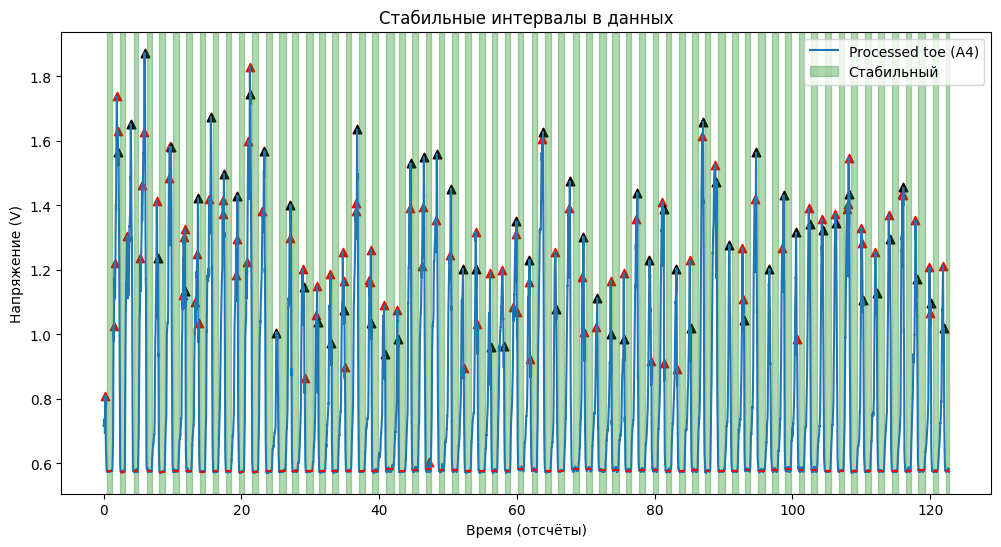

In [13]:


def detect_foot_strike_events(voltage_data, time_data=None, min_peak_height=None, min_peak_distance=10, prominence_ratio=0.3, smoothing_window=5, plot_results=True):
    if min_peak_height is None:
        baseline = np.percentile(voltage_data, 20)  # 20-й перцентиль как базовый уровень
        dynamic_range = np.percentile(voltage_data, 80) - baseline
        # min_peak_height = baseline + dynamic_range * 0.1
        min_peak_height = baseline
        # Находим пики (моменты максимального напряжения - пик удара)
    peaks, peak_properties = find_peaks(voltage_data, height = min_peak_height,distance=min_peak_distance, prominence = dynamic_range*prominence_ratio)
    return peaks, peak_properties

peaks, peak_properties = detect_foot_strike_events(B, min_peak_distance=10, prominence_ratio=0.06)

stable_intervals = find_stable_intervals(B, threshold=0.018, min_length=1000)
plt.figure(figsize=(12, 6))
plt.plot(time_trimmed, B, label='Processed toe (A4)')
plt.scatter(time_trimmed[peaks],B[peaks], marker='^', color = 'red' )

# Преобразуем индексы стабильных интервалов к глобальным индексам
global_intervals = []
for (start, end) in stable_intervals:
    global_start = start
    global_end = end
    global_intervals.append((global_start, global_end))

for i, (start, end) in enumerate(global_intervals):
    plt.axvspan(time_trimmed[start], time_trimmed[end], alpha=0.3, color='green', label="Стабильный" if i == 0 else "")
    mean_val = np.mean(B[start:end+1])
    plt.hlines(mean_val, time_trimmed[start], time_trimmed[end], colors='red', linestyles='dashed')

plt.xlabel("Время (отсчёты)")
plt.ylabel("Напряжение (V)")
plt.legend()
plt.title("Стабильные интервалы в данных")
plt.show()
# Вывод результатов
# print("Найдены стабильные интервалы:")
# for start, end in stable_intervals:
#     print(f"Интервал [{start}, {end}]: среднее = {np.mean(B[start:end+1]):.3f} V")
intervals_step_toe = []
intervals_steps = []
for i, (start, end) in enumerate(global_intervals):
        intervals_step_toe.append(start)
        intervals_step_toe.append(end)
for i in range(1,len(intervals_step_toe)-1,2): 
    start = intervals_step_toe[i]
    end = intervals_step_toe[i+1]
    intervals_steps.append((start, end))
    
# print(intervals_step_toe,   intervals_steps, peaks)
# end_peaks = []
# last_max_indices = []
# processed_intervals = set()

# for i, idx in enumerate(peaks):
#     interval =  B[idx]
#     if interval not in processed_intervals:
#         # Находим все максимумы этого интервала
#         mask = ( B[peaks] == interval)
#         interval_maxes = peaks[mask]
#         # Берем последний максимум интервала
#         last_max_indices.append(interval_maxes[-1])
#         processed_intervals.add(interval)
# print(last_max_indices)





# Создаем список для хранения последних максимумов в каждом интервале
last_max_indices = []
toe_landing = []
# Для каждого интервала ищем последний максимум
for start, end in intervals_steps:
    toe_landing.append(start)
    
    # Находим все максимумы, которые попадают в текущий интервал
    mask = (peaks>= start) & (peaks<= end)
    peaks_in_interval = peaks[mask]
    
    if len(peaks_in_interval) > 0:
        # print(0.9*np.max(B[peaks_in_interval]))
        for i in peaks_in_interval[::-1]:
        # Берем последний максимум в интервале не меньший чем на 20% от большего иначе предыдущий
            if B[i] >= 0.8*np.max(B[peaks_in_interval]):
                last_max = i
                break
        # print(B[last_max], "\n")
        
        
        last_max_indices.append(last_max)
    else:
        # Если в интервале нет максимумов, можно добавить None или пропустить
        last_max_indices.append(None)
        print("В интервале нет максимумов!!!!")

# Преобразуем в numpy array
last_max_indices = np.array(last_max_indices)
toe_off = last_max_indices
plt.figure(figsize=(12, 6))
plt.plot(time_trimmed, B, label='Processed toe (A4)')
plt.scatter(time_trimmed[peaks],B[peaks], marker='^', color = 'red' )
plt.scatter(time_trimmed[last_max_indices],B[last_max_indices], marker='^', color = 'black' )


for i, (start, end) in enumerate(global_intervals):
    plt.axvspan(time_trimmed[start], time_trimmed[end], alpha=0.3, color='green', label="Стабильный" if i == 0 else "")
    mean_val = np.mean(B[start:end+1])
    plt.hlines(mean_val, time_trimmed[start], time_trimmed[end], colors='red', linestyles='dashed')

plt.xlabel("Время (отсчёты)")
plt.ylabel("Напряжение (V)")
plt.legend()
plt.title("Стабильные интервалы в данных")
plt.show()




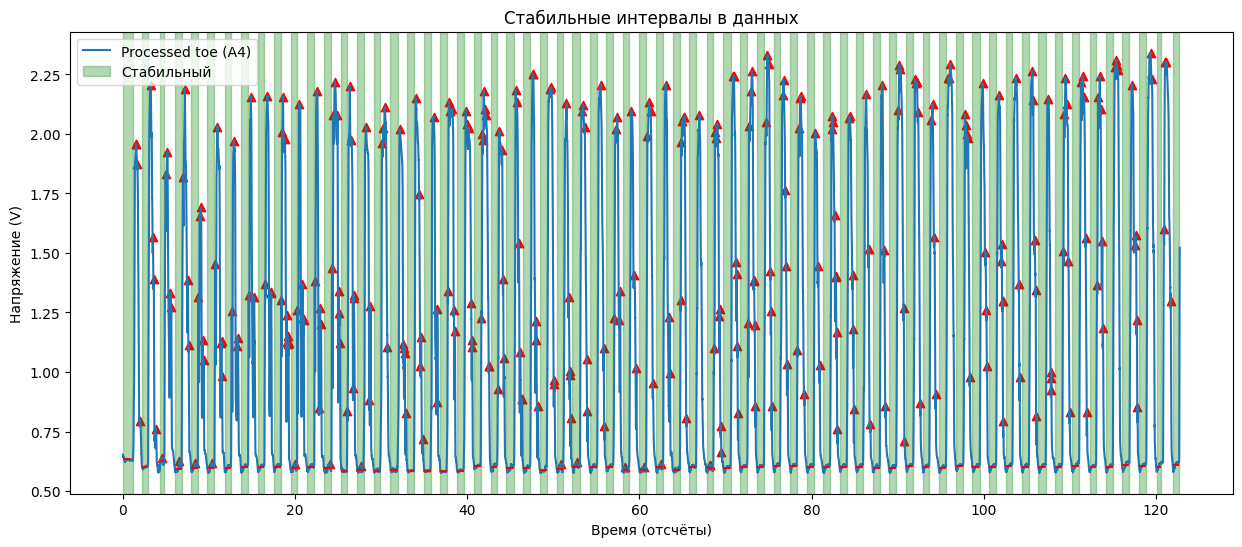

128


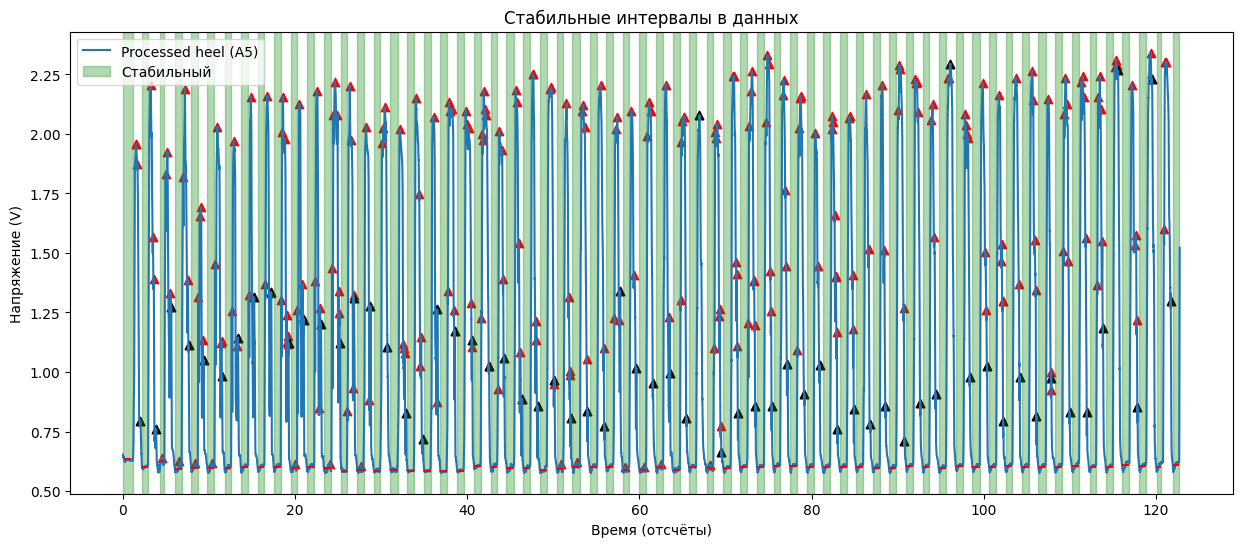

In [14]:


def detect_foot_strike_events(voltage_data, time_data=None, min_peak_height=None, min_peak_distance=10, prominence_ratio=0.3, smoothing_window=5, plot_results=True):
    if min_peak_height is None:
        baseline = np.percentile(voltage_data, 20)  # 20-й перцентиль как базовый уровень
        dynamic_range = np.percentile(voltage_data, 80) - baseline
        # min_peak_height = baseline + dynamic_range * 0.1
        min_peak_height = baseline
        # Находим пики (моменты максимального напряжения - пик удара)
    peaks, peak_properties = find_peaks(voltage_data, height = min_peak_height,distance=min_peak_distance, prominence = dynamic_range*prominence_ratio)
    return peaks, peak_properties

peaks, peak_properties = detect_foot_strike_events(A, min_peak_distance=5, prominence_ratio=0.015)

stable_intervals = find_stable_intervals(A, threshold=0.035, min_length=1500)
plt.figure(figsize=(15, 6))
plt.plot(time_trimmed, A, label='Processed toe (A4)')
plt.scatter(time_trimmed[peaks],A[peaks], marker='^', color = 'red' )

# Преобразуем индексы стабильных интервалов к глобальным индексам
global_intervals = []
for (start, end) in stable_intervals:
    global_start = start 
    global_end = end 
    global_intervals.append((global_start, global_end))

for i, (start, end) in enumerate(global_intervals):
    plt.axvspan(time_trimmed[start], time_trimmed[end], alpha=0.3, color='green', label="Стабильный" if i == 0 else "")
    mean_val = np.mean(A[start:end+1])
    plt.hlines(mean_val, time_trimmed[start], time_trimmed[end], colors='red', linestyles='dashed')

plt.xlabel("Время (отсчёты)")
plt.ylabel("Напряжение (V)")
plt.legend()
plt.title("Стабильные интервалы в данных")
plt.show()
# Вывод результатов
# print("Найдены стабильные интервалы:")
# for start, end in stable_intervals:
#     print(f"Интервал [{start}, {end}]: среднее = {np.mean(B[start:end+1]):.3f} V")
intervals_step_toe = []
intervals_steps = []
for i, (start, end) in enumerate(global_intervals):
        intervals_step_toe.append(start)
        intervals_step_toe.append(end)
print(len(intervals_step_toe))
for i in range(1,len(intervals_step_toe)-1,2): 
    start = intervals_step_toe[i]
    end = intervals_step_toe[i+1]
    intervals_steps.append((start, end))
    
# print(intervals_step_toe,   intervals_steps, peaks)
# end_peaks = []
# last_max_indices = []
# processed_intervals = set()

# for i, idx in enumerate(peaks):
#     interval =  B[idx]
#     if interval not in processed_intervals:
#         # Находим все максимумы этого интервала
#         mask = ( B[peaks] == interval)
#         interval_maxes = peaks[mask]
#         # Берем последний максимум интервала
#         last_max_indices.append(interval_maxes[-1])
#         processed_intervals.add(interval)
# print(last_max_indices)





# Создаем список для хранения последних максимумов в каждом интервале
last_max_indices = []
heel_strike = []
# Для каждого интервала ищем последний максимум
for start, end in intervals_steps:
    heel_strike.append(start)
    # Находим все максимумы, которые попадают в текущий интервал
    mask = (peaks>= start) & (peaks<= end)
    peaks_in_interval = peaks[mask]
    
    if len(peaks_in_interval) > 0:
        # print(0.9*np.max(A[peaks_in_interval]))
        last_max = peaks_in_interval[-1]
        last_max_indices.append(last_max)
        # for i in peaks_in_interval[::-1]:
        # Берем последний максимум в интервале не меньший чем на 20% от большего иначе предыдущий
            # if A[i] >= 0.8*np.max(A[peaks_in_interval]):
            #     last_max = i
            #     break
        # print(A[last_max], "\n")
        
        
        # last_max_indices.append(last_max)
    else:
        # Если в интервале нет максимумов, можно добавить None или пропустить
        last_max_indices.append(None)
        print("В интервале нет максимумов!!!!")
        
heel_strike.append(global_intervals[-1][-1])
# Преобразуем в numpy array
last_max_indices = np.array(last_max_indices)
heel_rise = last_max_indices
plt.figure(figsize=(15, 6))
plt.plot(time_trimmed, A, label='Processed heel (A5)')
plt.scatter(time_trimmed[peaks],A[peaks], marker='^', color = 'red' )
plt.scatter(time_trimmed[last_max_indices],A[last_max_indices], marker='^', color = 'black' )


for i, (start, end) in enumerate(global_intervals):
    plt.axvspan(time_trimmed[start], time_trimmed[end], alpha=0.3, color='green', label="Стабильный" if i == 0 else "")
    mean_val = np.mean(A[start:end+1])
    plt.hlines(mean_val, time_trimmed[start], time_trimmed[end], colors='red', linestyles='dashed')

plt.xlabel("Время (отсчёты)")
plt.ylabel("Напряжение (V)")
plt.legend()
plt.title("Стабильные интервалы в данных")
plt.show()

64 63 63 63


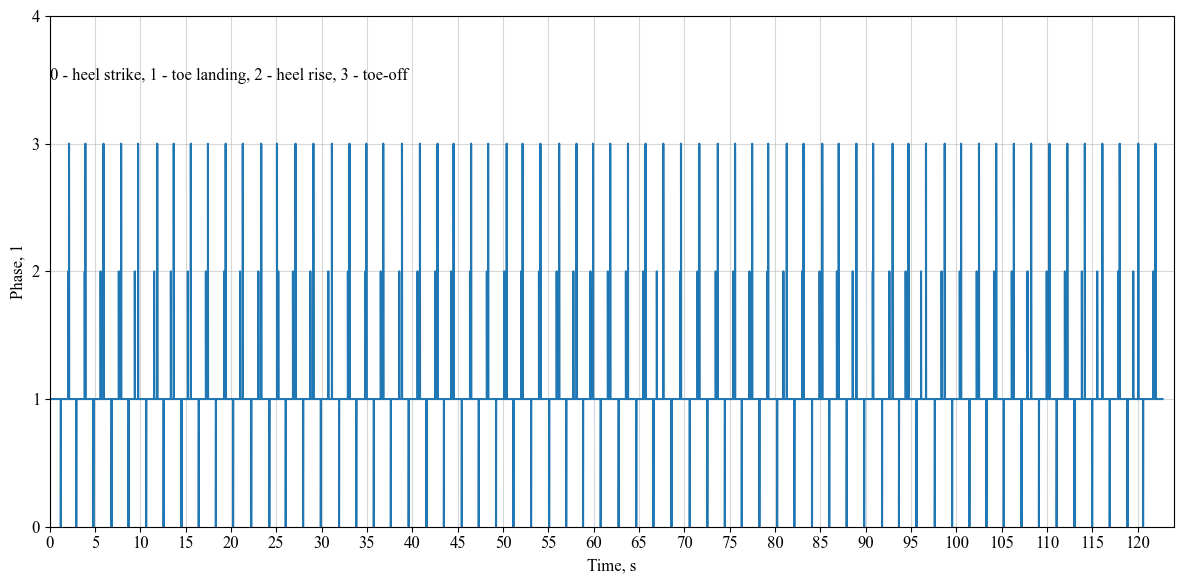

83.017529862662
Анализ походки:
Количество шагов: 63
Длительность шага: 1.928 ± 0.062 с
Время подъема пятки: 0.825 ± 0.120 с
Время отрыва носка: 1.090 ± 0.082 с


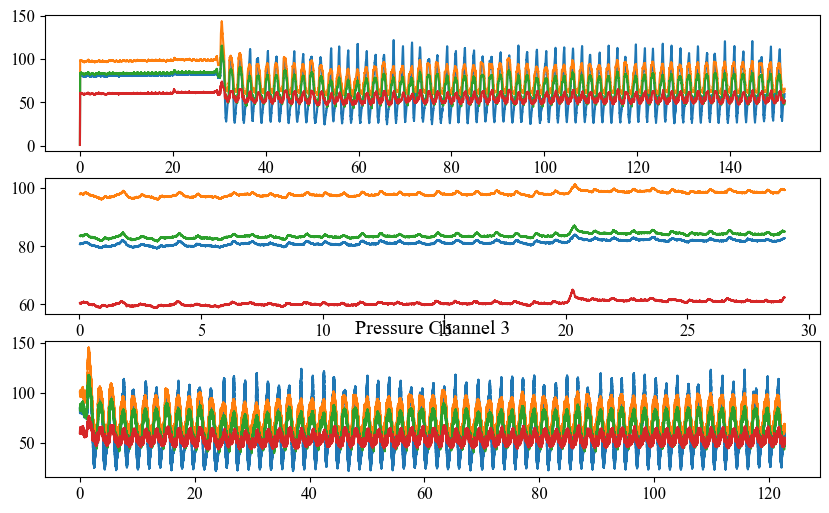

In [80]:

    


# %% Первая часть: Создание массива C на основе условий
def create_phase_array(A, B):
    """
    Создает массив фаз C на основе значений A и B
    """
    l = A.size
    C = np.ones(l)  # создаем массив из единиц
    print(len(heel_strike), len(toe_landing), len(heel_rise), len(toe_off))
    for i in range(len(heel_rise)):
        C[heel_strike[i]] = 0 # heel strike (от приземления пятки до перехода на носок)
        C[toe_landing[i]] = 1 # toe landing (от приземления пятки до отрыва носка)
        C[heel_rise[i]] = 2 # heel rise (от отрыва пятки до приземления носка)
        C[toe_off[i]] = 3  # toe-off
    # C[heel_strike] = 0
    # C[toe_landing] = 1
    # C[heel_rise] = 2
    # C[toe_off] = 3
    # Первый цикл: определение фаз по условиям
    # for i in range(l):
    #     if (A[i] > 0.7) and (B[i] < 0.7):
    #         C[i] = 0  # heel strike
    #     elif (A[i] >= 0.7) and (B[i] >= 0.7):
    #         C[i] = 1  # toe landing
    #     elif (A[i] < 0.7) and (B[i] > 0.7):
    #         C[i] = 2  # heel rise
    #     elif (A[i] < 0.7) and (B[i] < 0.7):
    #         C[i] = 3  # toe-off

    # Второй цикл: распространение фазы 3 (toe-off)
    # for i in range(l - 1):
    #     if (C[i] == 3) and (C[i + 1] > 0):
    #         C[i + 1] = 3

    # # Третий цикл: распространение фазы 1 (toe landing)
    # for i in range(l - 1):
    #     if (C[i] == 1) and (C[i + 1] == 0):
    #         C[i + 1] = 1

    # # Четвертый цикл: распространение фазы 2 (heel rise)
    # for i in range(l - 1):
    #     if (C[i] == 2) and (C[i + 1] == 1):
    #         C[i + 1] = 2

    return C

# Создаем массив фаз C
C = create_phase_array(A, B)

# Визуализация фаз
plt.figure(figsize=(12, 6))
plt.plot(time_trimmed, C, linewidth=1.5)

# Настройки графика
plt.grid(True, alpha=0.5)
plt.gcf().set_facecolor('white')
plt.xticks(np.arange(0, TIME_MEASURE-int(start_index*0.00025), 5))
plt.yticks(np.arange(0, 5, 1))  # 0:1:4 в MATLAB -> 0,1,2,3,4
plt.ylabel('Phase, 1')
plt.xlabel('Time, s')

# Добавляем текстовое описание
txt = '0 - heel strike, 1 - toe landing, 2 - heel rise, 3 - toe-off'
plt.text(0, 3.5, txt, fontsize=12)

plt.xlim([0, TIME_MEASURE-int(start_index*0.00025)])
plt.ylim([0, 4])
plt.tight_layout()
plt.show()
print(data_array[0][0])
# %% Обработка сигналов давления
def process_pressure_signals(data_array, TIME_60, window_size=100):
    """
    Обработка сигналов давления с применением фильтра
    """
    N = 100
    a = 1
    b = (1/window_size) * np.ones(window_size)
    data_array_filter =[]
    data_array_0 =[]
    data_array_cut = []
    # # Обработка начального участка (10000:40000)
    # ti_0 = Recording14[9999:40000, 1] - Recording14[9999, 1]  # MATLAB 1-based -> Python 0-based
    for i in range(4):
        data_array_filter.append(lfilter(b, a, data_array[i]))
        data_array_0.append(data_array_filter[i][N:start_index]) #в начале маленькие значения после фильтрации
        data_array_cut.append(data_array[i][start_index:])
        plt.subplot(3, 1, 1)
        plt.plot(TIME_60[:, 1], data_array_filter[i])
        plt.subplot(3, 1, 2)
        plt.plot(TIME_60[N:start_index, 1], data_array_0[i])
        plt.subplot(3, 1, 3)
        plt.plot(time_trimmed, data_array_cut[i])

     
        plt.title(f'Pressure Channel {i}')
        
    # # Применяем фильтр к каждому каналу давления
    # IV_0 = lfilter(b, a, Pressure[0])    # канал 1
    # GSV1_0 = lfilter(b, a, Pressure[1])  # канал 2  
    # GSV2_0 = lfilter(b, a, Pressure[2])  # канал 3
    # GSV3_0 = lfilter(b, a, Pressure[3])  # канал 4
    
    # # Обрезаем данные (2000:6000 в MATLAB -> 1999:6000 в Python)
    # ti_0 = ti_0[1999:6000]
    # IV_0 = IV_0[1999:6000]
    # GSV1_0 = GSV1_0[1999:6000] 
    # GSV2_0 = GSV2_0[1999:6000]
    # GSV3_0 = GSV3_0[1999:6000]
    
    # # Обработка основного участка (30000:end)
    # IV = lfilter(b, a, Pressure[0][29999:])    # канал 1
    # GSV1 = lfilter(b, a, Pressure[1][29999:])  # канал 2
    # GSV2 = lfilter(b, a, Pressure[2][29999:])  # канал 3
    # GSV3 = lfilter(b, a, Pressure[3][29999:])  # канал 4
    
    # # Обрезаем данные (86001:end)
    # IV = IV[86000:]
    # GSV1 = GSV1[86000:]
    # GSV2 = GSV2[86000:]
    # GSV3 = GSV3[86000:]
    
    return (data_array_filter, data_array_0, data_array_cut)

# Обрабатываем сигналы давления
data_array_filter, data_array_0, data_array_cut = process_pressure_signals(data_array, TIME_60)
# data_array_0 = [ti_0, IV_0, GSV1_0, GSV2_0, GSV3_0, IV, GSV1, GSV2, GSV3]
# plt.figure(figsize=(12, 10))
# for i in range(1,8):
#     plt.subplot(7, 1, i + )
#     plt.plot(data_array_0[0], data_array_0[i])
#     plt.title(f'Pressure Channel {i}')

# plt.tight_layout()
# plt.show()
# %% Анализ характеристик шага
def analyze_gait_characteristics(C, ti, t_step=None):
    """
    Анализ характеристик походки на основе фазового массива C
    """
    if t_step is None:
        t_step = ti[1] - ti[0]  # шаг по времени
        
    # Вычисляем разницу C (аналог diff в MATLAB)
    # D = np.diff(C)  # prepend=C[0] для совпадения размеров
    
    # Находим моменты начала шага (toe-off -> другая фаза)
    # st = np.where(D == -3)[0]  # переход от 3 к другой фазе
    st = heel_strike

    # Вычисляем характеристики шага
    st_l = np.diff(st) * t_step  # длительность шагов
    st_lc = np.diff(st) + 1      # количество отсчетов в шаге
    step_count = len(st_l)   # количество шагов
    # Статистика по длительности шагов
    st_lm = np.mean(st_l)        # средняя длительность
    st_lmax = np.max(st_l)       # максимальная длительность  
    st_lstd = np.std(st_l)       # стандартное отклонение
  
    # Находим фазы подъема пятки
    # st_phases = np.where(D == 1)[0]  # переход к фазе 1
    # Вычисляем время подъема пятки
    heel_rise_time = (heel_rise[:step_count] - st[:step_count]) * t_step
    
    heel_lm = np.mean(heel_rise_time)   # среднее время подъема
    heel_lmax = np.max(heel_rise_time)  # максимальное время подъема
    heel_lstd = np.std(heel_rise_time)  # стандартное отклонение
    
    # Вычисляем время отрыва носка

    
    toeoff = toe_off[:step_count]

    toe_off_time = (toe_off[:step_count] - st[:step_count]) * t_step
    
    toe_lm = np.mean(toe_off_time)    # среднее время отрыва
    toe_lmax = np.max(toe_off_time)   # максимальное время отрыва
    toe_lstd = np.std(toe_off_time)   # стандартное отклонение
    
    return {
        'step_duration': {'mean': st_lm, 'max': st_lmax, 'std': st_lstd},
        'heel_rise': {'mean': heel_lm, 'max': heel_lmax, 'std': heel_lstd},
        'toe_off': {'mean': toe_lm, 'max': toe_lmax, 'std': toe_lstd},
        'step_count': step_count,
        'step_indices': st,
    }

# Анализируем характеристики походки
gait_analysis = analyze_gait_characteristics(C, time_trimmed,0.00025)

# Выводим результаты
print("Анализ походки:")
print(f"Количество шагов: {gait_analysis['step_count']}")
print(f"Длительность шага: {gait_analysis['step_duration']['mean']:.3f} ± {gait_analysis['step_duration']['std']:.3f} с")
print(f"Время подъема пятки: {gait_analysis['heel_rise']['mean']:.3f} ± {gait_analysis['heel_rise']['std']:.3f} с")
print(f"Время отрыва носка: {gait_analysis['toe_off']['mean']:.3f} ± {gait_analysis['toe_off']['std']:.3f} с")


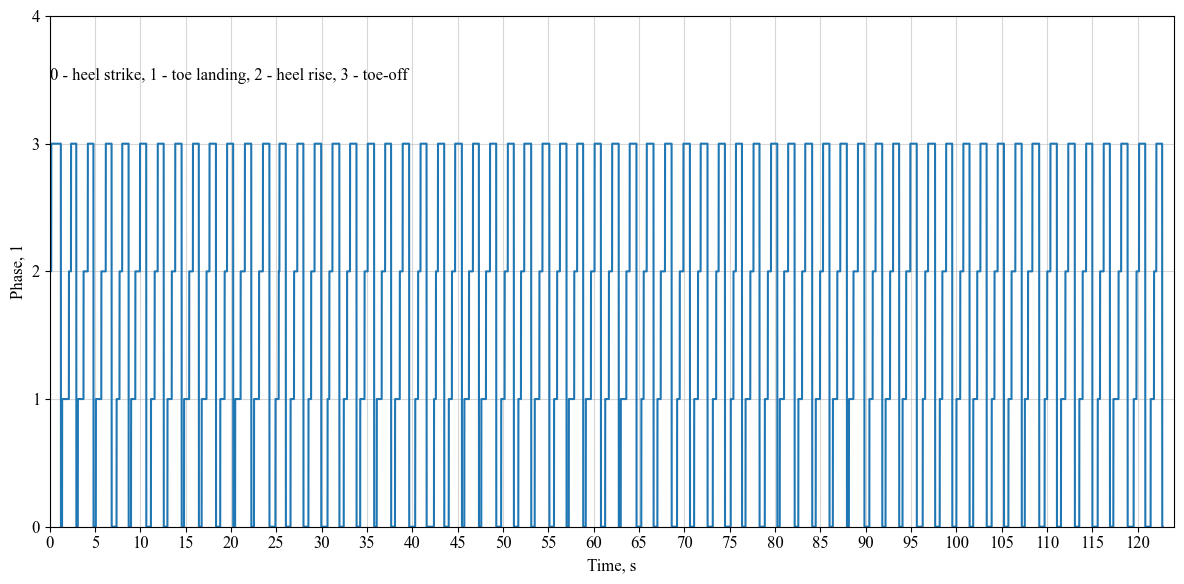

83.017529862662
Анализ походки:
Количество шагов: 63
Длительность шага: 1.928 ± 0.053 с
Время подъема пятки: 0.445 ± 0.146 с
Время отрыва носка: 0.869 ± 0.068 с


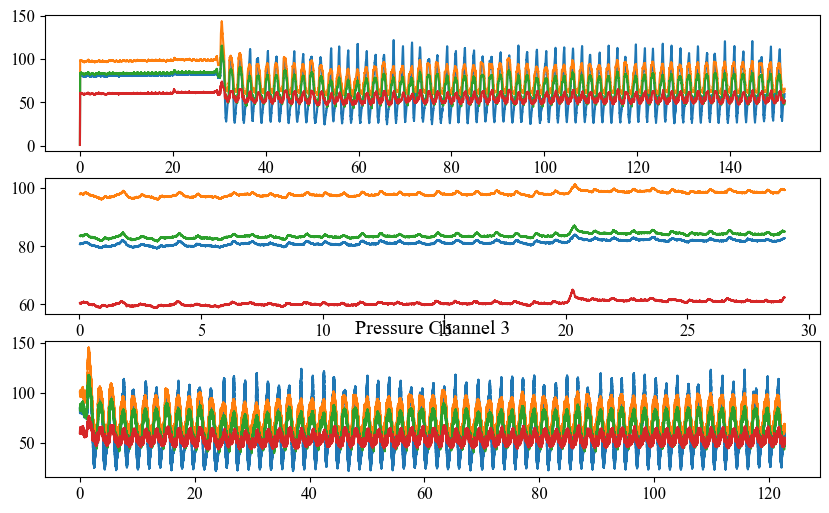

In [46]:



# # %% Первая часть: Создание массива C на основе условий
# def create_phase_array(A, B):
#     """
#     Создает массив фаз C на основе значений A и B
#     """
#     l = A.size
#     C = np.ones(l)  # создаем массив из единиц

#     # Первый цикл: определение фаз по условиям
#     for i in range(l):
#         if (A[i] > 0.7) and (B[i] < 0.7):
#             C[i] = 0  # heel strike
#         elif (A[i] >= 0.7) and (B[i] >= 0.7):
#             C[i] = 1  # toe landing
#         elif (A[i] < 0.7) and (B[i] > 0.7):
#             C[i] = 2  # heel rise
#         elif (A[i] < 0.7) and (B[i] < 0.7):
#             C[i] = 3  # toe-off

#     # Второй цикл: распространение фазы 3 (toe-off)
#     for i in range(l - 1):
#         if (C[i] == 3) and (C[i + 1] > 0):
#             C[i + 1] = 3

#     # Третий цикл: распространение фазы 1 (toe landing)
#     for i in range(l - 1):
#         if (C[i] == 1) and (C[i + 1] == 0):
#             C[i + 1] = 1

#     # Четвертый цикл: распространение фазы 2 (heel rise)
#     for i in range(l - 1):
#         if (C[i] == 2) and (C[i + 1] == 1):
#             C[i + 1] = 2

#     return C

# # Создаем массив фаз C
# C = create_phase_array(A, B)

# # Визуализация фаз
# plt.figure(figsize=(12, 6))
# plt.plot(time_trimmed, C, linewidth=1.5)

# # Настройки графика
# plt.grid(True, alpha=0.5)
# plt.gcf().set_facecolor('white')
# plt.xticks(np.arange(0, TIME_MEASURE-int(start_index*0.00025), 5))
# plt.yticks(np.arange(0, 5, 1))  # 0:1:4 в MATLAB -> 0,1,2,3,4
# plt.ylabel('Phase, 1')
# plt.xlabel('Time, s')

# # Добавляем текстовое описание
# txt = '0 - heel strike, 1 - toe landing, 2 - heel rise, 3 - toe-off'
# plt.text(0, 3.5, txt, fontsize=12)

# plt.xlim([0, TIME_MEASURE-int(start_index*0.00025)])
# plt.ylim([0, 4])
# plt.tight_layout()
# plt.show()
# print(data_array[0][0])
# # %% Обработка сигналов давления
# def process_pressure_signals(data_array, TIME_60, window_size=100):
#     """
#     Обработка сигналов давления с применением фильтра
#     """
#     N = 100
#     a = 1
#     b = (1/window_size) * np.ones(window_size)
#     data_array_filter =[]
#     data_array_0 =[]
#     data_array_cut = []
#     # # Обработка начального участка (10000:40000)
#     # ti_0 = Recording14[9999:40000, 1] - Recording14[9999, 1]  # MATLAB 1-based -> Python 0-based
#     for i in range(4):
#         data_array_filter.append(lfilter(b, a, data_array[i]))
#         data_array_0.append(data_array_filter[i][N:start_index]) #в начале маленькие значения после фильтрации
#         data_array_cut.append(data_array[i][start_index:])
#         plt.subplot(3, 1, 1)
#         plt.plot(TIME_60[:, 1], data_array_filter[i])
#         plt.subplot(3, 1, 2)
#         plt.plot(TIME_60[N:start_index, 1], data_array_0[i])
#         plt.subplot(3, 1, 3)
#         plt.plot(time_trimmed, data_array_cut[i])

     
#         plt.title(f'Pressure Channel {i}')
        
#     # # Применяем фильтр к каждому каналу давления
#     # IV_0 = lfilter(b, a, Pressure[0])    # канал 1
#     # GSV1_0 = lfilter(b, a, Pressure[1])  # канал 2  
#     # GSV2_0 = lfilter(b, a, Pressure[2])  # канал 3
#     # GSV3_0 = lfilter(b, a, Pressure[3])  # канал 4
    
#     # # Обрезаем данные (2000:6000 в MATLAB -> 1999:6000 в Python)
#     # ti_0 = ti_0[1999:6000]
#     # IV_0 = IV_0[1999:6000]
#     # GSV1_0 = GSV1_0[1999:6000] 
#     # GSV2_0 = GSV2_0[1999:6000]
#     # GSV3_0 = GSV3_0[1999:6000]
    
#     # # Обработка основного участка (30000:end)
#     # IV = lfilter(b, a, Pressure[0][29999:])    # канал 1
#     # GSV1 = lfilter(b, a, Pressure[1][29999:])  # канал 2
#     # GSV2 = lfilter(b, a, Pressure[2][29999:])  # канал 3
#     # GSV3 = lfilter(b, a, Pressure[3][29999:])  # канал 4
    
#     # # Обрезаем данные (86001:end)
#     # IV = IV[86000:]
#     # GSV1 = GSV1[86000:]
#     # GSV2 = GSV2[86000:]
#     # GSV3 = GSV3[86000:]
    
#     return (data_array_filter, data_array_0, data_array_cut)

# # Обрабатываем сигналы давления
# data_array_filter, data_array_0, data_array_cut = process_pressure_signals(data_array, TIME_60)
# # data_array_0 = [ti_0, IV_0, GSV1_0, GSV2_0, GSV3_0, IV, GSV1, GSV2, GSV3]
# # plt.figure(figsize=(12, 10))
# # for i in range(1,8):
# #     plt.subplot(7, 1, i + )
# #     plt.plot(data_array_0[0], data_array_0[i])
# #     plt.title(f'Pressure Channel {i}')

# # plt.tight_layout()
# # plt.show()
# # %% Анализ характеристик шага
# def analyze_gait_characteristics(C, ti, t_step=None):
#     """
#     Анализ характеристик походки на основе фазового массива C
#     """
#     if t_step is None:
#         t_step = ti[1] - ti[0]  # шаг по времени
        
#     # Вычисляем разницу C (аналог diff в MATLAB)
#     D = np.diff(C)  # prepend=C[0] для совпадения размеров
    
#     # Находим моменты начала шага (toe-off -> другая фаза)
#     st = np.where(D == -3)[0]  # переход от 3 к другой фазе

#     # Вычисляем характеристики шага
#     st_l = np.diff(st) * t_step  # длительность шагов
#     st_lc = np.diff(st) + 1      # количество отсчетов в шаге
#     step_count = len(st_l)       # количество шагов
#     # Статистика по длительности шагов
#     st_lm = np.mean(st_l)        # средняя длительность
#     st_lmax = np.max(st_l)       # максимальная длительность  
#     st_lstd = np.std(st_l)       # стандартное отклонение
    
#     # Находим фазы подъема пятки
#     st_phases = np.where(D == 1)[0]  # переход к фазе 1

#     # Вычисляем время подъема пятки
#     heel_rise = (st_phases[1::3][:step_count] - st[:step_count]) * t_step
    
#     heel_lm = np.mean(heel_rise)   # среднее время подъема
#     heel_lmax = np.max(heel_rise)  # максимальное время подъема
#     heel_lstd = np.std(heel_rise)  # стандартное отклонение
    
#     # Вычисляем время отрыва носка

    
#     toeoff = st_phases[2::3][:step_count]

#     toe_off = (st_phases[2::3][:step_count] - st[:step_count]) * t_step
    
#     toe_lm = np.mean(toe_off)    # среднее время отрыва
#     toe_lmax = np.max(toe_off)   # максимальное время отрыва
#     toe_lstd = np.std(toe_off)   # стандартное отклонение
    
#     return {
#         'step_duration': {'mean': st_lm, 'max': st_lmax, 'std': st_lstd},
#         'heel_rise': {'mean': heel_lm, 'max': heel_lmax, 'std': heel_lstd},
#         'toe_off': {'mean': toe_lm, 'max': toe_lmax, 'std': toe_lstd},
#         'step_count': step_count,
#         'step_indices': st,
#         'phase_transitions': st_phases
#     }

# # Анализируем характеристики походки
# gait_analysis = analyze_gait_characteristics(C, time_trimmed,0.00025)

# # Выводим результаты
# print("Анализ походки:")
# print(f"Количество шагов: {gait_analysis['step_count']}")
# print(f"Длительность шага: {gait_analysis['step_duration']['mean']:.3f} ± {gait_analysis['step_duration']['std']:.3f} с")
# print(f"Время подъема пятки: {gait_analysis['heel_rise']['mean']:.3f} ± {gait_analysis['heel_rise']['std']:.3f} с")
# print(f"Время отрыва носка: {gait_analysis['toe_off']['mean']:.3f} ± {gait_analysis['toe_off']['std']:.3f} с")


In [16]:
from scipy import signal

In [17]:
IV = data_array_cut[0]
GSV1 = data_array_cut[1]
GSV2 = data_array_cut[2]
GSV3 = data_array_cut[3]

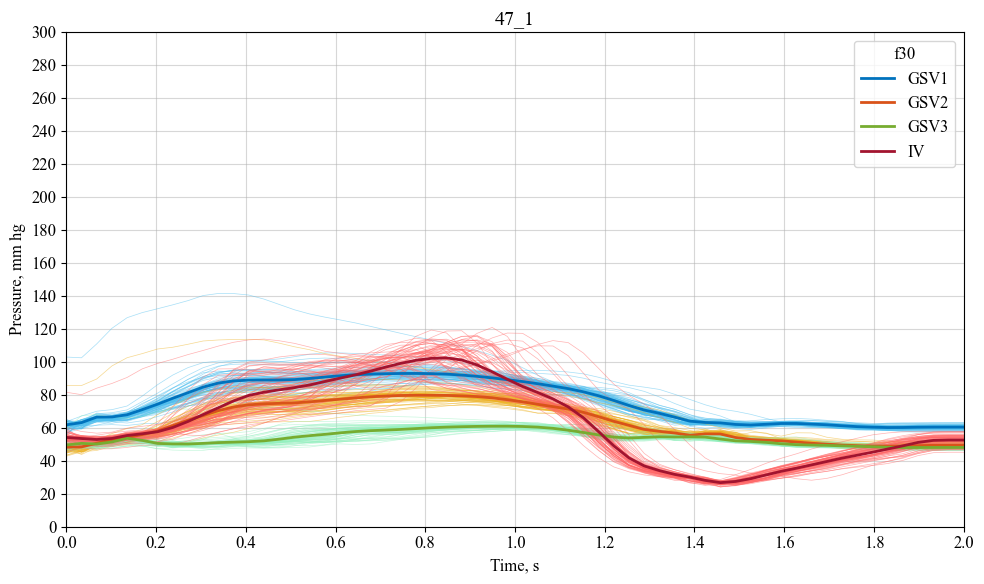

In [51]:
st = gait_analysis['step_indices']
st_lmax = gait_analysis['step_duration']['max']
t_step = 0.00025
st_l = np.diff(st) * t_step
max_length = int(st_lmax / t_step + 1)
step_count = gait_analysis['step_count']
IV_new = np.zeros((max_length, step_count))
GSV1_new = np.zeros((max_length, step_count))
GSV2_new = np.zeros((max_length, step_count))
GSV3_new = np.zeros((max_length, step_count))

for i in range(step_count):
    segment_length = st[i+1] - st[i]
    
    IV_new[:segment_length, i] = IV[st[i]:st[i+1]]
    GSV1_new[:segment_length, i] = GSV1[st[i]:st[i+1]]
    GSV2_new[:segment_length, i] = GSV2[st[i]:st[i+1]]
    GSV3_new[:segment_length, i] = GSV3[st[i]:st[i+1]]

# Децимация (понижение частоты дискретизации)
len_val = 2
t_step_n = len_val / 59
t_step_n_1 = len_val / st_l * t_step
r = np.floor(t_step_n / t_step_n_1).astype(int)

IV_new_d = np.zeros((60, step_count))
GSV1_new_d = np.zeros((60, step_count))
GSV2_new_d = np.zeros((60, step_count))
GSV3_new_d = np.zeros((60, step_count))
st_lc = np.diff(st) + 1      # количество отсчетов в шаге
for i in range(step_count):
    
    segment_length = int(st_lc[i])
    
    # Используем scipy.signal.decimate для децимации
    IV_new_d[:, i] = signal.decimate(IV_new[:segment_length, i], r[i])
    GSV1_new_d[:, i] = signal.decimate(GSV1_new[:segment_length, i], r[i])
    GSV2_new_d[:, i] = signal.decimate(GSV2_new[:segment_length, i], r[i])
    GSV3_new_d[:, i] = signal.decimate(GSV3_new[:segment_length, i], r[i])



# Вычисление средних значений по столбцам (аналог mean(..., 2) в MATLAB)
IV_new_d_mean = np.mean(IV_new_d, axis=1)
GSV1_new_d_mean = np.mean(GSV1_new_d, axis=1)
GSV2_new_d_mean = np.mean(GSV2_new_d, axis=1)
GSV3_new_d_mean = np.mean(GSV3_new_d, axis=1)

# Вычисление глобальных средних от средних значений
IV_new_d_mean_mean = np.mean(IV_new_d_mean)
IV_new_d_mean_max = np.max(IV_new_d_mean)
GSV1_new_d_mean_mean = np.mean(GSV1_new_d_mean)
GSV2_new_d_mean_mean = np.mean(GSV2_new_d_mean)
GSV3_new_d_mean_mean = np.mean(GSV3_new_d_mean)

# Вычисление стандартного отклонения по столбцам (аналог std(..., 0, 2) в MATLAB)
IV_new_d_sd = np.std(IV_new_d, axis=1, ddof=0)
GSV1_new_d_sd = np.std(GSV1_new_d, axis=1, ddof=0)
GSV2_new_d_sd = np.std(GSV2_new_d, axis=1, ddof=0)
GSV3_new_d_sd = np.std(GSV3_new_d, axis=1, ddof=0)


# Создаем фигуру
plt.figure(figsize=(10, 6))

# Определяем цвета (как в MATLAB)
colors = {
    'GSV1_light': [0.3010, 0.7450, 0.9330],
    'GSV1_dark': [0, 0.4470, 0.7410],
    'GSV2_light': [0.9290, 0.6940, 0.1250],
    'GSV2_dark': [0.8500, 0.3250, 0.0980],
    'GSV3_light': [0.58, 0.94, 0.75],
    'GSV3_dark': [0.4660, 0.6740, 0.1880],
    'IV_light': [1, 0.4, 0.4],
    'IV_dark': [0.6350, 0.0780, 0.1840]
}
x = np.arange(0, 2 + t_step_n, t_step_n)
# Рисуем все индивидуальные кривые (тонкие линии)
for i in range(GSV1_new_d.shape[1]):
    plt.plot(x, GSV1_new_d[:, i], color=colors['GSV1_light'], linewidth=0.5, alpha=0.5)

for i in range(GSV2_new_d.shape[1]):
    plt.plot(x, GSV2_new_d[:, i], color=colors['GSV2_light'], linewidth=0.5, alpha=0.5)

for i in range(GSV3_new_d.shape[1]):
    plt.plot(x, GSV3_new_d[:, i], color=colors['GSV3_light'], linewidth=0.5, alpha=0.5)

for i in range(IV_new_d.shape[1]):
    plt.plot(x, IV_new_d[:, i], color=colors['IV_light'], linewidth=0.5, alpha=0.5)

# Рисуем средние значения (толстые линии)
line1, = plt.plot(x, GSV1_new_d_mean, color=colors['GSV1_dark'], linewidth=2, label='GSV1')
line2, = plt.plot(x, GSV2_new_d_mean, color=colors['GSV2_dark'], linewidth=2, label='GSV2')
line3, = plt.plot(x, GSV3_new_d_mean, color=colors['GSV3_dark'], linewidth=2, label='GSV3')
line4, = plt.plot(x, IV_new_d_mean, color=colors['IV_dark'], linewidth=2, label='IV')

# Настройки графика
plt.grid(True, alpha=0.5)
plt.xticks(np.arange(0, 2.1, 0.2))
plt.yticks(np.arange(0, 301, 20))
plt.ylabel('Pressure, mm hg')
plt.xlabel('Time, s')
plt.title('47_1')
plt.xlim(0, 2)
plt.ylim(0, 300)

# Устанавливаем белый фон
plt.gcf().set_facecolor('white')

# Легенда
legend = plt.legend([line1, line2, line3, line4], ['GSV1', 'GSV2', 'GSV3', 'IV'], 
                   fontsize=12)
legend.set_title('f30', prop={'size': 12})

# Настройка шрифта
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12

# Убираем лишние поля (аналог TightInset в MATLAB)
plt.tight_layout()

plt.show()

In [19]:
from scipy.integrate import trapezoid

Первый минимум: индекс=2, значение=52.93414979235936
Ближайшее к 52.93414979235936: значение 49.04688869574061 на индексе 36
Площадь под графиком: 31.155949822598423
57.69107161404016 49.04688869574061 41.71161491141356


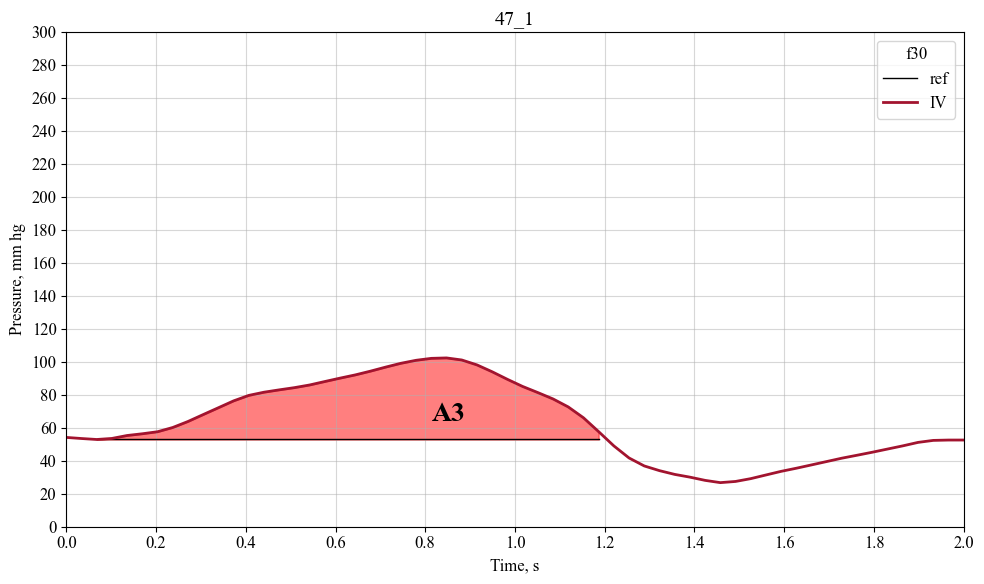

In [53]:
def find_max(data):
    """
    Находит первый глобальный минимум в данных
    """
    max_index = np.argmax(data)
    max_value = data[max_index]
    return max_index, max_value
    
def find_first_local_minimum(data, order=1):
    max_index, a = find_max(data)
    min_index = np.argmin(data[0:max_index])
    min_value = data[min_index]
    # derivative = np.gradient(data[0:max_index])
    # min_index, min_value = None, None
    # # Ищем точки, где производная меняет знак с - на +
    # for i in range(1, len(derivative)-1):
    #     if derivative[i-1] < 0 and derivative[i] >= 0:
    #         min_index, min_value = i, data[i]
    #         break
    # if (min_index == None) and (min_value == None):
    #     min_index = np.argmin(data[0:max_index])
    #     min_value = data[min_index]
    return min_index, min_value

def find_nearest_index(array, value):
    """Находит индекс ближайшего значения"""
    array = np.asarray(array)
    # idx = np.argmin(np.abs(array - value))
    idx = np.where(array < value)[0][0]
    return idx, array[idx]

IV_mean_first_min_idx, IV_mean_first_min_val = find_first_local_minimum(IV_new_d_mean)
print(f"Первый минимум: индекс={IV_mean_first_min_idx}, значение={IV_mean_first_min_val}")

IV_mean_first_min_val_axes = np.full_like(x, IV_mean_first_min_val)
nearest_idx, nearest_val = find_nearest_index(IV_new_d_mean, IV_mean_first_min_val)
print(f"Ближайшее к {IV_mean_first_min_val}: значение {nearest_val} на индексе {nearest_idx}")

line3, = plt.plot(x[IV_mean_first_min_idx:nearest_idx], IV_mean_first_min_val_axes[IV_mean_first_min_idx:nearest_idx], color='black', linewidth=1, label='IV_min')
line4, = plt.plot(x, IV_new_d_mean, color=colors['IV_dark'], linewidth=2, label='IV')


area = trapezoid(IV_new_d_mean[IV_mean_first_min_idx:nearest_idx]-IV_mean_first_min_val, x[IV_mean_first_min_idx:nearest_idx])
print(f"Площадь под графиком: {area}")

d,IV_max_val = find_max(IV_new_d_mean)
print(IV_new_d_mean[35],IV_new_d_mean[36], IV_new_d_mean[37])
# Настройки графика
plt.grid(True, alpha=0.5)
plt.xticks(np.arange(0, 2.1, 0.2))
plt.yticks(np.arange(0, 301, 20))
plt.ylabel('Pressure, mm hg')
plt.xlabel('Time, s')
plt.title('47_1')
plt.xlim(0, 2)
plt.ylim(0, 300)

# Устанавливаем белый фон
plt.gcf().set_facecolor('white')

# Легенда
legend = plt.legend([line3, line4], ['ref', 'IV'], 
                   fontsize=12)
legend.set_title('f30', prop={'size': 12})

# Настройка шрифта
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12
plt.fill_between(x[IV_mean_first_min_idx:nearest_idx], IV_mean_first_min_val, IV_new_d_mean[IV_mean_first_min_idx:nearest_idx], alpha=0.5, color ="red")
plt.text(x[d-1], (IV_max_val+IV_mean_first_min_val/2)/2, 'A3', fontsize=20, fontweight='bold')
# Убираем лишние поля (аналог TightInset в MATLAB)
plt.tight_layout()

plt.show()

Первый минимум: индекс=1, значение=53.877154540022815
Ближайшее к 53.877154540022815: значение 48.76920870630589 на индексе 36
Площадь под графиком: 32.60904752767985


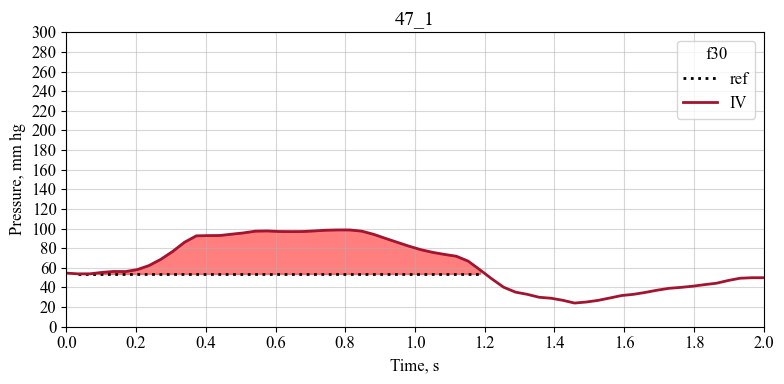

[20.26462824 34.51828352 33.08956219 32.05777591 31.57189598 32.94529142
 33.00357153 33.24876992 31.42119011 33.1334667  35.85506243 34.04970243
 33.21855684 31.69305916 33.02147793 28.69994397 30.92668974 32.61077078
 35.14987389 32.32015874 28.91674807 32.5655077  28.61105682 32.60904753
 31.80969649 30.91891191 30.56215956 31.73416502 30.85886488 34.66086025
 34.84242738 30.6377423  32.40478202 28.74688599 32.26703788 31.83713909
 32.50093971 31.78707014 32.50898152 32.93715837 30.6025777  32.03935427
 31.71752372 33.240934   32.29786213 31.82731044 30.5712948  32.45572333
 31.10758655 28.35816308 31.50701723 34.22667873 33.45649929 31.06659412
 31.97109488 30.55319874 30.42766345 32.15797424 30.9286041  30.97650778
 31.75251475 34.09086854 32.40204218]


In [56]:
IV_area_steps = np.zeros(IV_new_d.shape[1])

plt.figure(figsize=(8, 4))
#для других шагов IV
for i in range(IV_new_d.shape[1]):
    
    IV_first_min_idx, IV_first_min_val = find_first_local_minimum(IV_new_d[:, i])

    IV_first_min_val_axes = np.full_like(x, IV_first_min_val)
    nearest_idx, nearest_val = find_nearest_index(IV_new_d[: , i], IV_first_min_val)
    
    IV_area_steps[i] = trapezoid(IV_new_d[IV_first_min_idx:nearest_idx, i]-IV_first_min_val, x[IV_first_min_idx:nearest_idx])
    if i==23:
        
        print(f"Первый минимум: индекс={IV_first_min_idx}, значение={IV_first_min_val}")
        print(f"Ближайшее к {IV_first_min_val}: значение {nearest_val} на индексе {nearest_idx}")

        line3, = plt.plot(x[IV_first_min_idx:nearest_idx], IV_first_min_val_axes[IV_first_min_idx:nearest_idx], color='black', linewidth=2, label='IV_min', linestyle='dotted' )
        line4, = plt.plot(x, IV_new_d[:, i], color=colors['IV_dark'], linewidth=2, label='IV')
        
        
        area = trapezoid(IV_new_d[IV_first_min_idx:nearest_idx, i]-IV_first_min_val, x[IV_first_min_idx:nearest_idx])
        print(f"Площадь под графиком: {area}")
        
        d,IV_max_val = find_max(IV_new_d[:, i])
        
        
        # Настройки графика
        plt.grid(True, alpha=0.5)
        plt.xticks(np.arange(0, 2.1, 0.2))
        plt.yticks(np.arange(0, 301, 20))
        plt.ylabel('Pressure, mm hg')
        plt.xlabel('Time, s')
        plt.title('47_1')
        plt.xlim(0, 2)
        plt.ylim(0, 300)
        
        # Устанавливаем белый фон
        plt.gcf().set_facecolor('white')
        
        # Легенда
        legend = plt.legend([line3, line4], ['ref', 'IV'], 
                           fontsize=12)
        legend.set_title('f30', prop={'size': 12})

        # Настройка шрифта
        plt.rcParams['font.family'] = 'Times New Roman'
        plt.rcParams['font.size'] = 12
        plt.fill_between(x[IV_first_min_idx:nearest_idx], IV_first_min_val, IV_new_d[IV_first_min_idx:nearest_idx,i], alpha=0.5, color ="red")
        # plt.text(x[d-1], (IV_max_val+IV_first_min_val/2)/2, 'A3', fontsize=20, fontweight='bold')
        # Убираем лишние поля (аналог TightInset в MATLAB)
        # plt.annotate('A3', xy=(x[d-1]+5, (IV_max_val-IV_first_min_val/2)),  xycoords='data',
        #     xytext=(0, 10), textcoords='data',
        #     arrowprops=dict(facecolor='black', shrink=0.05))
        plt.tight_layout()
        
        plt.show()  
print(IV_area_steps)

Площадь под графиком: 111.23038099644748
Площадь под графиком: 73.4019079870129
Площадь под графиком: 38.618268986294076


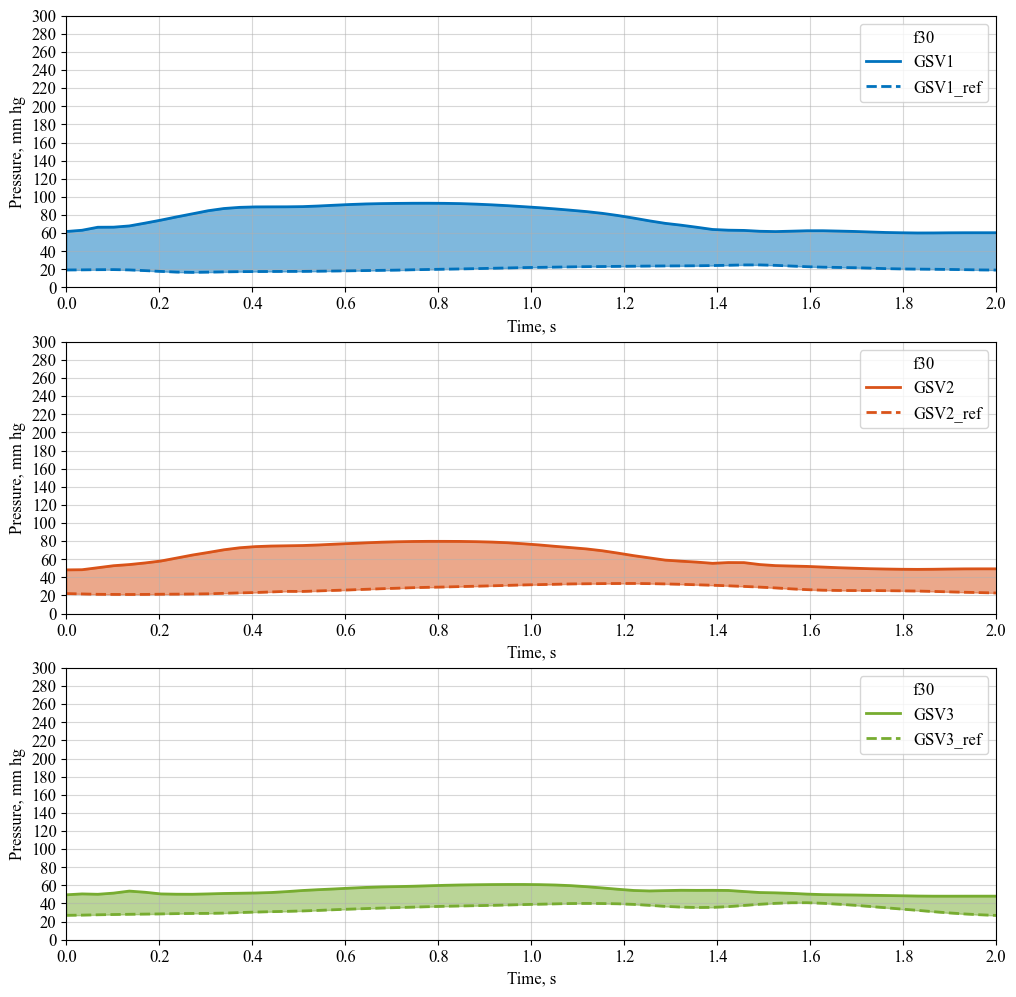

In [57]:
# Функция для чтения данных с листа Excel
def read_sheet_data(file_path, sheet_name, data_range="A1:I60"):
    """
    Читает данные с указанного листа Excel файла
    """
    # Читаем только нужный диапазон
    data = pd.read_excel(
        file_path, 
        sheet_name=sheet_name,
        header=None,  # Без заголовков, как в MATLAB
        usecols="A:I",  # Столбцы A-I (9 столбцов)
        nrows=60  # Первые 60 строк
    )
    
    # Преобразуем в numpy array
    data_array = data.values
    
    # Вычисляем среднее по столбцам [1:5,8,9] в MATLAB -> [0,1,2,3,4,7,8] в Python
    mean_values = np.mean(data_array[:, [0, 1, 2, 3, 4, 7, 8]], axis=1)
    
    return mean_values, data_array

# Основной код
file_path =r"30.xlsx"

# Чтение данных с листа GSV1
GSV1_m, S1_array = read_sheet_data(file_path, "GSV1")

# Чтение данных с листа GSV2  
GSV2_m, S2_array = read_sheet_data(file_path, "GSV2")

# Чтение данных с листа GSV3
GSV3_m, S3_array = read_sheet_data(file_path, "GSV3")

# print(f"GSV1_m: {len(GSV1_m)} значений")
# print(f"GSV2_m: {len(GSV2_m)} значений") 
# print(f"GSV3_m: {len(GSV3_m)} значений")


GSV1_area = trapezoid(GSV1_new_d_mean - GSV1_m, x)
print(f"Площадь под графиком: {GSV1_area}")
GSV2_area = trapezoid(GSV2_new_d_mean - GSV2_m, x)
print(f"Площадь под графиком: {GSV2_area}")
GSV3_area = trapezoid(GSV3_new_d_mean - GSV3_m, x)
print(f"Площадь под графиком: {GSV3_area}")



plt.figure(figsize=(12, 12))
plt.subplot(3,1,1)
line1, = plt.plot(x, GSV1_new_d_mean, color=colors['GSV1_dark'], linewidth=2, label='GSV1')
line1_2, = plt.plot(x, GSV1_m, color=colors['GSV1_dark'], linewidth=2, label='GSV1_ref', linestyle='dashed' )
plt.fill_between(x, GSV1_m ,GSV1_new_d_mean , alpha=0.5, color =colors['GSV1_dark'])
# Настройки графика
plt.grid(True, alpha=0.5)
plt.xticks(np.arange(0, 2.1, 0.2))
plt.yticks(np.arange(0, 301, 20))
plt.ylabel('Pressure, mm hg')
plt.xlabel('Time, s')

plt.xlim(0, 2)
plt.ylim(0, 300)

# Устанавливаем белый фон
plt.gcf().set_facecolor('white')

# Легенда
legend = plt.legend()
legend.set_title('f30', prop={'size': 12})

# Настройка шрифта
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12
plt.subplot(3,1,2)
line2, = plt.plot(x, GSV2_new_d_mean, color=colors['GSV2_dark'], linewidth=2, label='GSV2')
line2_2, = plt.plot(x, GSV2_m, color=colors['GSV2_dark'], linewidth=2, label='GSV2_ref',  linestyle='dashed')
plt.fill_between(x, GSV2_m ,GSV2_new_d_mean , alpha=0.5, color =colors['GSV2_dark'])
# Настройки графика
plt.grid(True, alpha=0.5)
plt.xticks(np.arange(0, 2.1, 0.2))
plt.yticks(np.arange(0, 301, 20))
plt.ylabel('Pressure, mm hg')
plt.xlabel('Time, s')

plt.xlim(0, 2)
plt.ylim(0, 300)

# Устанавливаем белый фон
plt.gcf().set_facecolor('white')

# Легенда
legend = plt.legend()
legend.set_title('f30', prop={'size': 12})

# Настройка шрифта
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12
plt.subplot(3,1,3)
line3, = plt.plot(x, GSV3_new_d_mean, color=colors['GSV3_dark'], linewidth=2, label='GSV3')
line3_2, = plt.plot(x, GSV3_m, color=colors['GSV3_dark'], linewidth=2, label='GSV3_ref',  linestyle='dashed')
plt.fill_between(x, GSV3_m, GSV3_new_d_mean, alpha=0.5, color =colors['GSV3_dark'])
# line4, = plt.plot(x, IV_new_d_mean, color=colors['IV_dark'], linewidth=2, label='IV')

# Настройки графика
plt.grid(True, alpha=0.5)
plt.xticks(np.arange(0, 2.1, 0.2))
plt.yticks(np.arange(0, 301, 20))
plt.ylabel('Pressure, mm hg')
plt.xlabel('Time, s')

plt.xlim(0, 2)
plt.ylim(0, 300)

# Устанавливаем белый фон
plt.gcf().set_facecolor('white')

# Легенда
legend = plt.legend()
legend.set_title('f30', prop={'size': 12})

# Настройка шрифта
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12


Площадь GSV1: 150.85293114963673
Площадь GSV2: 105.57655447416546
Площадь GSV3: 53.599665276196866
[150.85293115 120.14635719 119.98410348 109.45794406 109.61593802
 110.54068326 111.82843429 117.00970379 109.93146394 109.96621303
 111.84075593 106.54234959 105.92677529 105.31239758 102.55980254
 101.43214339 106.0891863  109.843353   111.10623568 107.16930037
 109.51221407 107.86693602 111.39434883 112.47739025 111.82521057
 109.54971119 106.37762884 109.57963444 108.66692089 114.61377431
 111.8896092  112.4502132  114.6167416  108.33669875 109.09750918
 106.49709677 109.27953774 110.79907641 111.40964943 113.19637969
 110.33837003 111.41240191 109.35305025 109.57389483 111.74903229
 112.04514368 109.27292262 111.45424066 112.13935731 109.80032477
 111.22113467 111.00846961 111.23180165 110.84377846 111.65983012
 111.62438649 111.66731722 112.31187614 111.93428116 111.27472167
 112.66605346 116.30424295 110.03501757]
[105.57655447  81.58105702  81.15767962  72.33477018  72.38906115
  

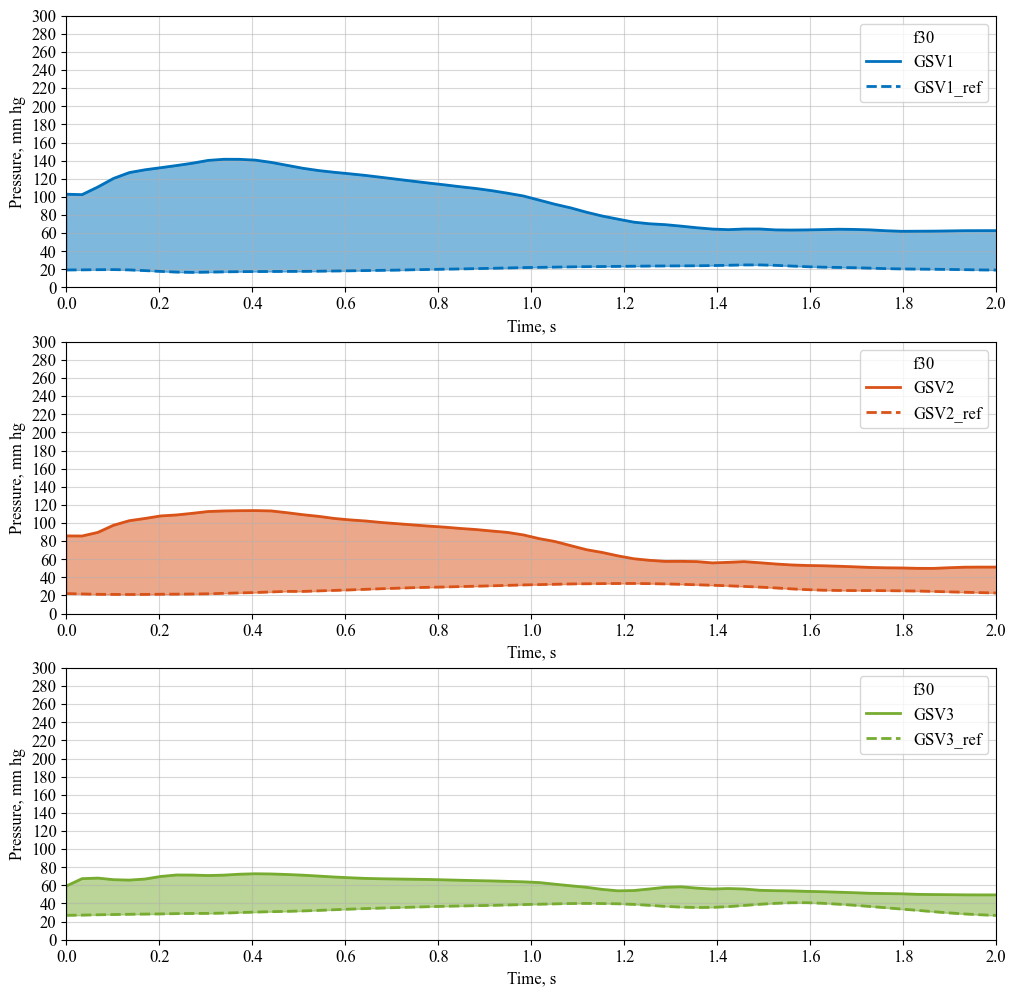

In [58]:
GSV1_area_steps = np.zeros(GSV1_new_d.shape[1])
GSV2_area_steps = np.zeros(GSV2_new_d.shape[1])
GSV3_area_steps = np.zeros(GSV3_new_d.shape[1])

#для других шагов IV
for i in range(GSV1_new_d.shape[1]):
    GSV1_area_steps[i] = trapezoid(GSV1_new_d[:, i]-GSV1_m, x)
    GSV2_area_steps[i] = trapezoid(GSV2_new_d[:, i]-GSV2_m, x)
    GSV3_area_steps[i] = trapezoid(GSV3_new_d[:, i]-GSV3_m, x)
    if i == 0:
        print(f"Площадь GSV1: {GSV1_area_steps[i]}")
        print(f"Площадь GSV2: {GSV2_area_steps[i]}")
        print(f"Площадь GSV3: {GSV3_area_steps[i]}")
        plt.figure(figsize=(12, 12))
        plt.subplot(3,1,1)
        line1, = plt.plot(x, GSV1_new_d[:, i], color=colors['GSV1_dark'], linewidth=2, label='GSV1')
        line1_2, = plt.plot(x, GSV1_m, color=colors['GSV1_dark'], linewidth=2, label='GSV1_ref', linestyle='dashed' )
        plt.fill_between(x, GSV1_m ,GSV1_new_d[:, i] , alpha=0.5, color =colors['GSV1_dark'])
        # Настройки графика
        plt.grid(True, alpha=0.5)
        plt.xticks(np.arange(0, 2.1, 0.2))
        plt.yticks(np.arange(0, 301, 20))
        plt.ylabel('Pressure, mm hg')
        plt.xlabel('Time, s')
        
        plt.xlim(0, 2)
        plt.ylim(0, 300)
        
        # Устанавливаем белый фон
        plt.gcf().set_facecolor('white')
        
        # Легенда
        legend = plt.legend()
        legend.set_title('f30', prop={'size': 12})
        
        # Настройка шрифта
        plt.rcParams['font.family'] = 'Times New Roman'
        plt.rcParams['font.size'] = 12
        plt.subplot(3,1,2)
        line2, = plt.plot(x, GSV2_new_d[:, i], color=colors['GSV2_dark'], linewidth=2, label='GSV2')
        line2_2, = plt.plot(x, GSV2_m, color=colors['GSV2_dark'], linewidth=2, label='GSV2_ref',  linestyle='dashed')
        plt.fill_between(x, GSV2_m ,GSV2_new_d[:, i] , alpha=0.5, color =colors['GSV2_dark'])
        # Настройки графика
        plt.grid(True, alpha=0.5)
        plt.xticks(np.arange(0, 2.1, 0.2))
        plt.yticks(np.arange(0, 301, 20))
        plt.ylabel('Pressure, mm hg')
        plt.xlabel('Time, s')
        
        plt.xlim(0, 2)
        plt.ylim(0, 300)
        
        # Устанавливаем белый фон
        plt.gcf().set_facecolor('white')
        
        # Легенда
        legend = plt.legend()
        legend.set_title('f30', prop={'size': 12})
        
        # Настройка шрифта
        plt.rcParams['font.family'] = 'Times New Roman'
        plt.rcParams['font.size'] = 12
        plt.subplot(3,1,3)
        line3, = plt.plot(x, GSV3_new_d[:, i], color=colors['GSV3_dark'], linewidth=2, label='GSV3')
        line3_2, = plt.plot(x, GSV3_m, color=colors['GSV3_dark'], linewidth=2, label='GSV3_ref',  linestyle='dashed')
        plt.fill_between(x, GSV3_m, GSV3_new_d[:, i], alpha=0.5, color =colors['GSV3_dark'])
        # line4, = plt.plot(x, IV_new_d[:, i], color=colors['IV_dark'], linewidth=2, label='IV')
        
        # Настройки графика
        plt.grid(True, alpha=0.5)
        plt.xticks(np.arange(0, 2.1, 0.2))
        plt.yticks(np.arange(0, 301, 20))
        plt.ylabel('Pressure, mm hg')
        plt.xlabel('Time, s')
        
        plt.xlim(0, 2)
        plt.ylim(0, 300)
        
        # Устанавливаем белый фон
        plt.gcf().set_facecolor('white')
        
        # Легенда
        legend = plt.legend()
        legend.set_title('f30', prop={'size': 12})
        
        # Настройка шрифта
        plt.rcParams['font.family'] = 'Times New Roman'
        plt.rcParams['font.size'] = 12

        
        

   
print(GSV1_area_steps)
print(GSV2_area_steps)
print(GSV3_area_steps)

In [93]:
GSV1_ref_derivative = abs(np.gradient(GSV1_m))
GSV2_ref_derivative = abs(np.gradient(GSV2_m))
GSV3_ref_derivative = abs(np.gradient(GSV3_m))
A_dyn_GSV1_ref = trapezoid(GSV1_ref_derivative, x)
A_dyn_GSV2_ref = trapezoid(GSV2_ref_derivative, x)
A_dyn_GSV3_ref = trapezoid(GSV3_ref_derivative, x)

# A_dyn_GSV1 = np.zeros(GSV1_new_d.shape[1])
# A_dyn_GSV2 = np.zeros(GSV2_new_d.shape[1])
# A_dyn_GSV3 = np.zeros(GSV3_new_d.shape[1])

K_osc_GSV1 = np.zeros(GSV1_new_d.shape[1])
K_osc_GSV2 = np.zeros(GSV2_new_d.shape[1])
K_osc_GSV3 = np.zeros(GSV3_new_d.shape[1])

for i in range(GSV1_new_d.shape[1]):
    
    GSV1_derivative = abs(np.gradient(GSV1_new_d[:, i]))
    GSV2_derivative = abs(np.gradient(GSV2_new_d[:, i]))
    GSV3_derivative = abs(np.gradient(GSV3_new_d[:, i]))

    A_dyn_GSV1 = trapezoid(GSV1_derivative, x)
    A_dyn_GSV2 = trapezoid(GSV2_derivative, x)
    A_dyn_GSV3 = trapezoid(GSV3_derivative, x)

    K_osc_GSV1[i] = A_dyn_GSV1/A_dyn_GSV1_ref
    K_osc_GSV2[i] = A_dyn_GSV2/A_dyn_GSV2_ref
    K_osc_GSV3[i] = A_dyn_GSV3/A_dyn_GSV3_ref
    


Text(0.5, 0, 'Step Index')

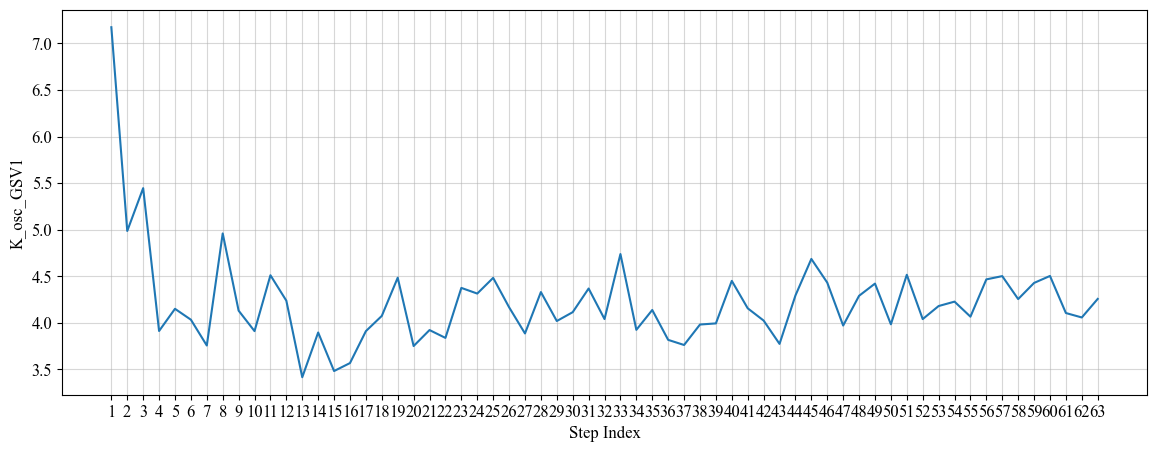

In [94]:
plt.figure(figsize=(14, 5))
st = gait_analysis['step_count']
step = np.arange(1,st+1)
plt.plot(step,  K_osc_GSV1)

plt.grid(True, alpha=0.5)
plt.xticks(np.arange(1, st+1, 1))
plt.ylabel('K_osc_GSV1')
plt.xlabel('Step Index')



In [760]:

# """
# Находит интервалы, где данные стабильны (колебания меньше порога).

# Параметры:
# - data: список или numpy.array с данными.
# - threshold: максимальное допустимое изменение между соседними точками.
# - min_length: минимальная длина интервала для признания стабильности.

# Возвращает:
# - Список кортежей (start, end) для каждого стабильного интервала.
# """
# data = K_osc_GSV1
# df = pd.DataFrame(K_osc_GSV1, columns=['0'])

# length = st
# intervals = []
# start = 0
# end = 0
# k = 0
# for i in range(st-1):
#     threshold = 2*df.loc[i-k:i+1, '0'].std()
#     if abs(data[i+1] - data[i]) <= threshold:
#         k+=1
#         start = i-k
#         end = i+1
#     else:
#         intervals.append((start, end))
#         k=0
# # print(intervals)    
# # i = 0
# # y = 0
# # k = 0
# # end = 0
# # start = 0
# # while i <= length-3:
# #     threshold = 2*np.std(data[i:i+y+3])
# #     while (i+y+3<length) and (abs(data[i+y+1] - data[i]) <= threshold) and (abs(data[i+y+2] - data[i+y+1]) <= threshold) and (abs(data[i+y+3] - data[i+y+1]) <= threshold)  :
# #         end = i+y+3
# #         start = i
# #         y+=1
# #         threshold = 2*np.std(data[i:i+y+3])
        
# #     intervals.append((start, end))

#     # if ( end - start > 0):
#     #     intervals.append((start, end))
    
# #     if (i + y < length):
# #         i =i+y+3
# #     else:
# #         i+=1
# #     y=0



0.5134199430145441


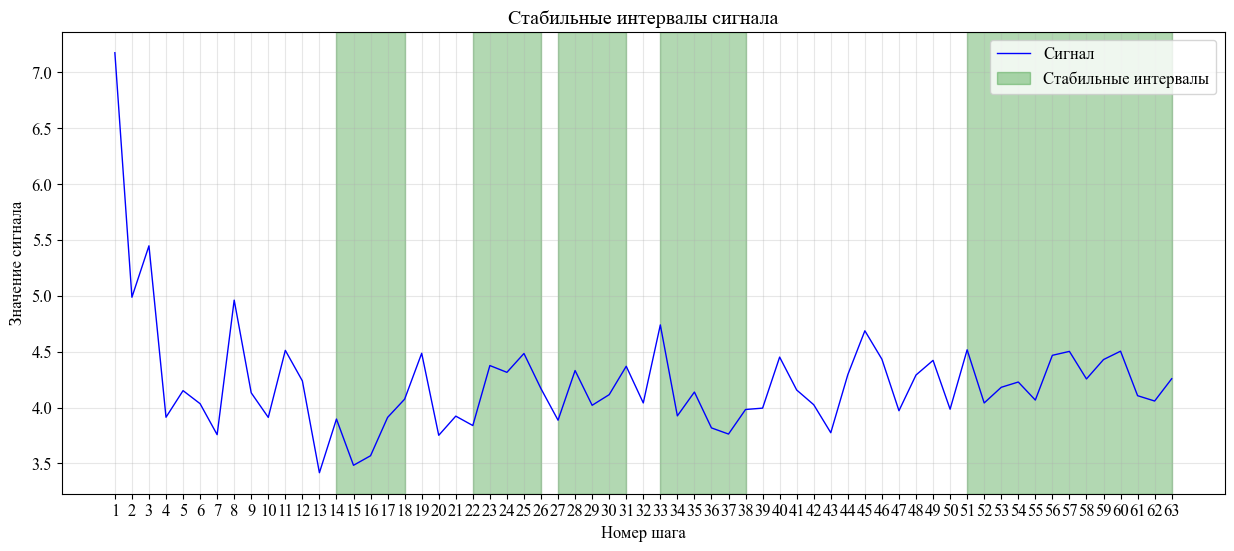

0.5134199430145441
Метод сравнения соседних точек:
  Интервал [14:18], длина: 5, отклонение: 1.002
  Интервал [22:26], длина: 5, отклонение: 0.597
  Интервал [27:31], длина: 5, отклонение: 0.349
  Интервал [33:38], длина: 6, отклонение: 0.376
  Интервал [51:63], длина: 13, отклонение: 0.463

Метод глобального сравнения:
  Интервал [27:31], длина: 5, отклонение: 0.349
  Интервал [33:38], длина: 6, отклонение: 0.376
  Интервал [55:60], длина: 6, отклонение: 0.398


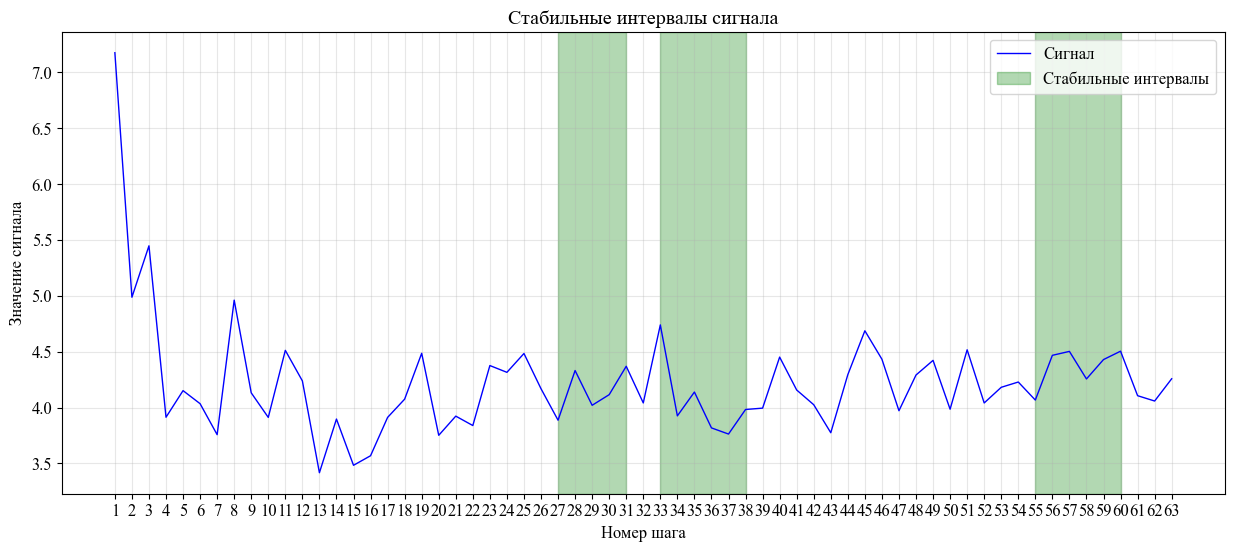

In [178]:
import numpy as np
from typing import List, Tuple

def find_stable_intervals_advanced(data: List[float], 
                                 threshold_ratio: float = 0.1,
                                 min_interval_length: int = 3,
                                 method: str = 'neighbors') -> List[Tuple[int, int]]:
    """
    Расширенная версия поиска стабильных интервалов.
    
    Параметры:
    - data: данные сигнала
    - threshold_ratio: коэффициент от стандартного отклонения
    - min_interval_length: минимальная длина интервала
    - method: метод определения стабильности
        'neighbors' - сравнение соседних точек
        'global' - сравнение всех точек в интервале
    """
    if len(data) < min_interval_length:
        return []
    
    # data = np.array(data)
    std = np.std(data)
    print(std)
    threshold = std * threshold_ratio
    
    intervals = []
    n = len(data)
    
    if method == 'neighbors':
        # Метод сравнения соседних точек
        start = 0
        for i in range(1, n):
            if abs(data[i] - data[i-1]) > threshold:
                if i - start >= min_interval_length:
                    intervals.append((start, i-1))
                start = i
        # Последний интервал
        if n - start >= min_interval_length:
            intervals.append((start, n))
            
    elif method == 'global':
        # Метод сравнения всех точек в интервале
        i = 0
        while i < n - min_interval_length + 1:
            j = i + min_interval_length - 1
            found_interval = False
            
            while j <= n:
                segment = data[i:j+1]
                if np.max(segment) - np.min(segment) <= threshold:
                    j += 1
                    found_interval = True
                else:
                    break
            
            if found_interval and j - i >= min_interval_length:
                end = j - 1 if j > i else i
                intervals.append((i, end))
                i = end + 1
            else:
                i += 1
    
    return intervals



def plot_intervals(data, intervals):
    """Визуализация сигнала и найденных интервалов"""
    plt.figure(figsize=(15, 6))
    plt.plot(np.arange(1, st+1, 1),data, 'b-', label='Сигнал', linewidth=1)
    
    for i, (start, end) in enumerate(intervals):
        plt.axvspan(start, end, alpha=0.3, color='green', 
                   label='Стабильные интервалы' if i == 0 else "")
        
    plt.xlabel('Номер шага')
    plt.ylabel('Значение сигнала')
    plt.xticks(np.arange(1, st+1, 1))
    plt.title('Стабильные интервалы сигнала')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()


    # Генерируем тестовые данные

    
    # Поиск интервалов разными методами
intervals_neighbors_GSV1 = find_stable_intervals_advanced(
K_osc_GSV1, threshold_ratio=0.8, min_interval_length=5, method='neighbors')
plot_intervals( K_osc_GSV1, intervals_neighbors_GSV1)

intervals_global_GSV1 = find_stable_intervals_advanced(
     K_osc_GSV1, threshold_ratio=0.8, min_interval_length=5, method='global')

print("Метод сравнения соседних точек:")
for start, end in intervals_neighbors_GSV1:
    segment =  K_osc_GSV1[start:end+1]
    print(f"  Интервал [{start}:{end}], длина: {end-start+1}, "
          f"отклонение: {np.max(segment)-np.min(segment):.3f}")

print("\nМетод глобального сравнения:")
for start, end in intervals_global_GSV1:
    segment =  K_osc_GSV1[start:end+1]
    print(f"  Интервал [{start}:{end}], длина: {end-start+1}, "
          f"отклонение: {np.max(segment)-np.min(segment):.3f}")

# Визуализация
plot_intervals( K_osc_GSV1, intervals_global_GSV1)



0.2507667104934984


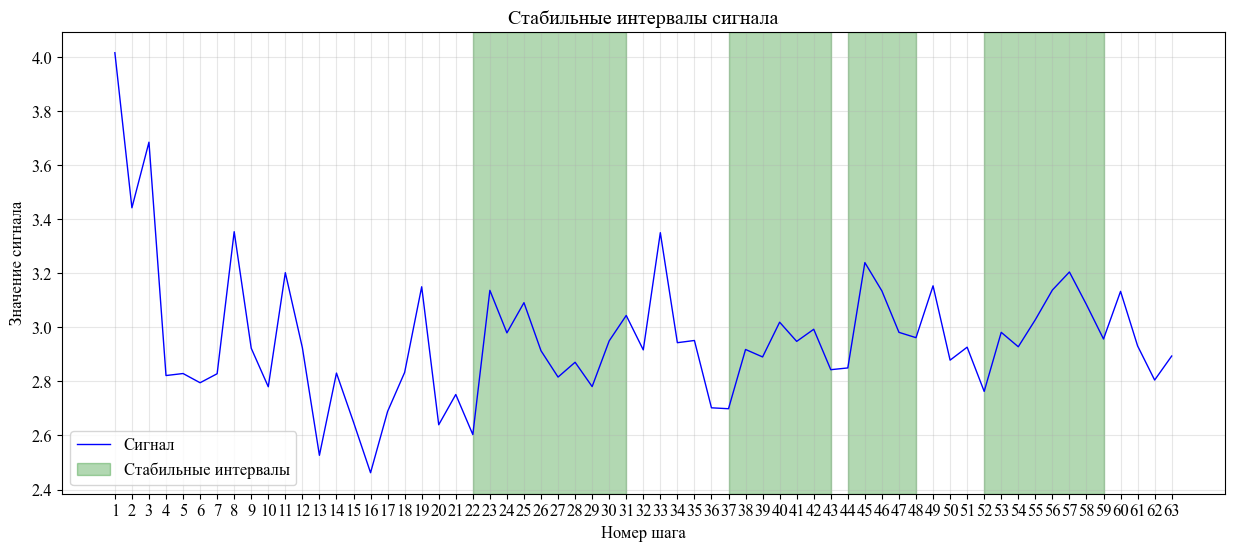

0.2507667104934984
Метод сравнения соседних точек:
  Интервал [22:31], длина: 10, отклонение: 0.356
  Интервал [37:43], длина: 7, отклонение: 0.176
  Интервал [44:48], длина: 5, отклонение: 0.278
  Интервал [52:59], длина: 8, отклонение: 0.277

Метод глобального сравнения:
  Интервал [25:29], длина: 5, отклонение: 0.169
  Интервал [37:43], длина: 7, отклонение: 0.176


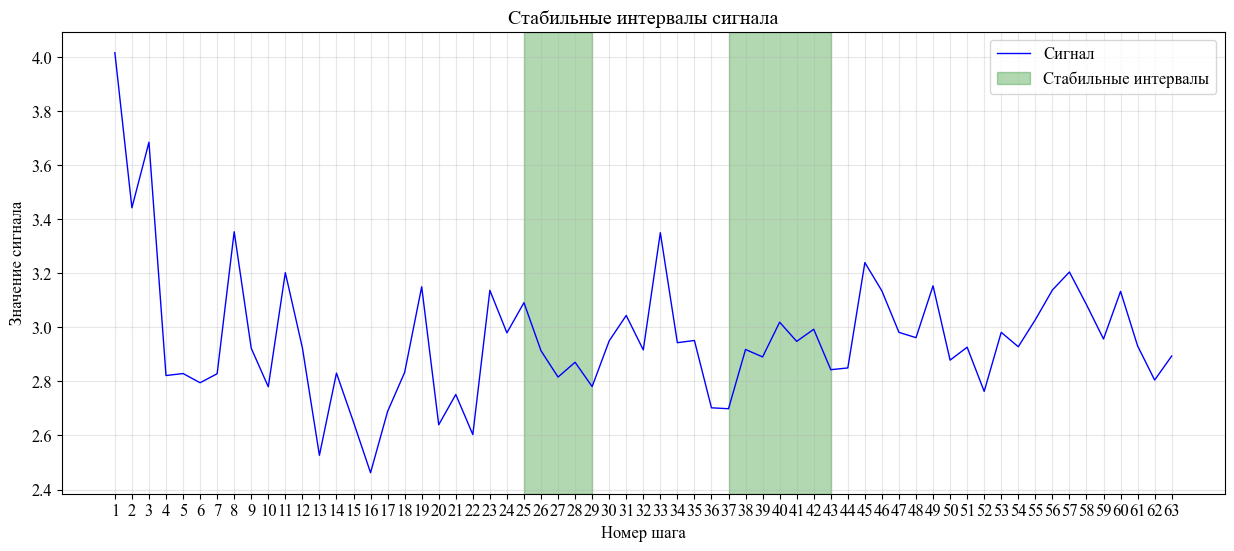

In [180]:


def find_stable_intervals_advanced(data: List[float], 
                                 threshold_ratio: float = 0.1,
                                 min_interval_length: int = 3,
                                 method: str = 'neighbors') -> List[Tuple[int, int]]:
    """
    Расширенная версия поиска стабильных интервалов.
    
    Параметры:
    - data: данные сигнала
    - threshold_ratio: коэффициент от стандартного отклонения
    - min_interval_length: минимальная длина интервала
    - method: метод определения стабильности
        'neighbors' - сравнение соседних точек
        'global' - сравнение всех точек в интервале
    """
    if len(data) < min_interval_length:
        return []
    
    # data = np.array(data)
    std = np.std(data)
    print(std)
    threshold = std * threshold_ratio
    
    intervals = []
    n = len(data)
    
    if method == 'neighbors':
        # Метод сравнения соседних точек
        start = 0
        for i in range(1, n):
            if abs(data[i] - data[i-1]) > threshold:
                if i - start >= min_interval_length:
                    intervals.append((start, i-1))
                start = i
        # Последний интервал
        if n - start >= min_interval_length:
            intervals.append((start, n))
            
    elif method == 'global':
        # Метод сравнения всех точек в интервале
        i = 0
        while i < n - min_interval_length + 1:
            j = i + min_interval_length - 1
            found_interval = False
            
            while j <= n:
                segment = data[i:j+1]
                if np.max(segment) - np.min(segment) <= threshold:
                    j += 1
                    found_interval = True
                else:
                    break
            
            if found_interval and j - i >= min_interval_length:
                end = j - 1 if j > i else i
                intervals.append((i, end))
                i = end + 1
            else:
                i += 1
    
    return intervals



def plot_intervals(data, intervals):
    """Визуализация сигнала и найденных интервалов"""
    plt.figure(figsize=(15, 6))
    plt.plot(np.arange(1, st+1, 1),data, 'b-', label='Сигнал', linewidth=1)
    
    for i, (start, end) in enumerate(intervals):
        plt.axvspan(start, end, alpha=0.3, color='green', 
                   label='Стабильные интервалы' if i == 0 else "")
        
    plt.xlabel('Номер шага')
    plt.ylabel('Значение сигнала')
    plt.xticks(np.arange(1, st+1, 1))
    plt.title('Стабильные интервалы сигнала')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()


    # Генерируем тестовые данные

    
    # Поиск интервалов разными методами
intervals_neighbors_GSV2 = find_stable_intervals_advanced(
K_osc_GSV2, threshold_ratio=0.8, min_interval_length=5, method='neighbors')
plot_intervals( K_osc_GSV2, intervals_neighbors_GSV2)

intervals_global_GSV2 = find_stable_intervals_advanced(
     K_osc_GSV2, threshold_ratio=0.8, min_interval_length=5, method='global')

print("Метод сравнения соседних точек:")
for start, end in intervals_neighbors_GSV2:
    segment =  K_osc_GSV2[start:end+1]
    print(f"  Интервал [{start}:{end}], длина: {end-start+1}, "
          f"отклонение: {np.max(segment)-np.min(segment):.3f}")

print("\nМетод глобального сравнения:")
for start, end in intervals_global_GSV2:
    segment =  K_osc_GSV2[start:end+1]
    print(f"  Интервал [{start}:{end}], длина: {end-start+1}, "
          f"отклонение: {np.max(segment)-np.min(segment):.3f}")

# Визуализация
plot_intervals( K_osc_GSV2, intervals_global_GSV2)



  Интервал [52:62], длина: 11, отклонение: 0.446


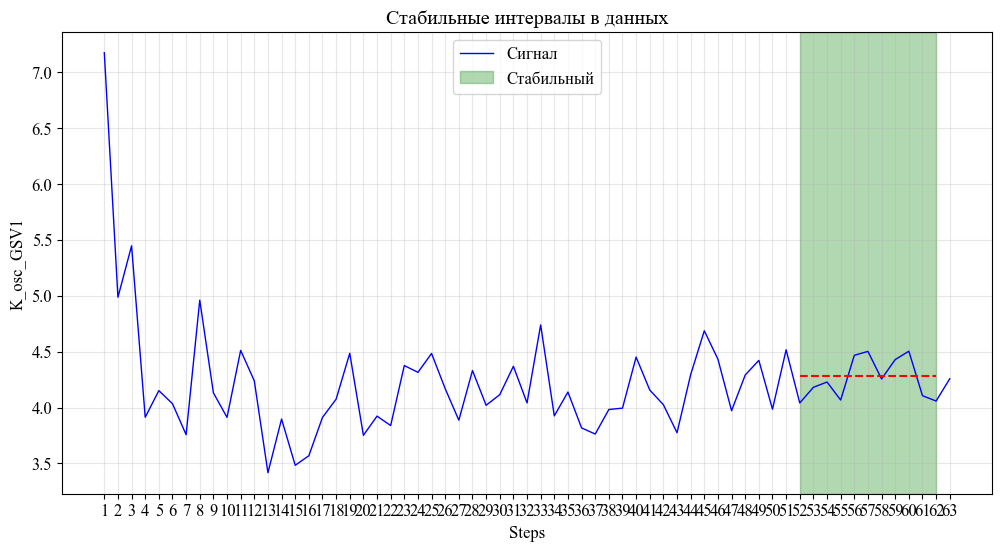

  Интервал [24:28], длина: 5, отклонение: 0.310
  Интервал [24:28], длина: 5, отклонение: 0.310
  Интервал [24:28], длина: 5, отклонение: 0.310
  Интервал [37:43], длина: 7, отклонение: 0.176
  Интервал [44:48], длина: 5, отклонение: 0.278
  Интервал [49:57], длина: 9, отклонение: 0.442
  Интервал [58:62], длина: 5, отклонение: 0.328


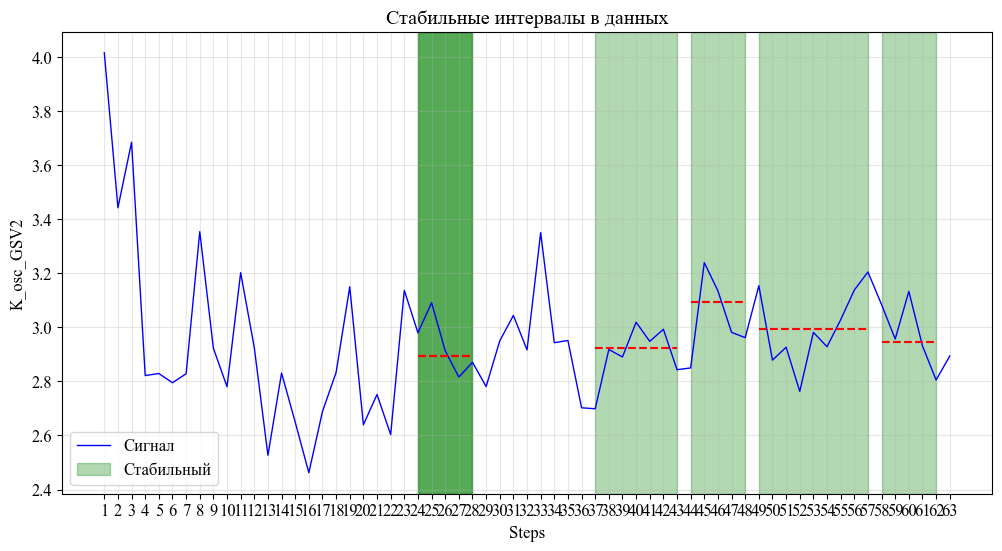

  Интервал [16:21], длина: 6, отклонение: 0.298
  Интервал [22:26], длина: 5, отклонение: 0.192
  Интервал [27:34], длина: 8, отклонение: 0.139
  Интервал [35:41], длина: 7, отклонение: 0.120
  Интервал [35:41], длина: 7, отклонение: 0.120
  Интервал [35:41], длина: 7, отклонение: 0.120
  Интервал [35:41], длина: 7, отклонение: 0.120
  Интервал [54:62], длина: 9, отклонение: 0.185


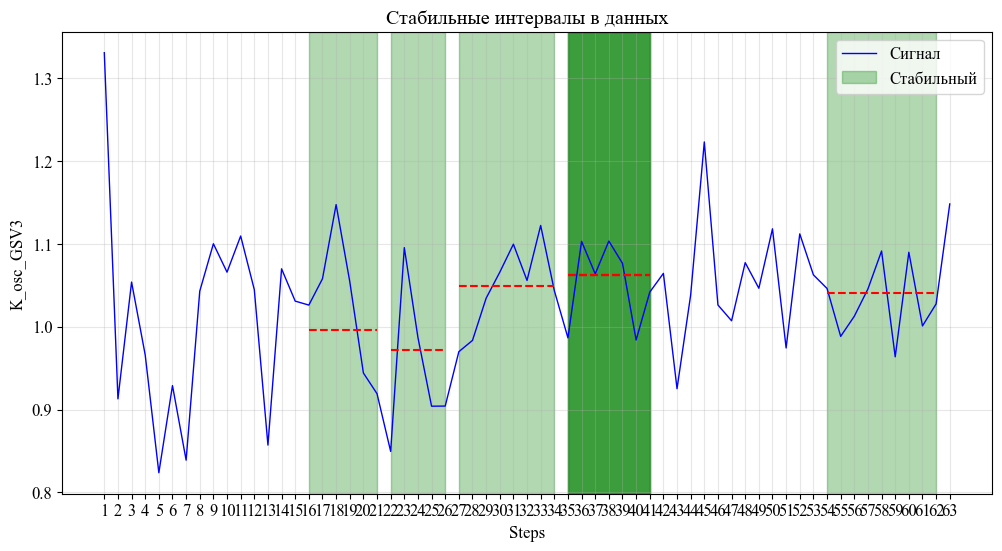

In [197]:
stable_intervals_GSV1 = find_stable_intervals(K_osc_GSV1, threshold=np.std(K_osc_GSV1)*0.8, min_length=5)
stable_intervals_GSV2 = find_stable_intervals(K_osc_GSV2, threshold=np.std(K_osc_GSV2)*0.9, min_length=5)
stable_intervals_GSV3 = find_stable_intervals(K_osc_GSV3, threshold=np.std(K_osc_GSV3)*1.5, min_length=5)
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, st+1, 1),K_osc_GSV1, 'b-', label='Сигнал', linewidth=1)
for i, (start, end) in enumerate(stable_intervals_GSV1):
    plt.axvspan(start, end, alpha=0.3, color='green', label="Стабильный" if i == 0 else "")
    mean_val = np.mean(K_osc_GSV1[start:end+1])
    segment =  K_osc_GSV1[start:end+1]
    print(f"  Интервал [{start}:{end}], длина: {end-start+1}, "
          f"отклонение: {np.max(segment)-np.min(segment):.3f}")
    plt.hlines(mean_val, start, end, colors='red', linestyles='dashed')
plt.xlabel("Steps")
plt.ylabel("K_osc_GSV1")
plt.xticks(np.arange(1, st+1, 1))

plt.legend()
plt.title("Стабильные интервалы в данных")

plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, st+1, 1),K_osc_GSV2, 'b-', label='Сигнал', linewidth=1)
for i, (start, end) in enumerate(stable_intervals_GSV2):
    plt.axvspan(start, end, alpha=0.3, color='green', label="Стабильный" if i == 0 else "")
    segment =  K_osc_GSV2[start:end+1]
    print(f"  Интервал [{start}:{end}], длина: {end-start+1}, "
          f"отклонение: {np.max(segment)-np.min(segment):.3f}")
    mean_val = np.mean(K_osc_GSV2[start:end+1])
    plt.hlines(mean_val, start, end, colors='red', linestyles='dashed')
plt.xlabel("Steps")
plt.ylabel("K_osc_GSV2")
plt.xticks(np.arange(1, st+1, 1))

plt.legend()
plt.title("Стабильные интервалы в данных")

plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, st+1, 1),K_osc_GSV3, 'b-', label='Сигнал', linewidth=1)
for i, (start, end) in enumerate(stable_intervals_GSV3):
    plt.axvspan(start, end, alpha=0.3, color='green', label="Стабильный" if i == 0 else "")
    mean_val = np.mean(K_osc_GSV3[start:end+1])
    segment =  K_osc_GSV3[start:end+1]
    print(f"  Интервал [{start}:{end}], длина: {end-start+1}, "
          f"отклонение: {np.max(segment)-np.min(segment):.3f}")
    plt.hlines(mean_val, start, end, colors='red', linestyles='dashed')
plt.xlabel("Steps")
plt.ylabel("K_osc_GSV3")
plt.xticks(np.arange(1, st+1, 1))

plt.legend()
plt.title("Стабильные интервалы в данных")

plt.grid(True, alpha=0.3)
plt.show()
# plot_intervals( K_osc_GSV1, stable_intervals_GSV1)

In [172]:
SS_steps_amount_GSV1 = 0
for start, end in intervals_neighbors_GSV1:
    SS_steps_amount_GSV1 += end - start + 1
print("SS_steps_amount =", SS_steps_amount,intervals_neighbors_GSV1[-1][0] )

SS_steps_amount = 34 51


In [198]:
SS_steps_amount_GSV1 = intervals_neighbors_GSV1[-1][1] - intervals_neighbors_GSV1[-1][0] + 1
SS_steps_amount_GSV1

13

In [169]:
df = pd.read_excel(r'CVI_DATA.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CODE                    758 non-null    int64  
 1   Surname                 758 non-null    object 
 2   Sex                     748 non-null    float64
 3   Side                    748 non-null    float64
 4   Age                     608 non-null    float64
 5   Height_cm               573 non-null    float64
 6   Weight_kg               563 non-null    float64
 7   BMI                     563 non-null    float64
 8   Healthy_0/PCVD_1/PTS_2  563 non-null    float64
 9   CEAP                    568 non-null    float64
 10  CEAP_Score              568 non-null    float64
 11  Reflux_Score            568 non-null    float64
 12  PV_amount               563 non-null    float64
 13  PV_cm                   563 non-null    object 
 14  PV̅_cm                  563 non-null    fl

In [213]:
ind = df[(df['Frequency']=='f30') & (df['CODE']== CODE)].index
df.loc[ind, 'NSS_steps'] =  round(100*(st - SS_steps_amount)/st, 2)
df.loc[ind, 'CV_SD'] = gait_analysis['step_duration']['std']/gait_analysis['step_duration']['mean']
df.loc[ind, 'Stance_SD'] =  gait_analysis['toe_off']['mean'] / gait_analysis['step_duration']['mean']
df.loc[ind, 'Stance'] =  gait_analysis['toe_off']['mean']
df.loc[ind, 'Swing'] = gait_analysis['step_duration']['mean'] - gait_analysis['toe_off']['mean']


ind = df[(df['Frequency']=='f30') & (df['CODE']== CODE) & (df['Phase']== 'NSS')].index

K_osc_GSV1_NSS = np.mean(K_osc_GSV1[:intervals_neighbors_GSV1[-1][0]])
K_osc_GSV2_NSS = np.mean(K_osc_GSV2[:intervals_neighbors_GSV1[-1][0]])  
K_osc_GSV3_NSS = np.mean(K_osc_GSV3[:intervals_neighbors_GSV1[-1][0]])
A3_NSS = np.mean(IV_area_steps[:intervals_neighbors_GSV1[-1][0]])
A2_GSV1_NSS = np.mean(GSV1_area_steps[:intervals_neighbors_GSV1[-1][0]])
A2_GSV2_NSS = np.mean(GSV1_area_steps[:intervals_neighbors_GSV1[-1][0]])
A2_GSV3_NSS = np.mean(GSV1_area_steps[:intervals_neighbors_GSV1[-1][0]]) 

df.loc[ind,'K_osc_GSV1'] = round(K_osc_GSV1_NSS,2) 
df.loc[ind,'K_osc_GSV2'] = round(K_osc_GSV2_NSS,2) 
df.loc[ind,'K_osc_GSV3'] = round(K_osc_GSV3_NSS,2) 

df.loc[ind,'A3'] = round(A3_NSS ,2) 
df.loc[ind,'A2_GSV1'] = round(A2_GSV1_NSS,2) 
df.loc[ind,'A2_GSV2'] = round(A2_GSV2_NSS,2) 
df.loc[ind,'A2_GSV3'] = round(A2_GSV3_NSS,2) 

df.loc[ind,'VI_GSV1'] = round(A2_GSV1_NSS/A3_NSS*K_osc_GSV1_NSS,2) 
df.loc[ind,'VI_GSV2'] = round(A2_GSV2_NSS/A3_NSS*K_osc_GSV2_NSS,2) 
df.loc[ind,'VI_GSV3'] = round(A2_GSV3_NSS/A3_NSS*K_osc_GSV3_NSS,2) 


ind = df[(df['Frequency']=='f30') & (df['CODE']== CODE) & (df['Phase']== 'SS')].index

K_osc_GSV1_SS = np.mean(K_osc_GSV1[intervals_neighbors_GSV1[-1][0]:])
K_osc_GSV2_SS = np.mean(K_osc_GSV2[intervals_neighbors_GSV1[-1][0]:])  
K_osc_GSV3_SS = np.mean(K_osc_GSV3[intervals_neighbors_GSV1[-1][0]:])
A3_SS = np.mean(IV_area_steps[intervals_neighbors_GSV1[-1][0]:])
A2_GSV1_SS = np.mean(GSV1_area_steps[intervals_neighbors_GSV1[-1][0]:])
A2_GSV2_SS = np.mean(GSV1_area_steps[intervals_neighbors_GSV1[-1][0]:])
A2_GSV3_SS = np.mean(GSV1_area_steps[intervals_neighbors_GSV1[-1][0]:]) 

df.loc[ind,'K_osc_GSV1'] = round(K_osc_GSV1_SS,2) 
df.loc[ind,'K_osc_GSV2'] = round(K_osc_GSV2_SS,2) 
df.loc[ind,'K_osc_GSV3'] = round(K_osc_GSV3_SS,2) 

df.loc[ind,'A3'] = round(A3_NSS,2) 
df.loc[ind,'A2_GSV1'] = round(A2_GSV1_SS,2) 
df.loc[ind,'A2_GSV2'] = round(A2_GSV2_SS,2) 
df.loc[ind,'A2_GSV3'] = round(A2_GSV3_SS,2) 

df.loc[ind,'VI_GSV1'] = round(A2_GSV1_SS/A3_SS*K_osc_GSV1_SS,2) 
df.loc[ind,'VI_GSV2'] = round(A2_GSV2_SS/A3_SS*K_osc_GSV2_SS,2) 
df.loc[ind,'VI_GSV3'] = round(A2_GSV3_SS/A3_SS*K_osc_GSV3_SS,2) 
                              

ind = df[(df['Frequency']=='f30') & (df['CODE']== CODE) & (df['Phase']== 'AVG')].index

df.loc[ind,'K_osc_GSV1'] = round(np.mean(K_osc_GSV1),2) 
df.loc[ind,'K_osc_GSV2'] = round(np.mean(K_osc_GSV2),2) 
df.loc[ind,'K_osc_GSV3'] = round(np.mean(K_osc_GSV3),2) 

df.loc[ind,'A3'] = round(np.mean(IV_area_steps),2) 
df.loc[ind,'A2_GSV1'] = round(np.mean(GSV1_area_steps),2) 
df.loc[ind,'A2_GSV2'] = round(np.mean(GSV2_area_steps),2) 
df.loc[ind,'A2_GSV3'] = round(np.mean(GSV3_area_steps),2) 

df.loc[ind,'VI_GSV1'] = round(np.mean(GSV1_area_steps)/np.mean(IV_area_steps)*np.mean(K_osc_GSV1),2) 
df.loc[ind,'VI_GSV2'] = round(np.mean(GSV2_area_steps)/np.mean(IV_area_steps)*np.mean(K_osc_GSV2),2) 
df.loc[ind,'VI_GSV3'] = round(np.mean(GSV3_area_steps)/np.mean(IV_area_steps)*np.mean(K_osc_GSV3),2) 



In [474]:
# t_step = 0.00025

# def initialize_arrays(step_count):
#     """Инициализация всех массивов"""
#     arrays = {}
    
#     arrays['tA'] = np.zeros((step_count, 1))
#     arrays['tB'] = np.zeros((step_count, 1))
#     arrays['tA1'] = np.zeros((step_count, 1))
#     arrays['tB1'] = np.zeros((step_count, 1))
#     arrays['tA2'] = np.zeros((step_count, 1))
#     arrays['tB2'] = np.zeros((step_count, 1))
#     arrays['tA3'] = np.zeros((step_count, 1))
#     arrays['tB3'] = np.zeros((step_count, 1))
#     arrays['tC'] = np.zeros((step_count, 1))
#     arrays['PAB'] = np.zeros((step_count, 1))
#     arrays['PBC'] = np.zeros((step_count, 1))
#     arrays['dIVdt'] = np.zeros((step_count, 1))
#     arrays['dGSV1dt'] = np.zeros((step_count, 1))
#     arrays['dGSV2dt'] = np.zeros((step_count, 1))
#     arrays['dGSV3dt'] = np.zeros((step_count, 1))
#     arrays['dGSV1dt2'] = np.zeros((step_count, 1))
#     arrays['dGSV2dt2'] = np.zeros((step_count, 1))
#     arrays['dGSV3dt2'] = np.zeros((step_count, 1))
#     arrays['crossGSV1'] = np.zeros((step_count, 2))
#     arrays['crossGSV2'] = np.zeros((step_count, 2))
#     arrays['crossGSV3'] = np.zeros((step_count, 2))
#     arrays['Int_crossGSV1'] = np.zeros((step_count, 1))
#     arrays['Int_crossGSV2'] = np.zeros((step_count, 1))
#     arrays['Int_crossGSV3'] = np.zeros((step_count, 1))
#     arrays['MinIV'] = np.zeros((step_count, 1))
#     arrays['EndIV'] = np.zeros((step_count, 1))
#     arrays['Sim_AB1'] = np.zeros((step_count, 1))
#     arrays['Sim_AB2'] = np.zeros((step_count, 1))
#     arrays['Sim_AB3'] = np.zeros((step_count, 1))
#     arrays['MST1'] = np.zeros((step_count, 1))
#     arrays['MST2'] = np.zeros((step_count, 1))
#     arrays['MST3'] = np.zeros((step_count, 1))
#     arrays['MSW1'] = np.zeros((step_count, 1))
#     arrays['MSW2'] = np.zeros((step_count, 1))
#     arrays['MSW3'] = np.zeros((step_count, 1))
    
#     return arrays

# def process_steps(arrays, step_count, st, IV, GSV1, GSV2, GSV3):
#     """Обработка шагов (основная логика)"""
#     for i in range(step_count):
#         # Для IV
#         start_idx, end_idx = st[i], st[i+1]
        
#         # Максимум в сегменте IV
#         segment_IV = IV[start_idx:end_idx]
#         idx1 = np.argmax(segment_IV)
#         arrays['tB'][i, 0] = idx1 + start_idx
        
#         # Минимум до максимума в IV
#         segment_IV_before_max = IV[start_idx:(idx1 + start_idx)]
#         if len(segment_IV_before_max) > 0:
#             idx0 = np.argmin(segment_IV_before_max)
#             arrays['tA'][i, 0] = idx0 + start_idx
#         else:
#             arrays['tA'][i, 0] = start_idx
        
#         # Минимум после максимума в IV
#         segment_IV_after_max = IV[(idx1 + start_idx):end_idx]
#         if len(segment_IV_after_max) > 0:
#             idx2 = np.argmin(segment_IV_after_max)
#             arrays['tC'][i, 0] = idx2 + idx1 + start_idx
#         else:
#             arrays['tC'][i, 0] = end_idx - 1
        
#         # Для GSV1
#         segment_GSV1 = GSV1[start_idx:end_idx]
#         idx11 = np.argmax(segment_GSV1)
#         arrays['tB1'][i, 0] = idx11 + start_idx
        
#         segment_GSV1_before_max = GSV1[start_idx:(idx11 + start_idx)]
#         if len(segment_GSV1_before_max) > 0:
#             idx01 = np.argmin(segment_GSV1_before_max)
#             arrays['tA1'][i, 0] = idx01 + start_idx
#         else:
#             arrays['tA1'][i, 0] = start_idx
        
#         # Для GSV2 (с особым окном)
#         window_start = int(arrays['tA'][i, 0])  # используем найденный tA для IV
#         window_end = int(idx1 + 800 + start_idx)
#         window_end = min(window_end, len(GSV2))  # защита от выхода за границы
        
#         segment_GSV2_window = GSV2[window_start:window_end]
#         if len(segment_GSV2_window) > 0:
#             idx12 = np.argmax(segment_GSV2_window)
#             arrays['tB2'][i, 0] = idx12 + window_start
#         else:
#             arrays['tB2'][i, 0] = window_start
        
#         segment_GSV2_before_max = GSV2[start_idx:(idx12 + start_idx)]
#         if len(segment_GSV2_before_max) > 0:
#             idx02 = np.argmin(segment_GSV2_before_max)
#             arrays['tA2'][i, 0] = idx02 + start_idx
#         else:
#             arrays['tA2'][i, 0] = start_idx
        
#         # Для GSV3 (аналогично GSV2)
#         segment_GSV3_window = GSV3[window_start:window_end]
#         if len(segment_GSV3_window) > 0:
#             idx13 = np.argmax(segment_GSV3_window)
#             arrays['tB3'][i, 0] = idx13 + window_start
#         else:
#             arrays['tB3'][i, 0] = window_start
        
#         segment_GSV3_before_max = GSV3[start_idx:(idx13 + start_idx)]
#         if len(segment_GSV3_before_max) > 0:
#             idx03 = np.argmin(segment_GSV3_before_max)
#             arrays['tA3'][i, 0] = idx03 + start_idx
#         else:
#             arrays['tA3'][i, 0] = start_idx

# # Использование
# arrays = initialize_arrays(gait_analysis['step_count'])
# process_steps(arrays, gait_analysis['step_count'],gait_analysis[ 'step_indices'], IV, GSV1, GSV2, GSV3)

# # Теперь переменные доступны как:
# tA = arrays['tA']
# tB = arrays['tB']



# from scipy import signal
# from scipy.integrate import trapezoid
# step_count = gait_analysis['step_count']
# # Вычисление производных (аналог diff в MATLAB)
# dPdt = np.diff(IV, prepend=IV[0]) / t_step * 0.000133322
# dGSV1 = np.diff(GSV1, prepend=GSV1[0]) / t_step
# dGSV2 = np.diff(GSV2, prepend=GSV2[0]) / t_step
# dGSV3 = np.diff(GSV3, prepend=GSV3[0]) / t_step

# # Основной цикл
# for i in range(step_count):
#     # Преобразуем индексы в целые числа
#     tA_i = int(tA[i, 0])
#     tB_i = int(tB[i, 0])
#     tC_i = int(arrays['tC'][i, 0])
#     tB1_i = int(arrays['tB1'][i, 0])
#     tB2_i = int(arrays['tB2'][i, 0])
#     tB3_i = int(arrays['tB3'][i, 0])
#     st_i = int(gait_analysis['step_indices'][i])
#     st_i1 = int(gait_analysis['step_indices'][i+1])
    
#     # Вычисление PAB, PBC и производных
#     PAB[i, 0] = abs(np.mean(dPdt[tA_i:tB_i]))
#     PBC[i, 0] = abs(np.mean(dPdt[tB_i:tC_i]))
#     dIVdt[i, 0] = np.mean(dPdt[tC_i:st_i1]) / 0.000133322
    
#     # Производные GSV
#     dGSV1dt[i, 0] = np.mean(dGSV1[st_i:tB1_i])
#     dGSV1dt2[i, 0] = abs(np.mean(dGSV1[tB1_i:st_i1]))
#     dGSV2dt[i, 0] = np.mean(dGSV2[st_i:tB2_i])
#     dGSV2dt2[i, 0] = abs(np.mean(dGSV2[tB2_i:st_i1]))
#     dGSV3dt[i, 0] = np.mean(dGSV3[st_i:tB3_i])
#     dGSV3dt2[i, 0] = abs(np.mean(dGSV3[tB3_i:st_i1]))
    
#     # Вычисление сходства (Sim_AB)
#     segment_IV_AB = IV[tA_i:tB_i]
#     segment_GSV1_AB = GSV1[tA_i:tB_i]
#     segment_GSV2_AB = GSV2[tA_i:tB_i]
#     segment_GSV3_AB = GSV3[tA_i:tB_i]
    
#     del1 = np.mean(segment_IV_AB - segment_GSV1_AB)
#     Sim_AB1[i, 0] = 1 - np.max(np.abs(segment_IV_AB - segment_GSV1_AB - del1)) / np.max(segment_IV_AB)
    
#     del2 = np.mean(segment_IV_AB - segment_GSV2_AB)
#     Sim_AB2[i, 0] = 1 - np.max(np.abs(segment_IV_AB - segment_GSV2_AB - del2)) / np.max(segment_IV_AB)
    
#     del3 = np.mean(segment_IV_AB - segment_GSV3_AB)
#     Sim_AB3[i, 0] = 1 - np.max(np.abs(segment_IV_AB - segment_GSV3_AB - del3)) / np.max(segment_IV_AB)



# # Вычисление статистик
# MST1_m = np.mean(MST1)
# MST1_std = np.std(MST1)
# MST2_m = np.mean(MST2)
# MST2_std = np.std(MST2)
# MST3_m = np.mean(MST3)
# MST3_std = np.std(MST3)
# MSW1_m = np.mean(MSW1)
# MSW1_std = np.std(MSW1)
# MSW2_m = np.mean(MSW2)
# MSW2_std = np.std(MSW2)
# MSW3_m = np.mean(MSW3)
# MSW3_std = np.std(MSW3)

# PAB_min = PAB * 30
# PAB_m = np.mean(PAB)
# PAB_min_m = np.mean(PAB_min)
# PAB_std = np.std(PAB)
# PAB_min_std = np.std(PAB_min)

# PBC_min = PBC * 30
# PBC_m = np.mean(PBC)
# PBC_min_m = np.mean(PBC_min)
# PBC_std = np.std(PBC)
# PBC_min_std = np.std(PBC_min)

# Int1_m = np.mean(Int_crossGSV1)
# Int1_std = np.std(Int_crossGSV1)
# Int2_m = np.mean(Int_crossGSV2)
# Int2_std = np.std(Int_crossGSV2)
# Int3_m = np.mean(Int_crossGSV3)
# Int3_std = np.std(Int_crossGSV3)

# Int_GSV = Int_crossGSV1 + Int_crossGSV2 + Int_crossGSV3
# Int_m = np.mean(Int_GSV)
# Int_std = np.std(Int_GSV)

# dIV_m = np.mean(dIVdt)
# dIV_std = np.std(dIVdt)
# dGSV1_m = np.mean(dGSV1dt)
# dGSV1_std = np.std(dGSV1dt)
# dGSV2_m = np.mean(dGSV2dt)
# dGSV2_std = np.std(dGSV2dt)
# dGSV3_m = np.mean(dGSV3dt)
# dGSV3_std = np.std(dGSV3dt)

# dGSV12_m = np.mean(dGSV1dt2)
# dGSV12_std = np.std(dGSV1dt2)
# dGSV22_m = np.mean(dGSV2dt2)
# dGSV22_std = np.std(dGSV2dt2)
# dGSV32_m = np.mean(dGSV3dt2)
# dGSV32_std = np.std(dGSV3dt2)

# Sim_AB1_m = np.mean(Sim_AB1)
# Sim_AB1_std = np.std(Sim_AB1)
# Sim_AB2_m = np.mean(Sim_AB2)
# Sim_AB2_std = np.std(Sim_AB2)
# Sim_AB3_m = np.mean(Sim_AB3)
# Sim_AB3_std = np.std(Sim_AB3)

# # Создание новых массивов с выравниванием по времени
# max_length = int(st_lmax / t_step + 1)
# IV_new = np.zeros((max_length, step_count))
# GSV1_new = np.zeros((max_length, step_count))
# GSV2_new = np.zeros((max_length, step_count))
# GSV3_new = np.zeros((max_length, step_count))

# for i in range(step_count):
#     st_i = int(st[i])
#     st_i1 = int(st[i+1])
#     segment_length = st_i1 - st_i
    
#     IV_new[:segment_length, i] = IV[st_i:st_i1]
#     MinIV[i, 0] = IV[int(tC[i, 0])]
#     EndIV[i, 0] = IV[st_i1]
    
#     GSV1_new[:segment_length, i] = GSV1[st_i:st_i1]
#     GSV2_new[:segment_length, i] = GSV2[st_i:st_i1]
#     GSV3_new[:segment_length, i] = GSV3[st_i:st_i1]

# # Децимация (понижение частоты дискретизации)
# len_val = 2
# t_step_n = len_val / 59
# t_step_n_1 = len_val / st_l * t_step
# r = np.floor(t_step_n / t_step_n_1).astype(int)

# IV_new_d = np.zeros((60, step_count))
# GSV1_new_d = np.zeros((60, step_count))
# GSV2_new_d = np.zeros((60, step_count))
# GSV3_new_d = np.zeros((60, step_count))

# for i in range(step_count):
#     segment_length = int(st_lc[i])
    
#     # Используем scipy.signal.decimate для децимации
#     IV_new_d[:, i] = signal.decimate(IV_new[:segment_length, i], r[i])
#     GSV1_new_d[:, i] = signal.decimate(GSV1_new[:segment_length, i], r[i])
#     GSV2_new_d[:, i] = signal.decimate(GSV2_new[:segment_length, i], r[i])
#     GSV3_new_d[:, i] = signal.decimate(GSV3_new[:segment_length, i], r[i])

# # Давление в покое - визуализация
# plt.figure(figsize=(12, 10))

# plt.subplot(4, 1, 1)
# plt.plot(ti_0, GSV1_0)
# plt.title('GSV1 в покое')

# plt.subplot(4, 1, 2)
# plt.plot(ti_0, GSV2_0)
# plt.title('GSV2 в покое')

# plt.subplot(4, 1, 3)
# plt.plot(ti_0, IV_0)
# plt.title('IV в покое')

# plt.subplot(4, 1, 4)
# plt.plot(ti_0, GSV3_0)
# plt.title('GSV3 в покое')

# plt.tight_layout()
# plt.show()

# # Вычисление средних значений в покое
# GSV1_0_m = np.mean(GSV1_0)
# GSV2_0_m = np.mean(GSV2_0)
# GSV3_0_m = np.mean(GSV3_0)
# IV_0_m = np.mean(IV_0)

# print(f"Средние значения в покое:")
# print(f"GSV1: {GSV1_0_m:.4f}")
# print(f"GSV2: {GSV2_0_m:.4f}")
# print(f"GSV3: {GSV3_0_m:.4f}")
# print(f"IV: {IV_0_m:.4f}")


NameError: name 'PAB' is not defined

/var/folders/vv/dw6y8kq540x1q6_4lb4m4w9m0000gn/T/ipykernel_1923/1122570659.py:51: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  window_start = int(arrays['tA'][i])
/var/folders/vv/dw6y8kq540x1q6_4lb4m4w9m0000gn/T/ipykernel_1923/1122570659.py:76: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  tA_i, tB_i, tC_i = int(arrays['tA'][i]), int(arrays['tB'][i]), int(arrays['tC'][i])
/var/folders/vv/dw6y8kq540x1q6_4lb4m4w9m0000gn/T/ipykernel_1923/1122570659.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this ope

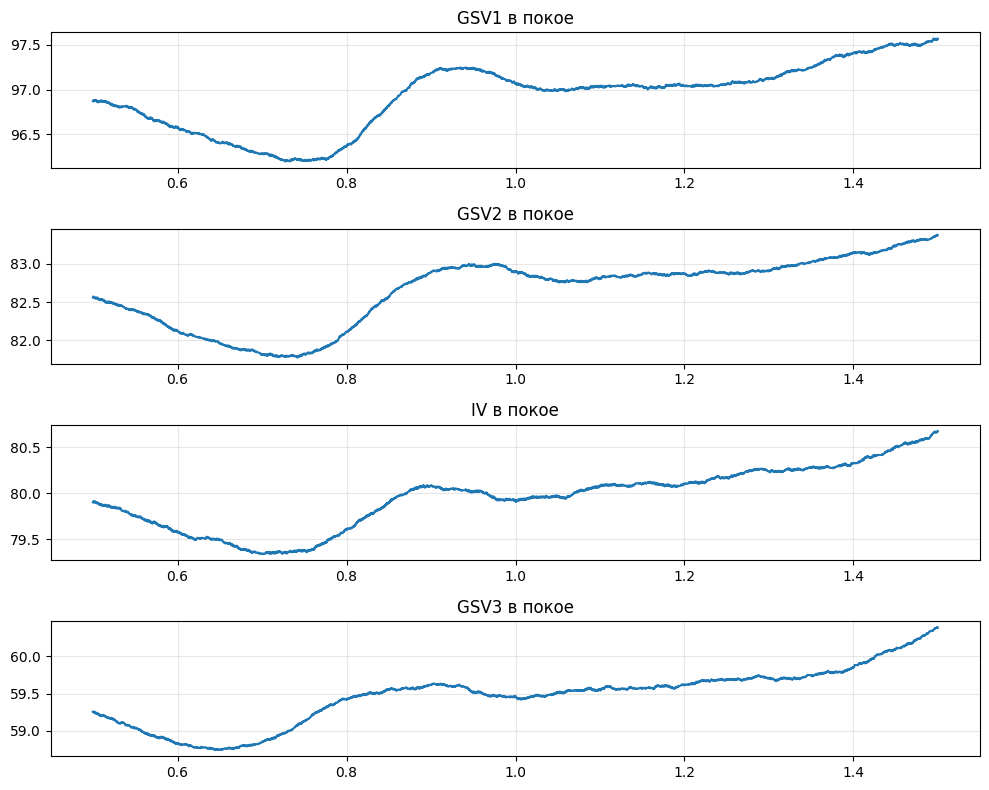

Средние значения в покое:
GSV1_0: 96.9276
GSV2_0: 82.6494
IV_0: 79.9547
GSV3_0: 59.4651


UnboundLocalError: cannot access local variable 'data_decimated' where it is not associated with a value

In [475]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

t_step = 0.00025

# Упрощенная инициализация массивов
def create_arrays(step_count):
    """Создаем все нужные массивы"""
    arrays = {}
    shape = (step_count, 1)
    
    # Только основные массивы, которые используются
    keys = ['tA', 'tB', 'tC', 'tA1', 'tB1', 'tA2', 'tB2', 'tA3', 'tB3',
            'PAB', 'PBC', 'dIVdt', 'dGSV1dt', 'dGSV2dt', 'dGSV3dt',
            'dGSV1dt2', 'dGSV2dt2', 'dGSV3dt2', 'Sim_AB1', 'Sim_AB2', 'Sim_AB3',
            'MinIV', 'EndIV']
    
    for key in keys:
        arrays[key] = np.zeros(shape)
    
    return arrays

# Упрощенная обработка шагов
def find_key_points(arrays, step_count, st, IV, GSV1, GSV2, GSV3):
    """Находим ключевые точки в сигналах"""
    for i in range(step_count):
        start, end = st[i], st[i+1]
        
        # Для IV
        iv_segment = IV[start:end]
        tB_idx = np.argmax(iv_segment) + start
        arrays['tB'][i] = tB_idx
        
        # Минимум до максимума IV
        before_max = IV[start:tB_idx]
        if len(before_max) > 0:
            arrays['tA'][i] = np.argmin(before_max) + start
        
        # Минимум после максимума IV
        after_max = IV[tB_idx:end]
        if len(after_max) > 0:
            arrays['tC'][i] = np.argmin(after_max) + tB_idx
        
        # Для GSV1
        gsv1_segment = GSV1[start:end]
        tB1_idx = np.argmax(gsv1_segment) + start
        arrays['tB1'][i] = tB1_idx
        
        # Для GSV2 и GSV3 используем окно на основе IV
        window_start = int(arrays['tA'][i])
        window_end = min(int(tB_idx + 800 + start), len(GSV2))
        
        # GSV2
        if window_end > window_start:
            gsv2_window = GSV2[window_start:window_end]
            if len(gsv2_window) > 0:
                arrays['tB2'][i] = np.argmax(gsv2_window) + window_start
        
        # GSV3
        if window_end > window_start:
            gsv3_window = GSV3[window_start:window_end]
            if len(gsv3_window) > 0:
                arrays['tB3'][i] = np.argmax(gsv3_window) + window_start

# Основные вычисления
def calculate_metrics(arrays, step_count, st, IV, GSV1, GSV2, GSV3):
    """Вычисляем основные метрики"""
    # Производные
    dPdt = np.gradient(IV, t_step) * 0.000133322
    dGSV1 = np.gradient(GSV1, t_step)
    dGSV2 = np.gradient(GSV2, t_step) 
    dGSV3 = np.gradient(GSV3, t_step)
    
    for i in range(step_count):
        tA_i, tB_i, tC_i = int(arrays['tA'][i]), int(arrays['tB'][i]), int(arrays['tC'][i])
        tB1_i, tB2_i, tB3_i = int(arrays['tB1'][i]), int(arrays['tB2'][i]), int(arrays['tB3'][i])
        st_i, st_i1 = st[i], st[i+1]
        
        # Производные давления
        arrays['PAB'][i] = abs(np.mean(dPdt[tA_i:tB_i]))
        arrays['PBC'][i] = abs(np.mean(dPdt[tB_i:tC_i]))
        arrays['dIVdt'][i] = np.mean(dPdt[tC_i:st_i1]) / 0.000133322
        
        # Производные GSV
        arrays['dGSV1dt'][i] = np.mean(dGSV1[st_i:tB1_i])
        arrays['dGSV1dt2'][i] = abs(np.mean(dGSV1[tB1_i:st_i1]))
        arrays['dGSV2dt'][i] = np.mean(dGSV2[st_i:tB2_i])
        arrays['dGSV2dt2'][i] = abs(np.mean(dGSV2[tB2_i:st_i1]))
        arrays['dGSV3dt'][i] = np.mean(dGSV3[st_i:tB3_i])
        arrays['dGSV3dt2'][i] = abs(np.mean(dGSV3[tB3_i:st_i1]))
        
        # Сходство сигналов
        iv_segment = IV[tA_i:tB_i]
        for j, gsv in enumerate([GSV1, GSV2, GSV3], 1):
            gsv_segment = gsv[tA_i:tB_i]
            diff_mean = np.mean(iv_segment - gsv_segment)
            max_diff = np.max(np.abs(iv_segment - gsv_segment - diff_mean))
            arrays[f'Sim_AB{j}'][i] = 1 - max_diff / np.max(iv_segment)

# Статистика
def calculate_statistics(arrays, step_count):
    """Вычисляем статистики"""
    stats = {}
    
    # Основные статистики
    stats['PAB_m'] = np.mean(arrays['PAB'])
    stats['PBC_m'] = np.mean(arrays['PBC'])
    stats['dIV_m'] = np.mean(arrays['dIVdt'])
    
    # Статистики по GSV
    for signal in ['GSV1', 'GSV2', 'GSV3']:
        stats[f'd{signal}_m'] = np.mean(arrays[f'd{signal}dt'])
        stats[f'd{signal}_std'] = np.std(arrays[f'd{signal}dt'])
        stats[f'd{signal}2_m'] = np.mean(arrays[f'd{signal}dt2'])
        stats[f'Sim_AB{signal[-1]}_m'] = np.mean(arrays[f'Sim_AB{signal[-1]}'])
    
    return stats

# Подготовка данных для визуализации
def prepare_visualization_data(arrays, step_count, st, IV, GSV1, GSV2, GSV3, st_lmax, st_lc):
    """Подготавливаем данные для графиков"""
    max_len = int(st_lmax / t_step) + 1
    
    # Создаем массивы для каждого шага
    data_new = {}
    for name, data in [('IV', IV), ('GSV1', GSV1), ('GSV2', GSV2), ('GSV3', GSV3)]:
        data_new[name] = np.zeros((max_len, step_count))
        
        for i in range(step_count):
            start, end = st[i], st[i+1]
            segment = data[start:end]
            data_new[name][:len(segment), i] = segment
            
            if name == 'IV':
                arrays['MinIV'][i] = data[int(arrays['tC'][i])]
                arrays['EndIV'][i] = data[end]
    
    # Децимация
    target_length = 60
    data_decimated = {}
    
    for name in data_new:
        data_decimated[name] = np.zeros((target_length, step_count))
        
        for i in range(step_count):
            segment_length = st_lc[i]
            if segment_length > 0:
                original_data = data_new[name][:segment_length, i]
                # Простая интерполяция вместо decimate для упрощения
                if len(original_data) > 1:
                    x_original = np.linspace(0, 1, len(original_data))
                    x_new = np.linspace(0, 1, target_length)
                    data_decimated[name][:, i] = np.interp(x_new, x_original, original_data)
    
    return data_new, data_decimated

# Визуализация в покое
def plot_resting_pressure(ti_0, GSV1_0, GSV2_0, IV_0, GSV3_0):
    """График давления в покое"""
    fig, axes = plt.subplots(4, 1, figsize=(10, 8))
    
    signals = [GSV1_0, GSV2_0, IV_0, GSV3_0]
    titles = ['GSV1 в покое', 'GSV2 в покое', 'IV в покое', 'GSV3 в покое']
    
    for ax, signal, title in zip(axes, signals, titles):
        ax.plot(ti_0, signal)
        ax.set_title(title)
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Средние значения
    means = {
        'GSV1_0': np.mean(GSV1_0),
        'GSV2_0': np.mean(GSV2_0), 
        'IV_0': np.mean(IV_0),
        'GSV3_0': np.mean(GSV3_0)
    }
    
    print("Средние значения в покое:")
    for name, value in means.items():
        print(f"{name}: {value:.4f}")
    
    return means

# Основной процесс
def main_analysis(gait_analysis, IV, GSV1, GSV2, GSV3, ti_0, GSV1_0, GSV2_0, IV_0, GSV3_0):
    """Основной анализ"""
    step_count = gait_analysis['step_count']
    st = gait_analysis['step_indices']
    
    # 1. Инициализация
    arrays = create_arrays(step_count)
    
    # 2. Поиск ключевых точек
    find_key_points(arrays, step_count, st, IV, GSV1, GSV2, GSV3)
    
    # 3. Вычисление метрик
    calculate_metrics(arrays, step_count, st, IV, GSV1, GSV2, GSV3)
    
    # 4. Статистика
    stats = calculate_statistics(arrays, step_count)
    
    # 5. Подготовка данных для графиков
    if 'st_lmax' in gait_analysis and 'st_lc' in gait_analysis:
        data_new, data_decimated = prepare_visualization_data(
            arrays, step_count, st, IV, GSV1, GSV2, GSV3,
            gait_analysis['st_lmax'], gait_analysis['st_lc']
        )
    
    # 6. График покоя
    resting_means = plot_resting_pressure(ti_0, GSV1_0, GSV2_0, IV_0, GSV3_0)
    
    return arrays, stats, data_decimated, resting_means

# Использование
if __name__ == "__main__":
    # Вызываем основной анализ
    arrays, stats, data_decimated, resting_means = main_analysis(
        gait_analysis, IV, GSV1, GSV2, GSV3, ti_0, GSV1_0, GSV2_0, IV_0, GSV3_0
    )
    
    # Теперь можно использовать результаты
    tA = arrays['tA']
    tB = arrays['tB']
    print("Основные статистики:", stats)